The purpose is to visualize the separation between compositional and non-compositional embeddings for each layer of a pre-trained model, and to see how well a simple linear classifier (Perceptron) can separate these embeddings after dimensionality reduction using PCA.

In [12]:
import os
import torch
import pandas as pd

from sklearn.decomposition import PCA
import numpy as np
import squarify
import plotly.graph_objects as go
from utils.data_processing import *
from utils.statistic_tests import *
from utils.vizualization import *

os.environ['CUDA_VISIBLE_DEVICES'] = "1"
torch.cuda.is_available()

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Preprocessing 
data_df = retrieve_preprocessed_df("../data/en_TaskIndependentData.json", print_ignored=True) 
data_df.head()

We drop 777 ProperNoun and MetaUsage rows out of 4645.
Number of dropped single-meaning-mwe rows: 3200
There are 20 dropped lemmatization-related issues. For more detail uncomment what comes next in the function.
There are 1,944 remaining sentences in the dataset.


id         mwe literal_meaning                _1    _2    _3  0/1  \
0  38  sacred cow      divine cow  above criticism   None  None    1   
1  38  sacred cow      divine cow  above criticism   None  None    0   
2  38  sacred cow      divine cow  above criticism   None  None    0   
3  38  sacred cow      divine cow  above criticism   None  None    0   
4  38  sacred cow      divine cow  above criticism   None  None    0   

       fine_grained                                              prior  \
0        divine cow     Like beef, pork is also forbidden in Hinduism.   
1  above criticism   Besides, the Rights group said the Minister of...   
2  above criticism   But in the Macquarie judgment, Judge Sandy Str...   
3  above criticism   The Commissioner of Police, CP Abutu Yaro, who...   
4  above criticism   The committee shall come up with findings and ...   

                                            sentence  \
0  However, unlike the sacred cow, the pig repres...   
1  The Rights group said the ministry has continu...   
2  Barwick says historically there has been littl...   
3  The state police boss also directed the full e...   
4  There is no sacred cow under the law of probit...   

                                               after  \
0  This is considered to be particularly impure a...   
1  HURIWA recalled that the Federal Government on...   
2  The Fair Work Act is clear that employers cann...   
3  No stone would be left unturned because we are...   
4  For a deterrent in future, the Chairman shall ...   

                                        prior_tokens  \
0  [like, beef, ,, pork, is, also, forbidden, in,...   
1  [besides, ,, the, rights, group, said, the, mi...   
2  [but, in, the, macquarie, judgment, ,, judge, ...   
3  [the, commissioner, of, police, ,, cp, abu, ##...   
4  [the, committee, shall, come, up, with, findin...   

                                     sentence_tokens  \
0  [however, ,, unlike, the, sacred, cow, ,, the,...   
1  [the, rights, group, said, the, ministry, has,...   
2  [bar, ##wick, says, historically, there, has, ...   
3  [the, state, police, boss, also, directed, the...   
4  [there, is, no, sacred, cow, under, the, law, ...   

                                        after_tokens  tokenized_mwe  
0  [this, is, considered, to, be, particularly, i...  [sacred, cow]  
1  [hu, ##ri, ##wa, recalled, that, the, federal,...  [sacred, cow]  
2  [the, fair, work, act, is, clear, that, employ...  [sacred, cow]  
3  [no, stone, would, be, left, un, ##turn, ##ed,...  [sacred, cow]  
4  [for, a, deter, ##rent, in, future, ,, the, ch...  [sacred, cow]

In [17]:
selected_pairs, pair_info = create_literal_idiomatic_pairs(data_df, unique_occurrences=False)
pair_df = get_pair_info_df(pair_info)
pair_df['difference'] = pair_df.apply(lambda row: compute_difference(row, 'literal', 'idiomatic'), axis=1)
pair_df['most_represented'] = pair_df.apply(get_most_represented, axis=1)
pair_df = pair_df[pair_df['literal'] > 0]
pair_df = pair_df.sort_index()
pair_df

mwe              literal  idiomatic  difference most_represented
acid test              7          9           2        idiomatic
ancient history       15          7           8          literal
baby blues            17          3          14          literal
bad hat               10          8           2          literal
best man              10         10           0            equal
big cheese             3         19          16        idiomatic
big fish               7          4           3          literal
big wig                3         11           8        idiomatic
blue blood             4         13           9        idiomatic
brass ring             9         17           8        idiomatic
brick wall             9          8           1          literal
busy bee               2         13          11        idiomatic
chain reaction         2         12          10        idiomatic
closed book            7          8           1        idiomatic
cutting edge           7         11           4        idiomatic
double cross           3          5           2        idiomatic
dry land               5         16          11        idiomatic
fine line              7          6           1          literal
fish story             3          4           1        idiomatic
food market            2          6           4        idiomatic
glass ceiling          2         12          10        idiomatic
gold mine             13          3          10          literal
goose egg              1         20          19        idiomatic
ground floor          19          5          14          literal
hard shoulder          1         17          16        idiomatic
heavy cross            2          9           7        idiomatic
low profile            1         14          13        idiomatic
nest egg               2         15          13        idiomatic
poison pill            1         20          19        idiomatic
public service         1         12          11        idiomatic
rat run                1         13          12        idiomatic
rocket science         5         10           5        idiomatic
sacred cow             1         12          11        idiomatic
silver lining          2         18          16        idiomatic
silver spoon           8          5           3          literal
sitting duck           2         12          10        idiomatic
small fry              1         20          19        idiomatic
smoke screen           1         15          14        idiomatic
top dog                1         14          13        idiomatic

Layer 0
Training accuracy: 46.15% => data is not linearly separable.
Layer 1
Training accuracy: 84.62% => data is not linearly separable.
Layer 2
Training accuracy: 100.00% => data is linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 92.31% => data is not linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


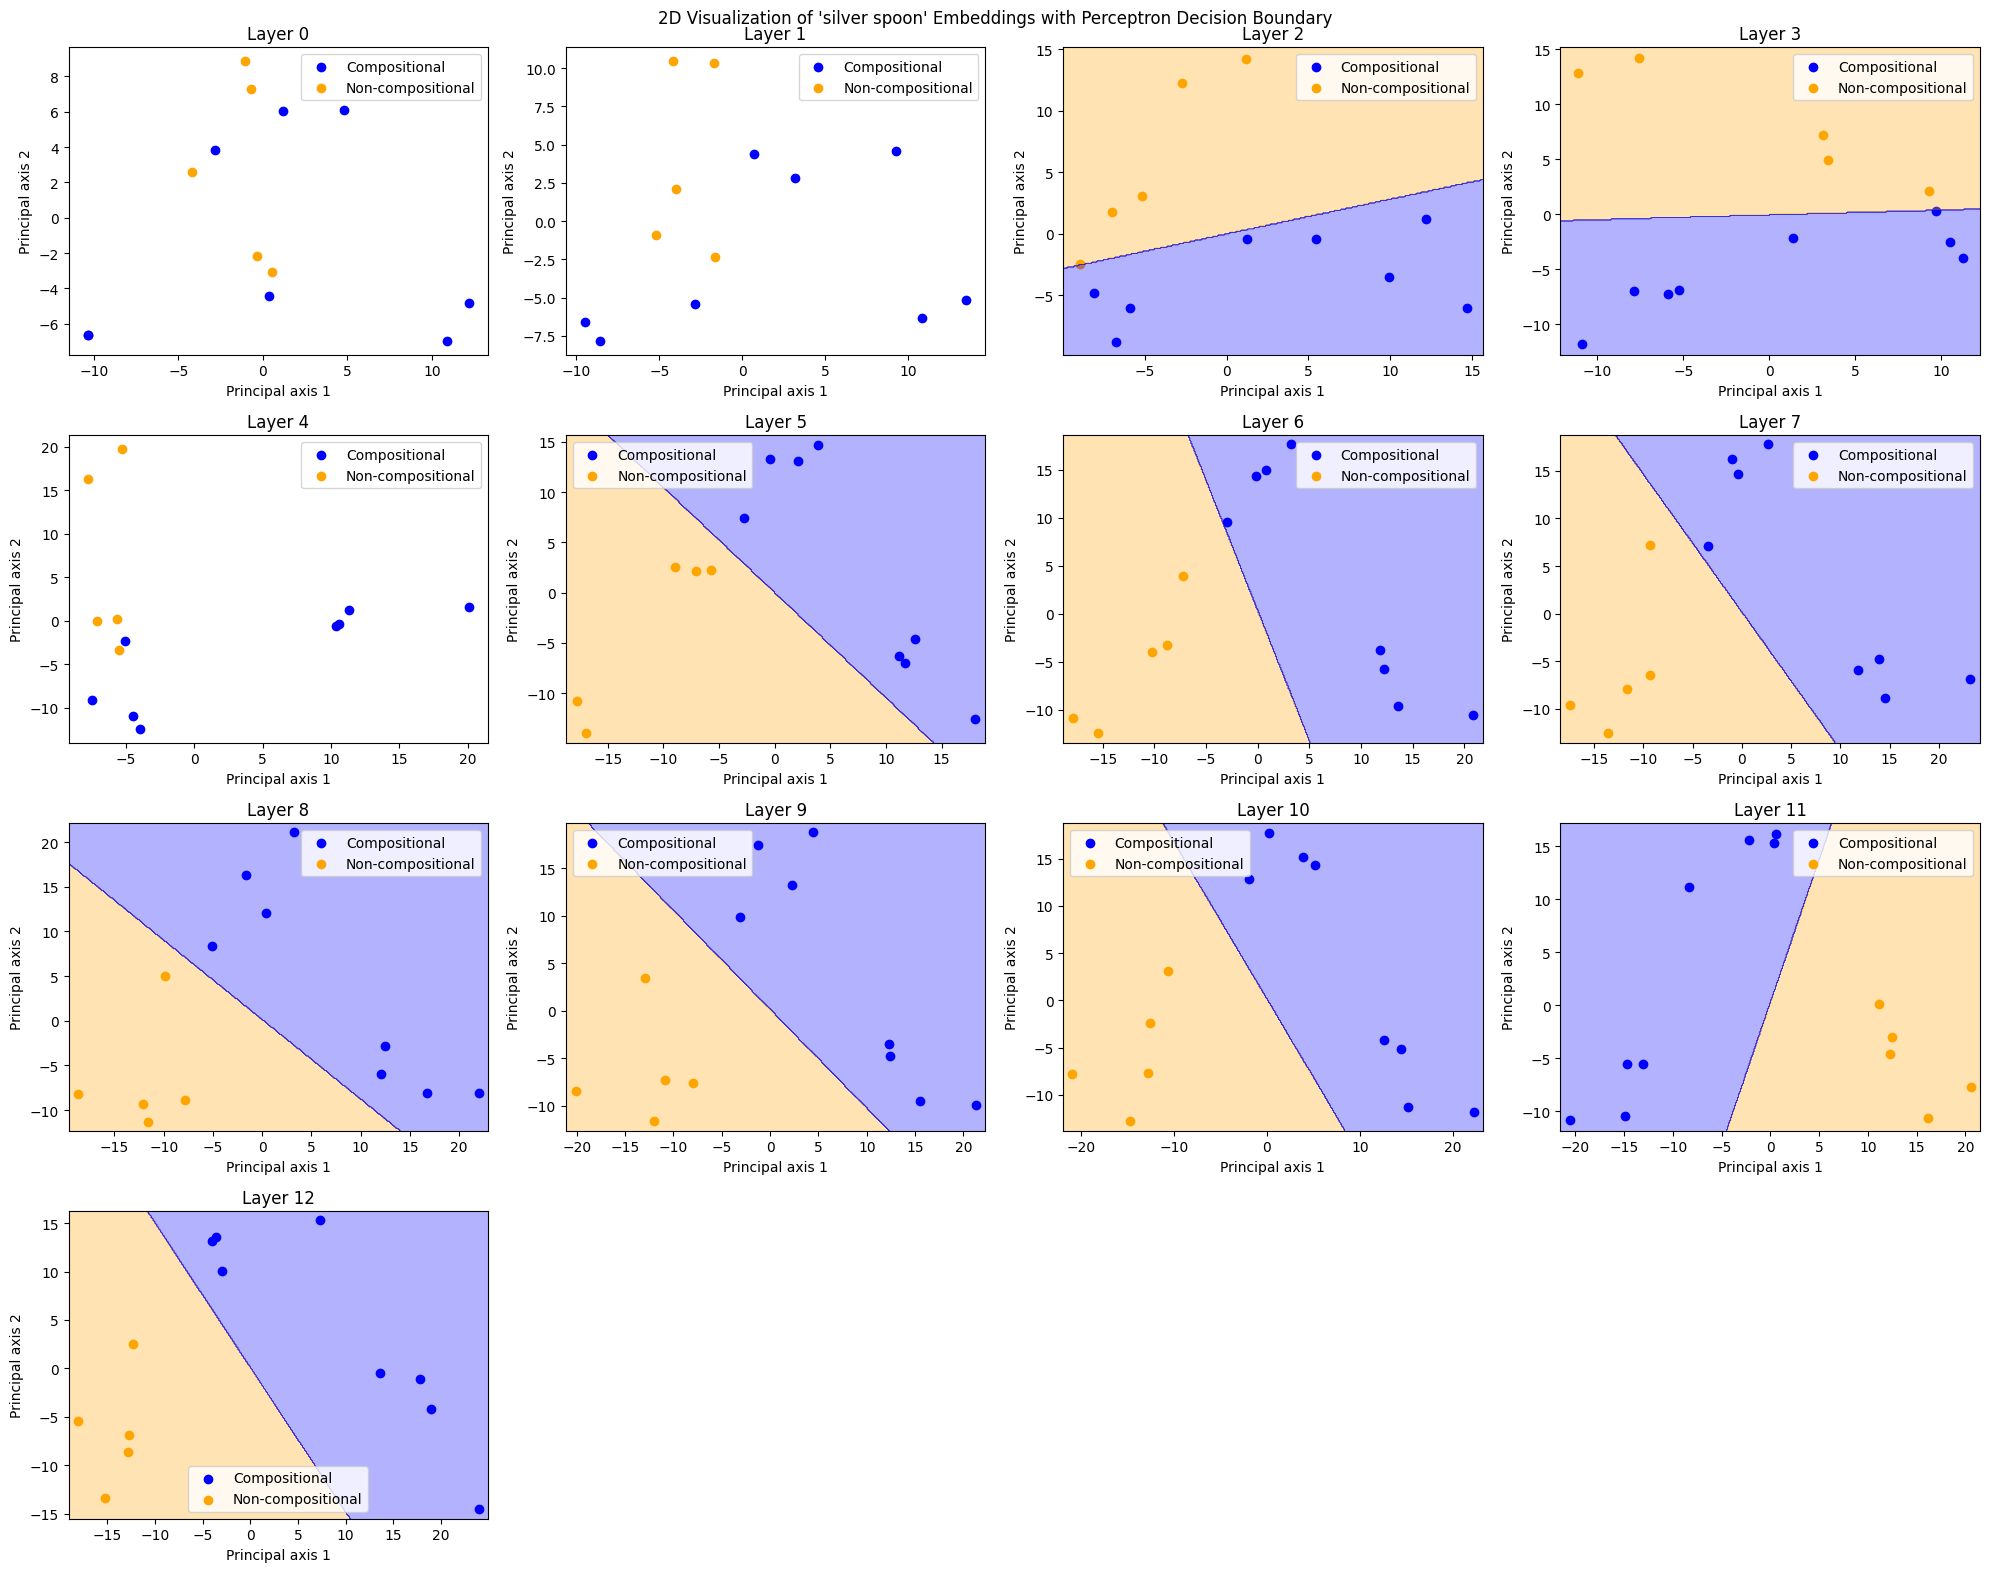

In [18]:
plot_decision_boundary_all_layers('silver spoon', data_df)

Layer 0
Training accuracy: 70.59% => data is not linearly separable.
Layer 1
Training accuracy: 64.71% => data is not linearly separable.
Layer 2
Training accuracy: 58.82% => data is not linearly separable.
Layer 3
Training accuracy: 58.82% => data is not linearly separable.
Layer 4
Training accuracy: 58.82% => data is not linearly separable.
Layer 5
Training accuracy: 47.06% => data is not linearly separable.
Layer 6
Training accuracy: 52.94% => data is not linearly separable.
Layer 7
Training accuracy: 64.71% => data is not linearly separable.
Layer 8
Training accuracy: 76.47% => data is not linearly separable.
Layer 9
Training accuracy: 64.71% => data is not linearly separable.
Layer 10
Training accuracy: 64.71% => data is not linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


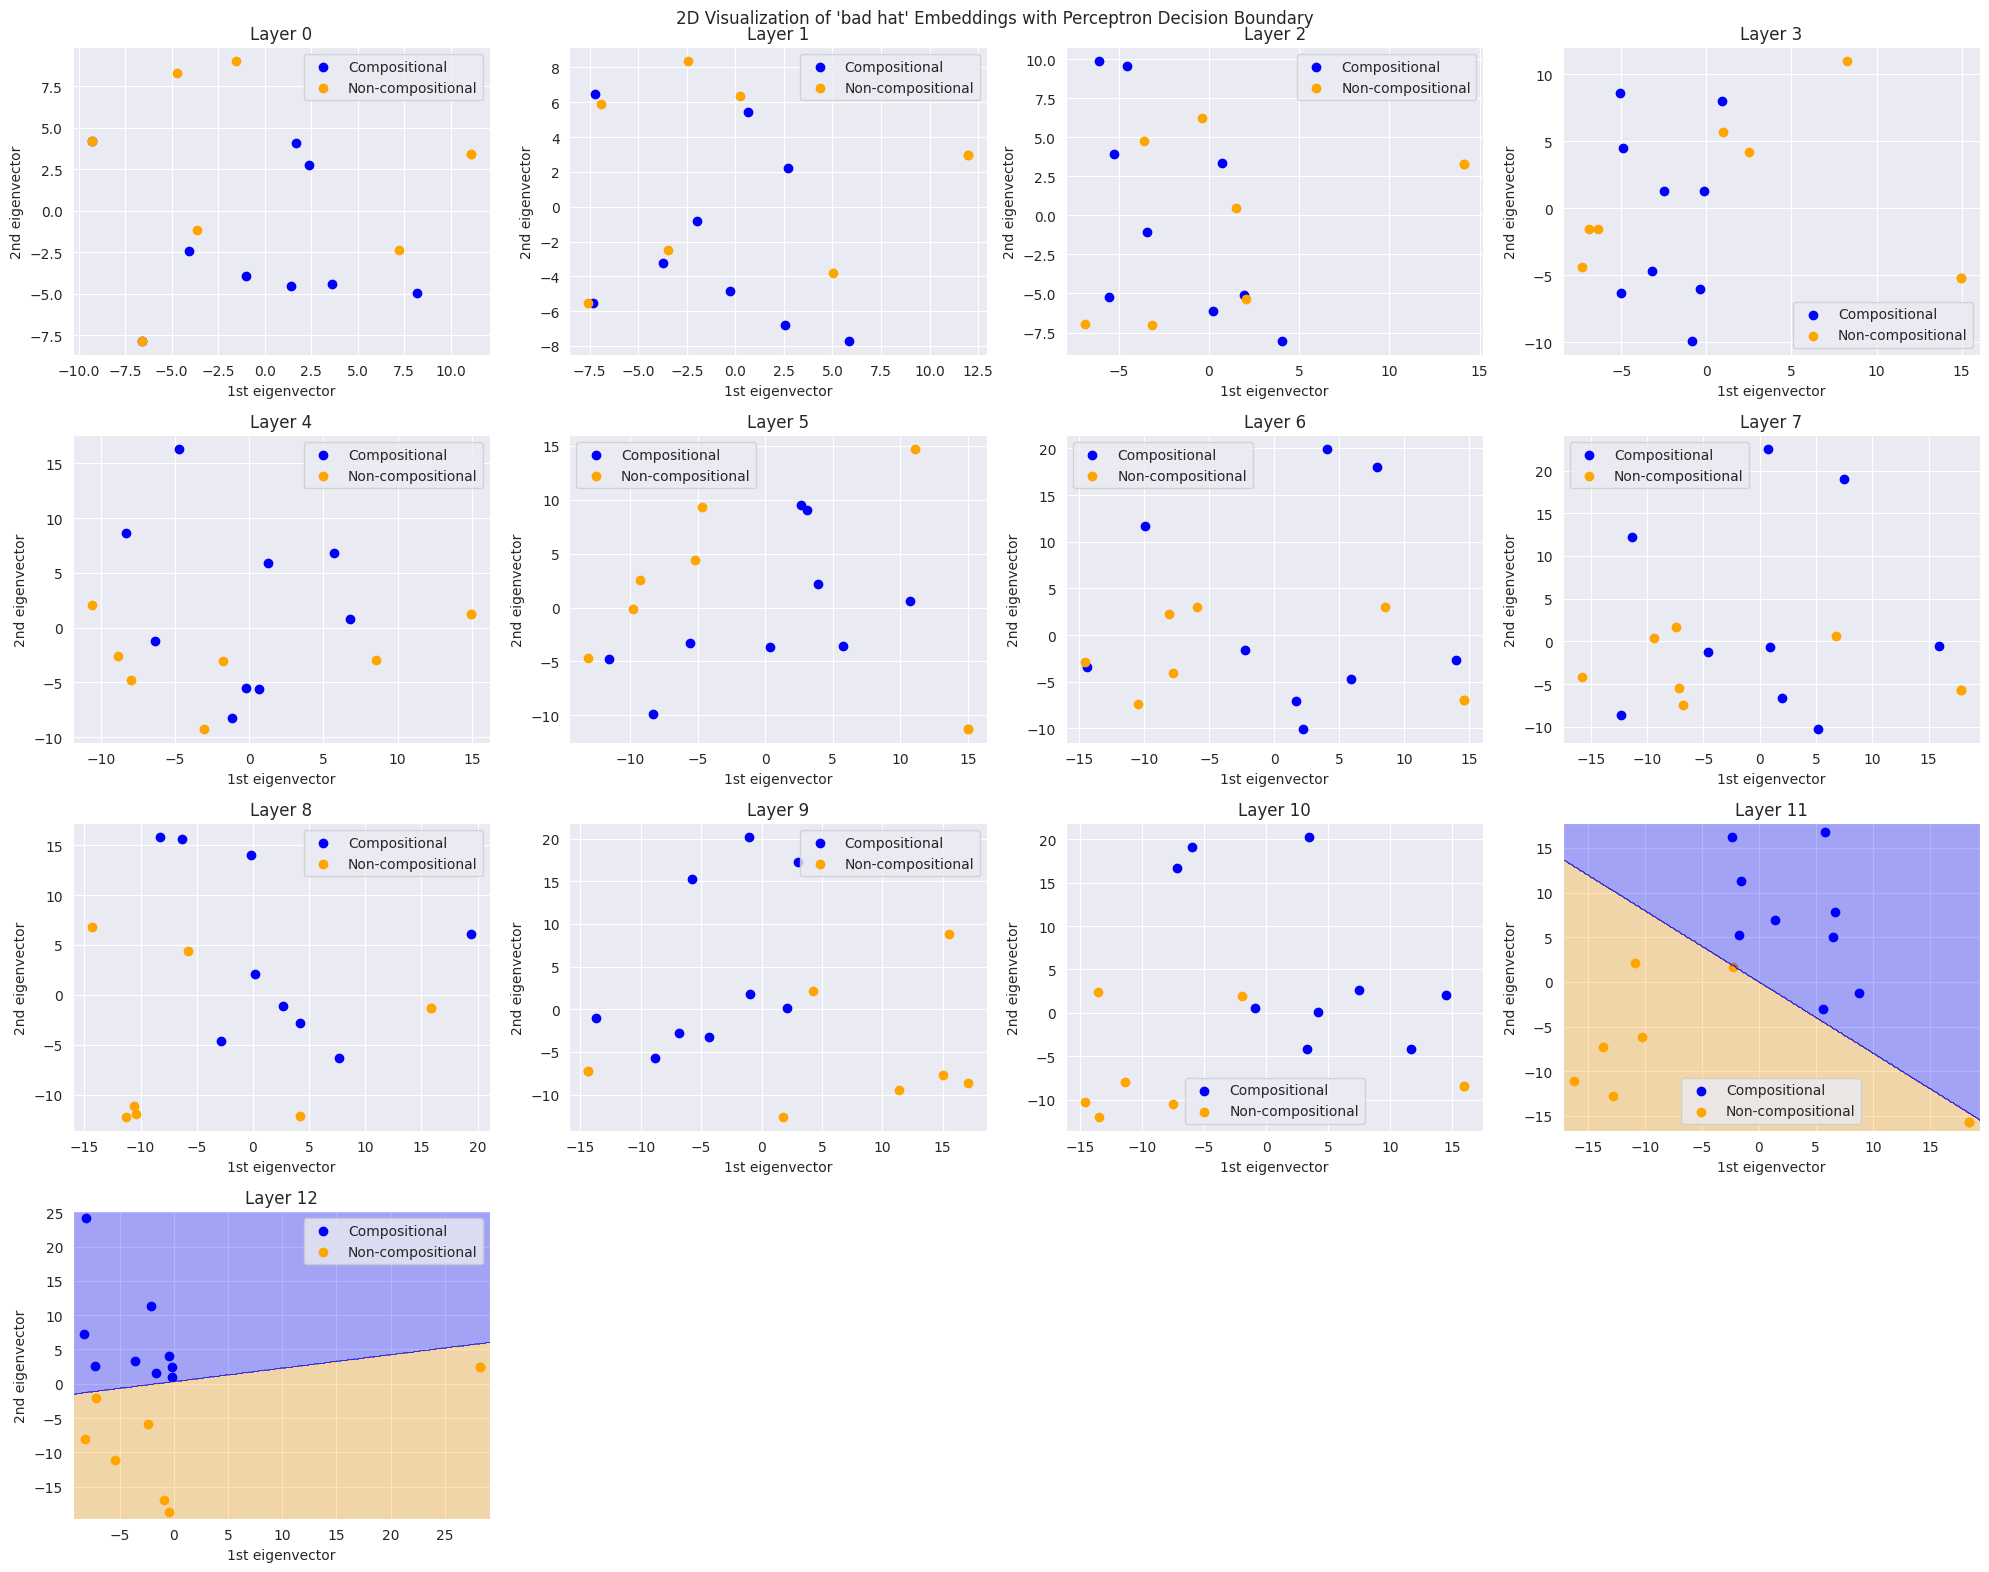

In [7]:
plot_decision_boundary_all_layers('bad hat', data_df)

### Linear separability tendencies

In [ ]:
# All MWEs
import collections

# Create a dictionary to store information for each MWE
mwe_info = collections.defaultdict(list)

for mwe in pair_df.index.tolist():
    # Create a list to store information for each layer
    layer_info = []

    for layer_id in range(13):
        # print(f"Layer {layer_id}")
        data_df = retrieve_encoded_df(data_df, batch_size=32, layer_id=layer_id, normalize=True, print_ignored=False)
        mwe_df = data_df[data_df['mwe'] == mwe].copy()
        filtered_df = mwe_df[mwe_df['literal_embedding'].notna()]
        X_C = np.array([combine_embeddings(emb1, emb2, "concatenation") for emb1, emb2 in filtered_df['literal_embedding']])
        y_C = [1] * len(X_C)  # compositional == 1

        # Retrieve non-compositional embeddings (X_NC)
        filtered_df = mwe_df[mwe_df['idiomatic_embedding'].notna()]
        X_NC = np.array([combine_embeddings(emb1, emb2, "concatenation") for emb1, emb2 in filtered_df['idiomatic_embedding']])
        y_NC = [0] * len(X_NC)  # non-compositional == 0

        X = np.vstack((X_C, X_NC))
        y = np.hstack((y_C, y_NC))

        pca = PCA(n_components=2)
        points = pca.fit_transform(X)

        # Train a sklearn perceptron on the transformed data
        perceptron = Perceptron()
        perceptron.fit(points, y)

        # Calculate accuracy on the transformed data
        y_pred = perceptron.predict(points)
        accuracy = accuracy_score(y, y_pred)

        # Store the information for this layer
        layer_info.append({
            'layer_id': layer_id,
            'accuracy': accuracy,
            'linearly_separable': accuracy == 1.0
        })

    # Store the layer information for this MWE
    mwe_info[mwe] = layer_info

mwe_info

In [6]:

total_mwes = len(mwe_info)
separable_mwes = sum(any(layer['linearly_separable'] for layer in mwe_info[mwe]) for mwe in mwe_info)
non_separable_mwes = total_mwes - separable_mwes

print(f"1) Proportion of MWEs that become linearly separable: {separable_mwes / total_mwes:.2f} ({separable_mwes})")
separable_mwe_list = [mwe for mwe in mwe_info if any(layer['linearly_separable'] for layer in mwe_info[mwe])]
print("   Separable MWEs:", separable_mwe_list)

print(f"\n   Proportion of MWEs that don't become linearly separable: {non_separable_mwes / total_mwes:.2f} ({non_separable_mwes})")
non_separable_mwe_list = [mwe for mwe in mwe_info if not any(layer['linearly_separable'] for layer in mwe_info[mwe])]
print("   Non-separable MWEs:", non_separable_mwe_list)

1) Proportion of MWEs that become linearly separable: 0.87 (34)
   Separable MWEs: ['acid test', 'chain reaction', 'public service', 'sitting duck', 'cutting edge', 'fine line', 'sacred cow', 'busy bee', 'brass ring', 'heavy cross', 'silver spoon', 'ground floor', 'baby blues', 'hard shoulder', 'silver lining', 'bad hat', 'nest egg', 'big cheese', 'dry land', 'blue blood', 'small fry', 'rocket science', 'poison pill', 'double cross', 'big wig', 'smoke screen', 'top dog', 'gold mine', 'food market', 'glass ceiling', 'low profile', 'fish story', 'rat run', 'closed book']

   Proportion of MWEs that don't become linearly separable: 0.13 (5)
   Non-separable MWEs: ['ancient history', 'best man', 'goose egg', 'brick wall', 'big fish']


In [7]:
print(f"There are {separable_mwes} MWEs that become linearly separable at some point")
early_layers = [0, 1, 2, 3]
middle_layers = [4, 5, 6, 7]
late_layers = [8, 9, 10, 11, 12]

# separable_early = sum(any(layer['layer_id'] in early_layers and layer['linearly_separable'] for layer in mwe_info[mwe]) for mwe in mwe_info)
separable_early_list = [mwe for mwe in mwe_info if any(layer['layer_id'] in early_layers and layer['linearly_separable'] for layer in mwe_info[mwe])]

# separable_middle = sum(any(layer['layer_id'] in middle_layers and layer['linearly_separable'] for layer in mwe_info[mwe]) for mwe in mwe_info) - separable_early
separable_middle_list = [mwe for mwe in mwe_info if any(layer['layer_id'] in middle_layers and layer['linearly_separable'] for layer in mwe_info[mwe]) and mwe not in separable_early_list]

# separable_late = separable_mwes - separable_early - separable_middle
separable_late_list = [mwe for mwe in mwe_info if any(layer['layer_id'] in late_layers and layer['linearly_separable'] for layer in mwe_info[mwe]) and mwe not in separable_early_list and mwe not in separable_middle_list]


print(f"\n2) Among separable MWEs:")
print(f"   Proportion that become separable in early layers: {len(separable_early_list) / separable_mwes:.2f}")
print("   Separable in early layers:", separable_early_list)

print(f"\n   Proportion that become separable in middle layers: {len(separable_middle_list) / separable_mwes:.2f}")
print("   Separable in middle layers:", separable_middle_list)

print(f"\n   Proportion that become separable in late layers: {len(separable_late_list) / separable_mwes:.2f}")
print("   Separable in late layers:", separable_late_list)

There are 34 MWEs that become linearly separable at some point

2) Among separable MWEs:
   Proportion that become separable in early layers: 0.74
   Separable in early layers: ['acid test', 'chain reaction', 'public service', 'sitting duck', 'cutting edge', 'fine line', 'sacred cow', 'busy bee', 'silver spoon', 'ground floor', 'hard shoulder', 'silver lining', 'nest egg', 'blue blood', 'small fry', 'rocket science', 'poison pill', 'double cross', 'smoke screen', 'gold mine', 'glass ceiling', 'low profile', 'fish story', 'rat run', 'closed book']

   Proportion that become separable in middle layers: 0.18
   Separable in middle layers: ['brass ring', 'heavy cross', 'baby blues', 'big cheese', 'big wig', 'top dog']

   Proportion that become separable in late layers: 0.09
   Separable in late layers: ['bad hat', 'dry land', 'food market']


In [8]:
lost_separability = sum(1 for mwe in mwe_info if any(layer['linearly_separable'] for layer in mwe_info[mwe][:-1]) and not mwe_info[mwe][-1]['linearly_separable'])
lost_separability_list = [mwe for mwe in mwe_info if any(layer['linearly_separable'] for layer in mwe_info[mwe][:-1]) and not mwe_info[mwe][-1]['linearly_separable']]
print(f"\n3) Proportion of MWEs that end up not linearly separable after being separable: {lost_separability / total_mwes:.2f}")
print("MWEs that end up not linearly separable after being separable:", lost_separability_list)

intermediate_loss = sum(1 for mwe in mwe_info if any(not layer['linearly_separable'] and any(later_layer['linearly_separable'] for later_layer in mwe_info[mwe][layer_idx + 1:]) for layer_idx, layer in enumerate(mwe_info[mwe][:-1])) and mwe_info[mwe][-1]['linearly_separable'])
intermediate_loss_list = [mwe for mwe in mwe_info if any(not layer['linearly_separable'] and any(later_layer['linearly_separable'] for later_layer in mwe_info[mwe][layer_idx + 1:]) for layer_idx, layer in enumerate(mwe_info[mwe][:-1])) and mwe_info[mwe][-1]['linearly_separable']]
print(f"\n4) Proportion of MWEs that lose separability in intermediate layers but end up separable: {intermediate_loss / total_mwes:.2f}")
print("MWEs that lose separability in intermediate layers but end up separable:", intermediate_loss_list)


3) Proportion of MWEs that end up not linearly separable after being separable: 0.51
MWEs that end up not linearly separable after being separable: ['acid test', 'chain reaction', 'public service', 'sitting duck', 'sacred cow', 'brass ring', 'baby blues', 'hard shoulder', 'nest egg', 'dry land', 'blue blood', 'small fry', 'poison pill', 'big wig', 'smoke screen', 'top dog', 'food market', 'glass ceiling', 'low profile', 'rat run']

4) Proportion of MWEs that lose separability in intermediate layers but end up separable: 0.36
MWEs that lose separability in intermediate layers but end up separable: ['cutting edge', 'fine line', 'busy bee', 'heavy cross', 'silver spoon', 'ground floor', 'silver lining', 'bad hat', 'big cheese', 'rocket science', 'double cross', 'gold mine', 'fish story', 'closed book']


In [ ]:
# MWEs with over 3 examples per meaning

# Create a dictionary to store information for each MWE
mwe_info = collections.defaultdict(list)

for mwe in pair_df.index.tolist():
    # Create a list to store information for each layer
    layer_info = []

    for layer_id in range(13):
        # print(f"Layer {layer_id}")
        data_df = retrieve_encoded_df(data_df, batch_size=32, layer_id=layer_id, normalize=True, print_ignored=False)
        mwe_df = data_df[data_df['mwe'] == mwe].copy()
        filtered_df = mwe_df[mwe_df['literal_embedding'].notna()]
        X_C = np.array([combine_embeddings(emb1, emb2, "concatenation") for emb1, emb2 in filtered_df['literal_embedding']])
        y_C = [1] * len(X_C)  # compositional == 1

        # Retrieve non-compositional embeddings (X_NC)
        filtered_df = mwe_df[mwe_df['idiomatic_embedding'].notna()]
        X_NC = np.array([combine_embeddings(emb1, emb2, "concatenation") for emb1, emb2 in filtered_df['idiomatic_embedding']])
        y_NC = [0] * len(X_NC)  # non-compositional == 0

        X = np.vstack((X_C, X_NC))
        y = np.hstack((y_C, y_NC))

        pca = PCA(n_components=2)
        points = pca.fit_transform(X)

        # Train a sklearn perceptron on the transformed data
        perceptron = Perceptron()
        perceptron.fit(points, y)

        # Calculate accuracy on the transformed data
        y_pred = perceptron.predict(points)
        accuracy = accuracy_score(y, y_pred)

        # Store the information for this layer
        layer_info.append({
            'layer_id': layer_id,
            'accuracy': accuracy,
            'linearly_separable': accuracy == 1.0
        })

    # Store the layer information for this MWE
    mwe_info[mwe] = layer_info

mwe_info

In [27]:

total_mwes = len(mwe_info)
separable_mwes = sum(any(layer['linearly_separable'] for layer in mwe_info[mwe]) for mwe in mwe_info)
non_separable_mwes = total_mwes - separable_mwes

print(f"1) Proportion of MWEs that become linearly separable: {separable_mwes / total_mwes:.2f} ({separable_mwes})")
separable_mwe_list = [mwe for mwe in mwe_info if any(layer['linearly_separable'] for layer in mwe_info[mwe])]
print("   Separable MWEs:", separable_mwe_list)

print(f"\n   Proportion of MWEs that don't become linearly separable: {non_separable_mwes / total_mwes:.2f} ({non_separable_mwes})")
non_separable_mwe_list = [mwe for mwe in mwe_info if not any(layer['linearly_separable'] for layer in mwe_info[mwe])]
print("   Non-separable MWEs:", non_separable_mwe_list)

1) Proportion of MWEs that become linearly separable: 0.73 (11)
   Separable MWEs: ['acid test', 'cutting edge', 'fine line', 'brass ring', 'silver spoon', 'ground floor', 'bad hat', 'dry land', 'blue blood', 'rocket science', 'closed book']

   Proportion of MWEs that don't become linearly separable: 0.27 (4)
   Non-separable MWEs: ['ancient history', 'best man', 'brick wall', 'big fish']


In [39]:
x = 1  
y = 11  

percentage = (x / y) * 100

print(f"{x} represents {percentage:.2f}% of {y}")

1 represents 9.09% of 11


In [41]:
print(f"There are {separable_mwes} MWEs that become linearly separable at some point")
early_layers = [0, 1, 2, 3]
middle_layers = [4, 5, 6, 7]
late_layers = [8, 9, 10, 11, 12]

# separable_early = sum(any(layer['layer_id'] in early_layers and layer['linearly_separable'] for layer in mwe_info[mwe]) for mwe in mwe_info)
separable_early_list = [mwe for mwe in mwe_info if any(layer['layer_id'] in early_layers and layer['linearly_separable'] for layer in mwe_info[mwe])]

# separable_middle = sum(any(layer['layer_id'] in middle_layers and layer['linearly_separable'] for layer in mwe_info[mwe]) for mwe in mwe_info) - separable_early
separable_middle_list = [mwe for mwe in mwe_info if any(layer['layer_id'] in middle_layers and layer['linearly_separable'] for layer in mwe_info[mwe]) and mwe not in separable_early_list]

# separable_late = separable_mwes - separable_early - separable_middle
separable_late_list = [mwe for mwe in mwe_info if any(layer['layer_id'] in late_layers and layer['linearly_separable'] for layer in mwe_info[mwe]) and mwe not in separable_early_list and mwe not in separable_middle_list]


print(f"\n2) Among separable MWEs:")
print(f"   Proportion that become separable in early layers: {len(separable_early_list) / separable_mwes:.2f}")
print("   Separable in early layers:", separable_early_list)

print(f"\n   Proportion that become separable in middle layers: {len(separable_middle_list) / separable_mwes:.2f}")
print("   Separable in middle layers:", separable_middle_list)

print(f"\n   Proportion that become separable in late layers: {len(separable_late_list) / separable_mwes:.2f}")
print("   Separable in late layers:", separable_late_list)


There are 11 MWEs that become linearly separable at some point

2) Among separable MWEs:
   Proportion that become separable in early layers: 0.73
   Separable in early layers: ['acid test', 'cutting edge', 'fine line', 'silver spoon', 'ground floor', 'blue blood', 'rocket science', 'closed book']

   Proportion that become separable in middle layers: 0.09
   Separable in middle layers: ['brass ring']

   Proportion that become separable in late layers: 0.18
   Separable in late layers: ['bad hat', 'dry land']


In [30]:
lost_separability = sum(1 for mwe in mwe_info if any(layer['linearly_separable'] for layer in mwe_info[mwe][:-1]) and not mwe_info[mwe][-1]['linearly_separable'])
lost_separability_list = [mwe for mwe in mwe_info if any(layer['linearly_separable'] for layer in mwe_info[mwe][:-1]) and not mwe_info[mwe][-1]['linearly_separable']]
print(f"\n3) Proportion of MWEs that end up not linearly separable after being separable: {lost_separability / total_mwes:.2f}")
print("MWEs that end up not linearly separable after being separable:", lost_separability_list)



3) Proportion of MWEs that end up not linearly separable after being separable: 0.27
MWEs that end up not linearly separable after being separable: ['acid test', 'brass ring', 'dry land', 'blue blood']


In [31]:
intermediate_loss = sum(1 for mwe in mwe_info if any(not layer['linearly_separable'] and any(later_layer['linearly_separable'] for later_layer in mwe_info[mwe][layer_idx + 1:]) for layer_idx, layer in enumerate(mwe_info[mwe][:-1])) and mwe_info[mwe][-1]['linearly_separable'])
intermediate_loss_list = [mwe for mwe in mwe_info if any(not layer['linearly_separable'] and any(later_layer['linearly_separable'] for later_layer in mwe_info[mwe][layer_idx + 1:]) for layer_idx, layer in enumerate(mwe_info[mwe][:-1])) and mwe_info[mwe][-1]['linearly_separable']]
print(f"\n4) Proportion of MWEs that lose separability in intermediate layers but end up separable: {intermediate_loss / total_mwes:.2f}")
print("MWEs that lose separability in intermediate layers but end up separable:", intermediate_loss_list)
# wrong: cutting edge, rocket science


4) Proportion of MWEs that lose separability in intermediate layers but end up separable: 0.47
MWEs that lose separability in intermediate layers but end up separable: ['cutting edge', 'fine line', 'silver spoon', 'ground floor', 'bad hat', 'rocket science', 'closed book']


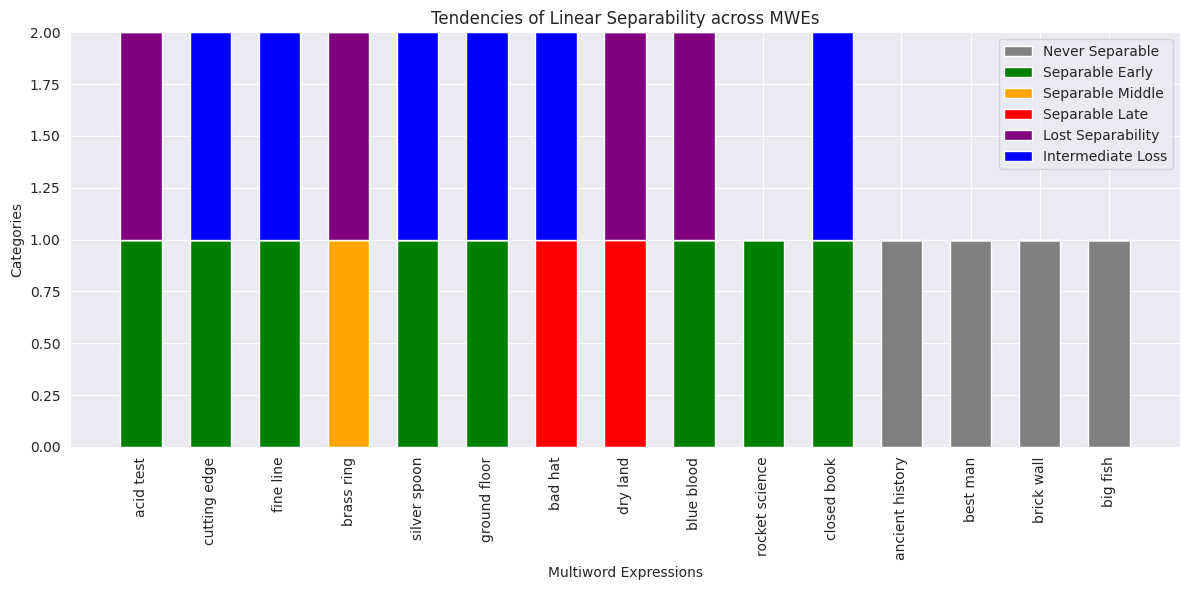

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# MWE data
mwes = ['acid test', 'cutting edge', 'fine line', 'brass ring', 'silver spoon', 'ground floor', 'bad hat', 'dry land', 'blue blood', 'rocket science', 'closed book', 'ancient history', 'best man', 'brick wall', 'big fish']
total_mwes = len(mwes)

# Categorize MWEs
never_separable = ['ancient history', 'best man', 'brick wall', 'big fish']
separable_early = ['acid test', 'cutting edge', 'fine line', 'silver spoon', 'ground floor', 'blue blood', 'rocket science', 'closed book']
separable_middle = ['brass ring']
separable_late = ['bad hat', 'dry land']
lost_separability = ['acid test', 'brass ring', 'dry land', 'blue blood']
intermediate_loss = ['cutting edge', 'fine line', 'silver spoon', 'ground floor', 'bad hat', 'closed book']

# Create lists of heights for each category
never_separable_heights = [1 if mwe in never_separable else 0 for mwe in mwes]
separable_early_heights = [1 if mwe in separable_early else 0 for mwe in mwes]
separable_middle_heights = [1 if mwe in separable_middle else 0 for mwe in mwes]
separable_late_heights = [1 if mwe in separable_late else 0 for mwe in mwes]
lost_separability_heights = [1 if mwe in lost_separability else 0 for mwe in mwes]
intermediate_loss_heights = [1 if mwe in intermediate_loss else 0 for mwe in mwes]

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Set up bar positions and widths
bar_width = 0.6
bar_positions = np.arange(total_mwes)

# Plot bars
ax.bar(bar_positions, never_separable_heights, bar_width, label='Never Separable', color='gray')
ax.bar(bar_positions, separable_early_heights, bar_width, label='Separable Early', color='green', bottom=never_separable_heights)
ax.bar(bar_positions, separable_middle_heights, bar_width, label='Separable Middle', color='orange', bottom=[sum(x) for x in zip(never_separable_heights, separable_early_heights)])
ax.bar(bar_positions, separable_late_heights, bar_width, label='Separable Late', color='red', bottom=[sum(x) for x in zip(never_separable_heights, separable_early_heights, separable_middle_heights)])
ax.bar(bar_positions, lost_separability_heights, bar_width, label='Lost Separability', color='purple', bottom=[sum(x) for x in zip(never_separable_heights, separable_early_heights, separable_middle_heights, separable_late_heights)])
ax.bar(bar_positions, intermediate_loss_heights, bar_width, label='Intermediate Loss', color='blue', bottom=[sum(x) for x in zip(never_separable_heights, separable_early_heights, separable_middle_heights, separable_late_heights, lost_separability_heights)])

# Set x-ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(mwes, rotation=90)

# Add labels and title
ax.set_xlabel('Multiword Expressions')
ax.set_ylabel('Categories')
ax.set_title('Tendencies of Linear Separability across MWEs')
ax.legend()

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


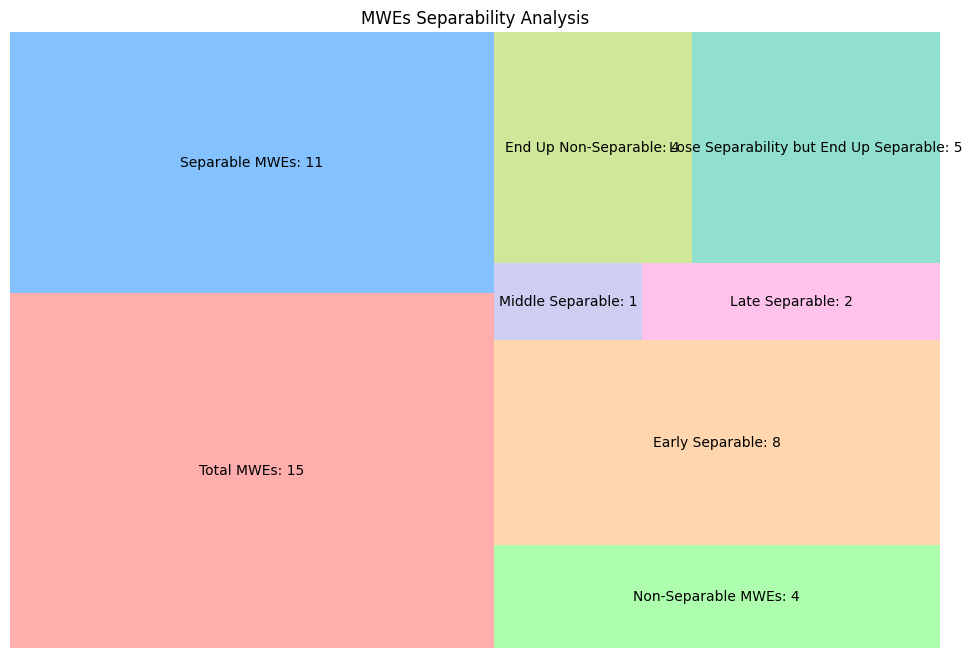

In [3]:

# Data
total_mwes = 15
separable_mwes = 11
non_separable_mwes = 4

early_separable = 8
middle_separable = 1
late_separable = 2

end_up_non_separable = 4
lose_separability_but_end_up_separable = 5

labels = [
    'Total MWEs: 15', 
    'Separable MWEs: 11', 
    'Non-Separable MWEs: 4', 
    'Early Separable: 8', 
    'Middle Separable: 1', 
    'Late Separable: 2', 
    'End Up Non-Separable: 4', 
    'Lose Separability but End Up Separable: 5'
]

sizes = [
    total_mwes, 
    separable_mwes, 
    non_separable_mwes, 
    early_separable, 
    middle_separable, 
    late_separable, 
    end_up_non_separable, 
    lose_separability_but_end_up_separable
]

colors = [
    '#ff9999','#66b3ff','#99ff99','#ffcc99',
    '#c2c2f0','#ffb3e6','#c4e17f','#76d7c4'
]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, ax=ax)
plt.axis('off')
plt.title('MWEs Separability Analysis')

plt.show()


In [18]:


# Define the nodes and their labels
labels = [
    "Total MWEs", "Non-Separable MWEs", "Separable MWEs",
    "End Up Non-Separable", "Lose Separability but End Up Separable",
    "Early Separable", "Middle Separable", "Late Separable",
    "ancient history", "best man", "brick wall", "big fish",
    "acid test", "cutting edge", "fine line", "silver spoon",
    "ground floor", "blue blood", "rocket science", "closed book",
    "brass ring", "bad hat", "dry land"
]

# Define the links between nodes
source = [
    0, 0,  # Total MWEs to Non-Separable and Separable MWEs
    1, 1, 1, 1,  # Non-Separable MWEs to specific MWEs
    2, 2, 2,  # Separable MWEs to Early, Middle, and Late Separable
    5, 5, 5, 5, 5, 5, 5, 5,  # Early Separable to specific MWEs
    6,  # Middle Separable to specific MWE
    7, 7,  # Late Separable to specific MWEs
    2, 2,  # Separable MWEs to End Up Non-Separable and Lose Separability but End Up Separable
    3, 3, 3, 3,  # End Up Non-Separable to specific MWEs
    4, 4, 4, 4, 4  # Lose Separability but End Up Separable to specific MWEs
]

target = [
    1, 2,  # Total MWEs to Non-Separable and Separable MWEs
    8, 9, 10, 11,  # Non-Separable MWEs
    5, 6, 7,  # Separable MWEs to Early, Middle, and Late Separable
    12, 13, 14, 15, 16, 17, 18, 19,  # Early Separable to specific MWEs
    20,  # Middle Separable to specific MWE
    21, 22,  # Late Separable to specific MWEs
    3, 4,  # Separable MWEs to End Up Non-Separable and Lose Separability but End Up Separable
    12, 20, 21, 17,  # End Up Non-Separable to specific MWEs
    14, 15, 16, 21, 19  # Lose Separability but End Up Separable to specific MWEs
]

# Define the values for each link
values = [
    4, 11,  # Total MWEs to Non-Separable and Separable MWEs
    1, 1, 1, 1,  # Non-Separable MWEs
    8, 1, 2,  # Separable MWEs to Early, Middle, and Late Separable
    1, 1, 1, 1, 1, 1, 1, 1,  # Early Separable to specific MWEs
    1,  # Middle Separable to specific MWE
    1, 1,  # Late Separable to specific MWEs
    4, 5,  # Separable MWEs to End Up Non-Separable and Lose Separability but End Up Separable
    1, 1, 1, 1,  # End Up Non-Separable to specific MWEs
    1, 1, 1, 1, 1  # Lose Separability but End Up Separable to specific MWEs
]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=values
    )
)])

fig.update_layout(title_text="MWEs Separability Analysis", font_size=12)
fig.show()


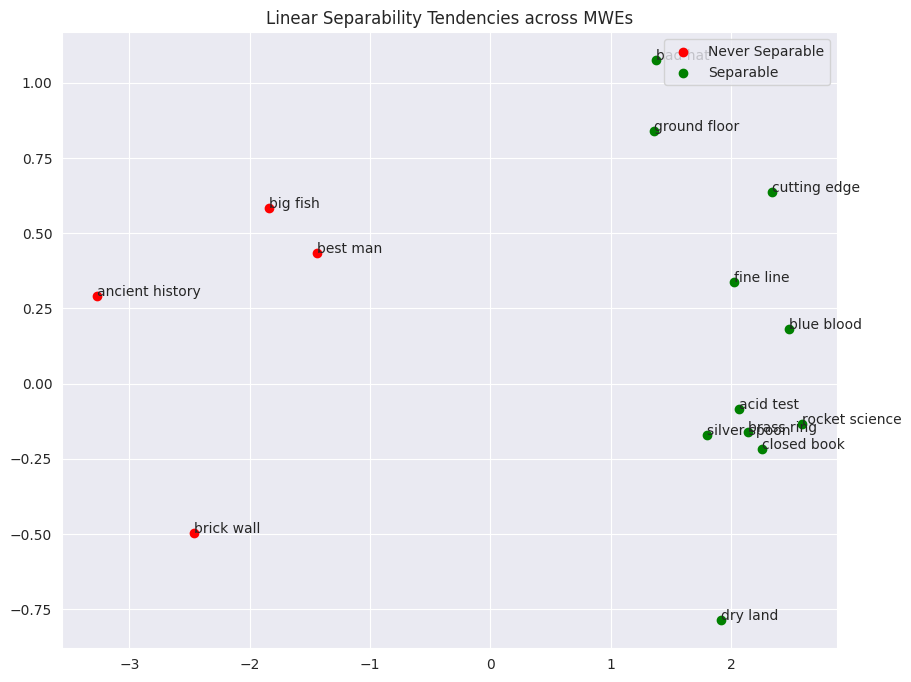

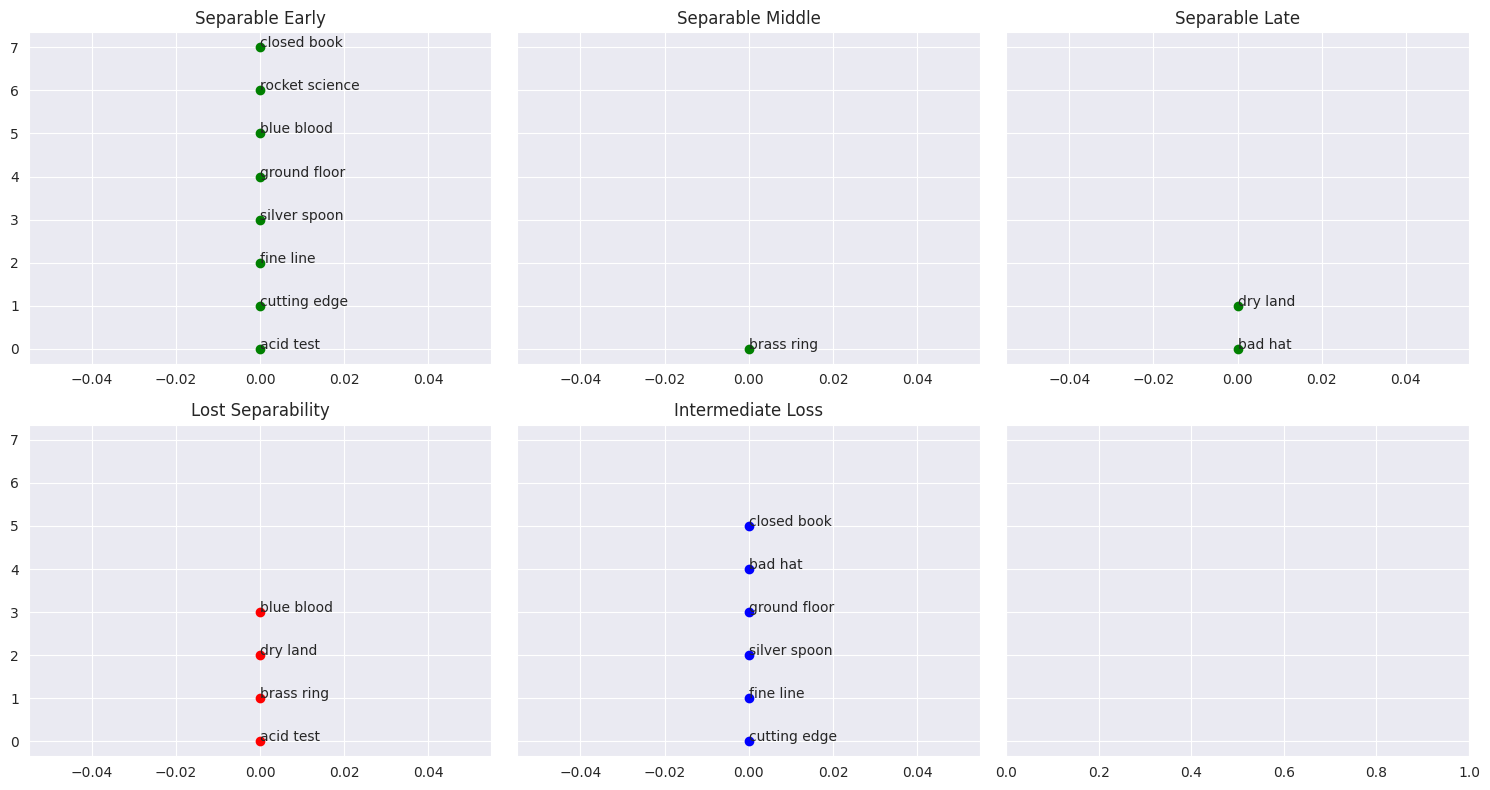

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import AnchoredText

# MWE data
mwes = ['acid test', 'cutting edge', 'fine line', 'brass ring', 'silver spoon', 'ground floor', 'bad hat', 'dry land', 'blue blood', 'rocket science', 'closed book', 'ancient history', 'best man', 'brick wall', 'big fish']
total_mwes = len(mwes)

# Categorize MWEs
never_separable = ['ancient history', 'best man', 'brick wall', 'big fish']
separable_early = ['acid test', 'cutting edge', 'fine line', 'silver spoon', 'ground floor', 'blue blood', 'rocket science', 'closed book']
separable_middle = ['brass ring']
separable_late = ['bad hat', 'dry land']
lost_separability = ['acid test', 'brass ring', 'dry land', 'blue blood']
intermediate_loss = ['cutting edge', 'fine line', 'silver spoon', 'ground floor', 'bad hat', 'closed book']

# Create a scatter plot with two distinct clusters
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the never separable MWEs
x_never_separable = np.random.normal(loc=-2, scale=0.5, size=len(never_separable))
y_never_separable = np.random.normal(loc=0, scale=0.5, size=len(never_separable))
ax.scatter(x_never_separable, y_never_separable, color='r', label='Never Separable')
for i, mwe in enumerate(never_separable):
    ax.annotate(mwe, (x_never_separable[i], y_never_separable[i]))

# Plot the separable MWEs
x_separable = np.random.normal(loc=2, scale=0.5, size=len(mwes) - len(never_separable))
y_separable = np.random.normal(loc=0, scale=0.5, size=len(mwes) - len(never_separable))
ax.scatter(x_separable, y_separable, color='g', label='Separable')
for i, mwe in enumerate(mwes):
    if mwe not in never_separable:
        ax.annotate(mwe, (x_separable[i - len(never_separable)], y_separable[i - len(never_separable)]))

ax.legend()
ax.set_title('Linear Separability Tendencies across MWEs')

# Create small multiples layout for separable MWEs
fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axs = axs.flatten()

# Plot separable early MWEs
ax = axs[0]
ax.scatter([0] * len(separable_early), range(len(separable_early)), color='g')
for i, mwe in enumerate(separable_early):
    ax.annotate(mwe, (0, i))
ax.set_title('Separable Early')

# Plot separable middle MWEs
ax = axs[1]
ax.scatter([0] * len(separable_middle), range(len(separable_middle)), color='g')
for i, mwe in enumerate(separable_middle):
    ax.annotate(mwe, (0, i))
ax.set_title('Separable Middle')

# Plot separable late MWEs
ax = axs[2]
ax.scatter([0] * len(separable_late), range(len(separable_late)), color='g')
for i, mwe in enumerate(separable_late):
    ax.annotate(mwe, (0, i))
ax.set_title('Separable Late')

# Plot lost separability MWEs
ax = axs[3]
ax.scatter([0] * len(lost_separability), range(len(lost_separability)), color='r')
for i, mwe in enumerate(lost_separability):
    ax.annotate(mwe, (0, i))
ax.set_title('Lost Separability')

# Plot intermediate loss MWEs
ax = axs[4]
ax.scatter([0] * len(intermediate_loss), range(len(intermediate_loss)), color='b')
for i, mwe in enumerate(intermediate_loss):
    ax.annotate(mwe, (0, i))
ax.set_title('Intermediate Loss')

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()


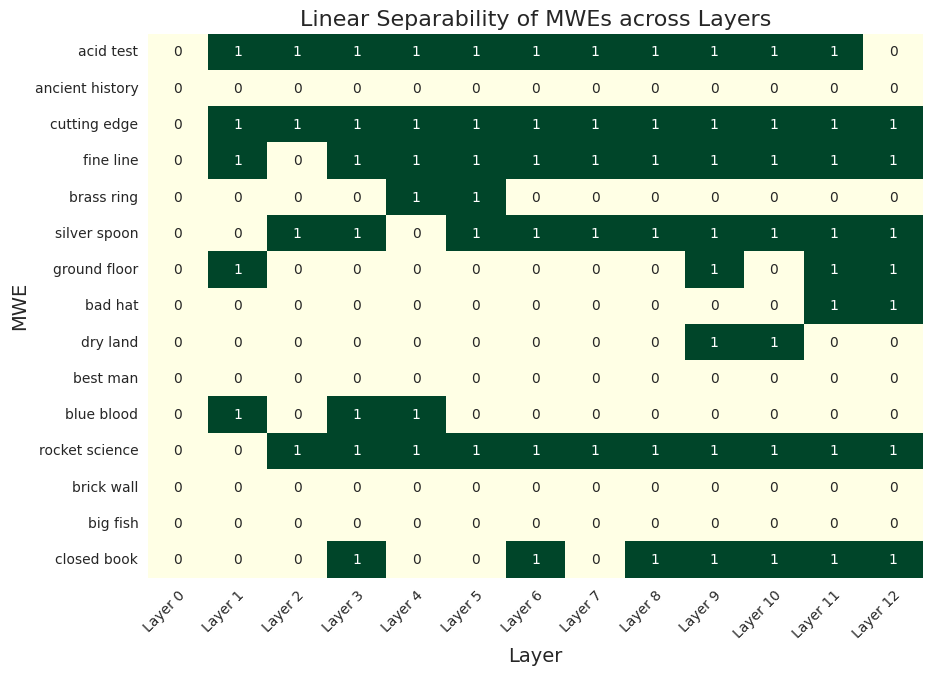

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a matrix to store the linear separability information
separability_matrix = np.zeros((len(mwe_info), 13), dtype=int)

# Fill the matrix with linear separability information
for i, mwe in enumerate(mwe_info):
    for j, layer in enumerate(mwe_info[mwe]):
        separability_matrix[i, j] = int(layer['linearly_separable'])

# Create a DataFrame from the matrix
df = pd.DataFrame(separability_matrix, index=list(mwe_info.keys()), columns=[f'Layer {i}' for i in range(13)])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the matrix using seaborn
sns.heatmap(df, cmap='YlGn', annot=True, cbar=False, ax=ax)

# Customize the plot
ax.set_title('Linear Separability of MWEs across Layers', fontsize=16)
ax.set_xlabel('Layer', fontsize=14)
ax.set_ylabel('MWE', fontsize=14)

# Rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


### All MWEs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

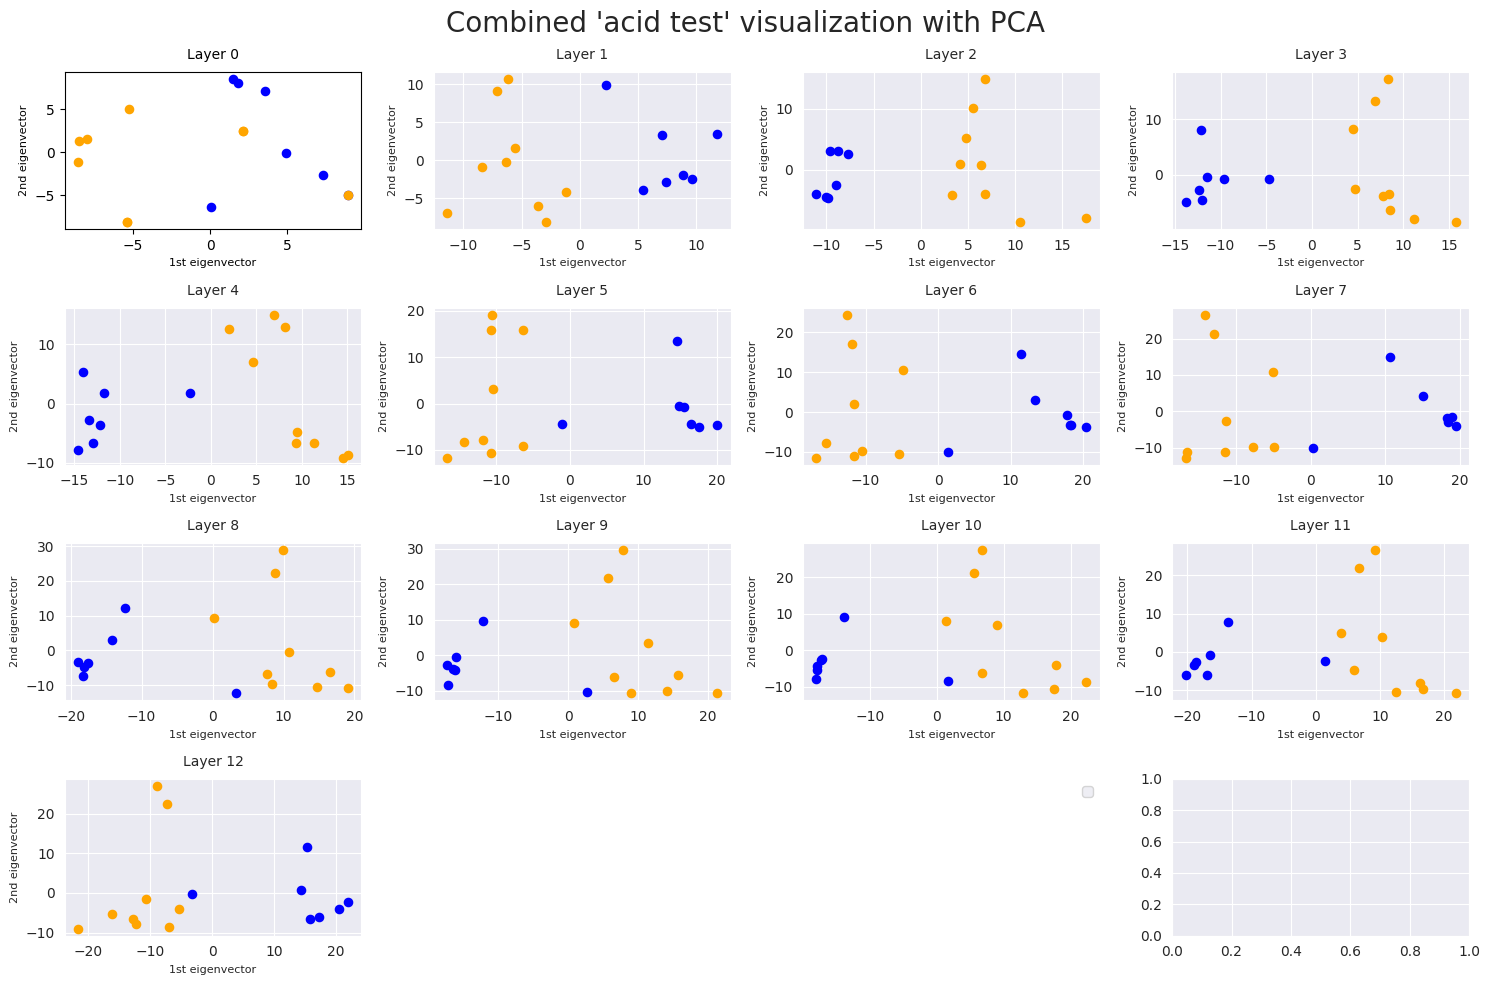

Layer 0
Training accuracy: 68.75% => data is not linearly separable.
Layer 1
Training accuracy: 100.00% => data is linearly separable.
Layer 2
Training accuracy: 100.00% => data is linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 100.00% => data is linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 93.75% => data is not linearly separable.


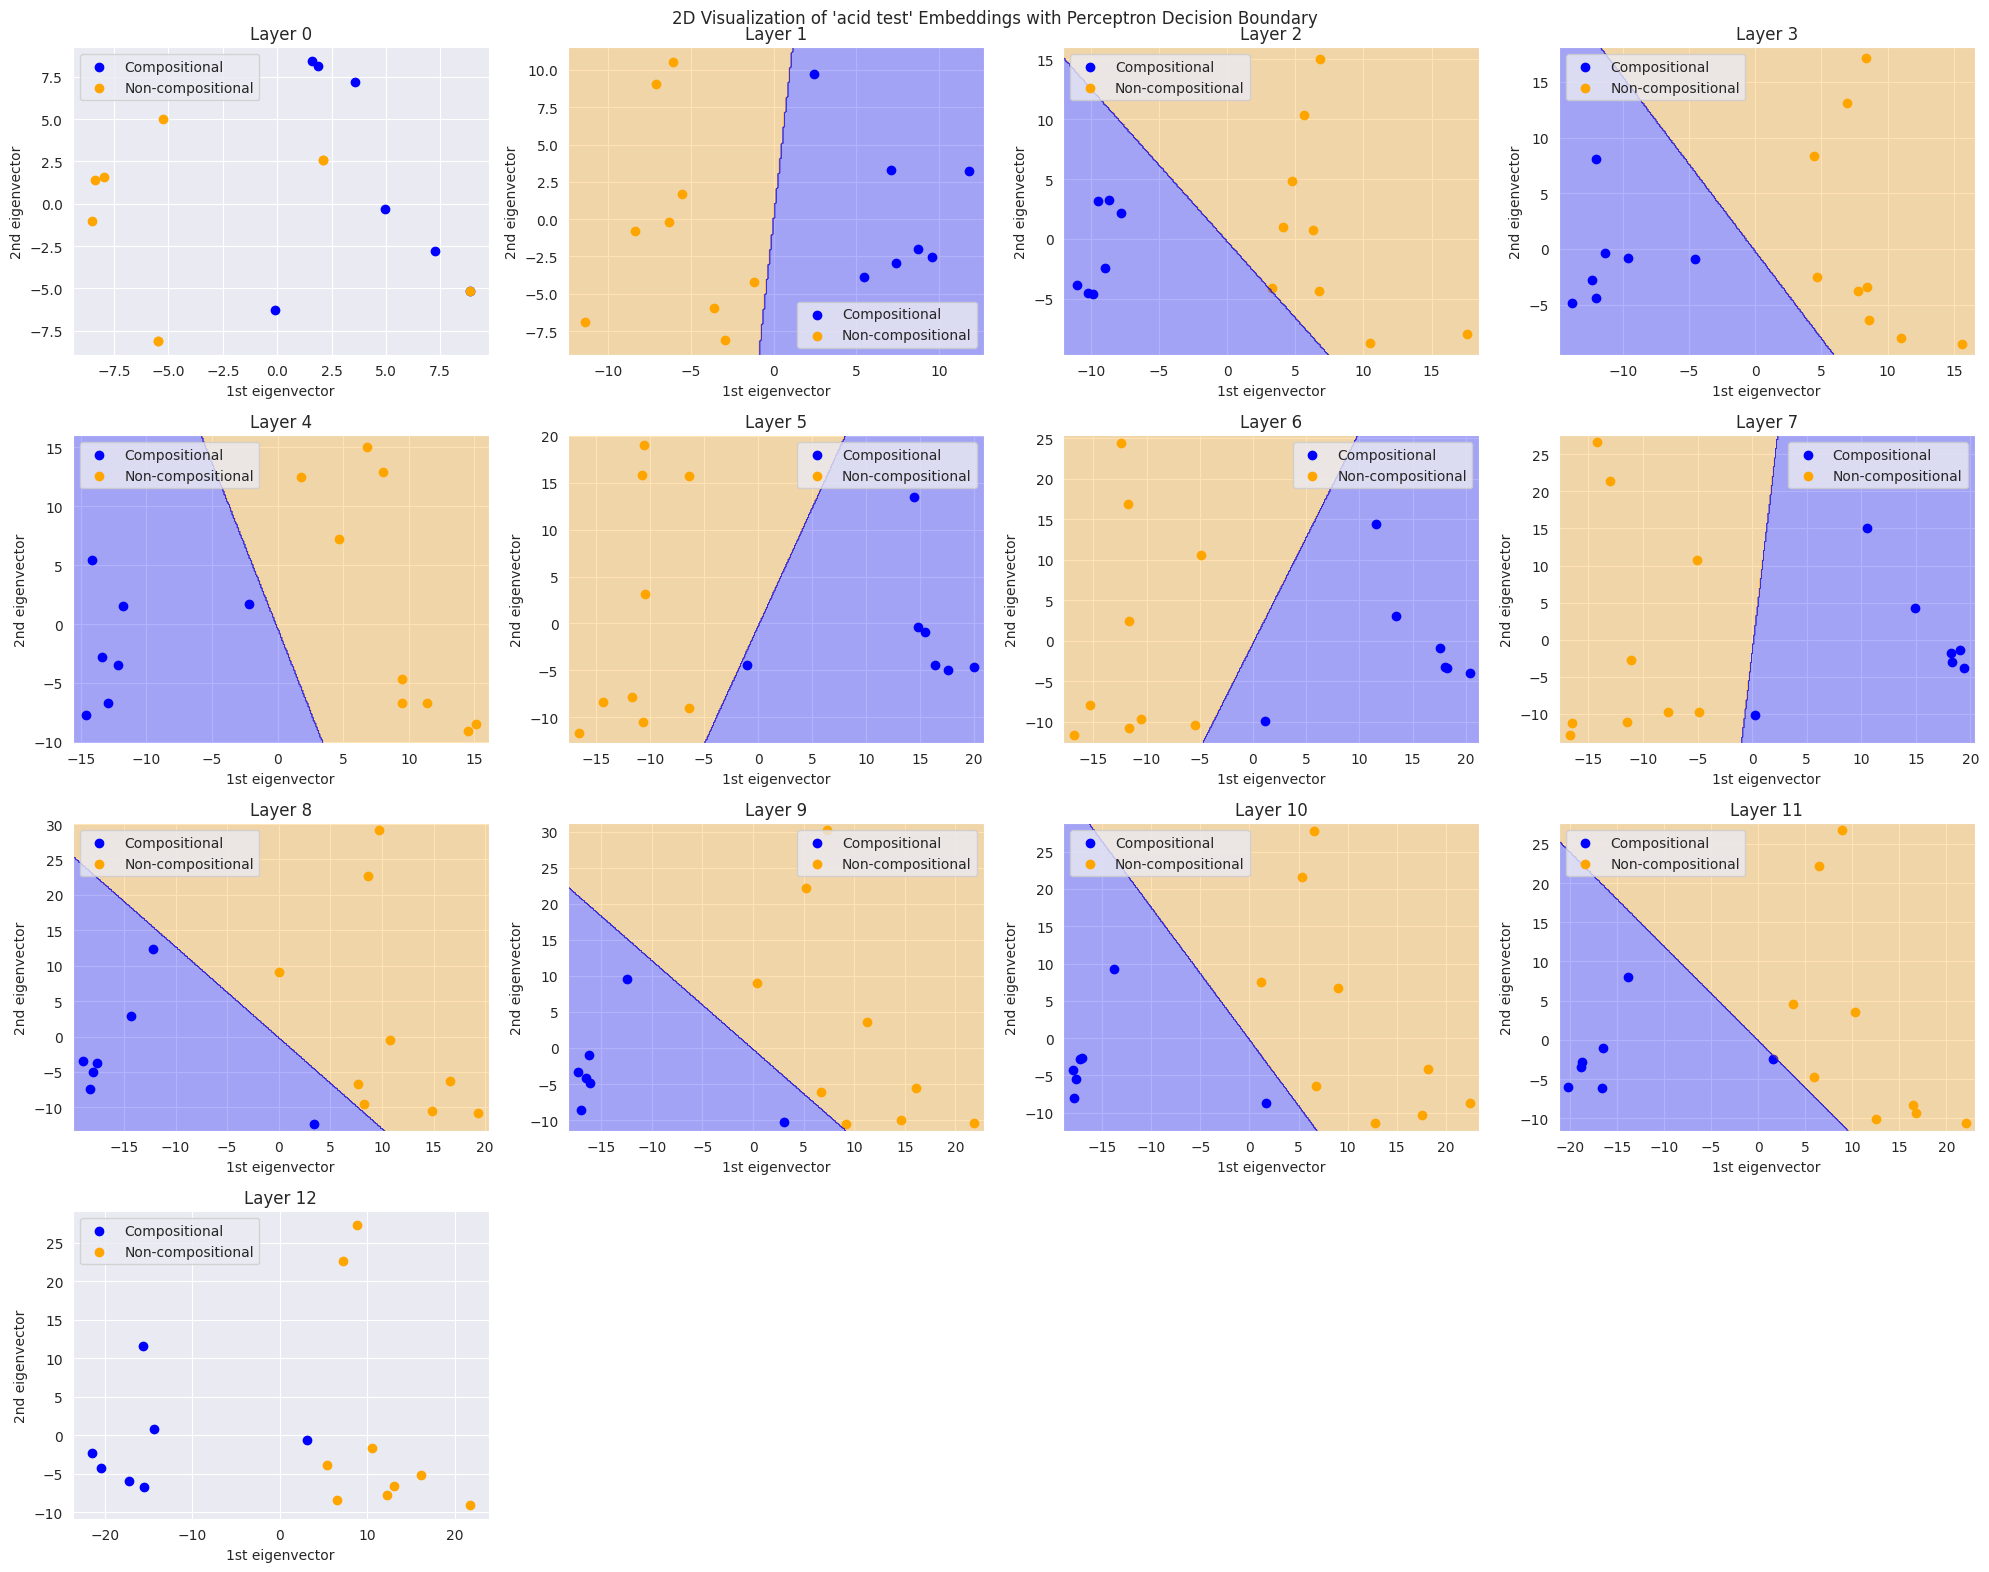

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

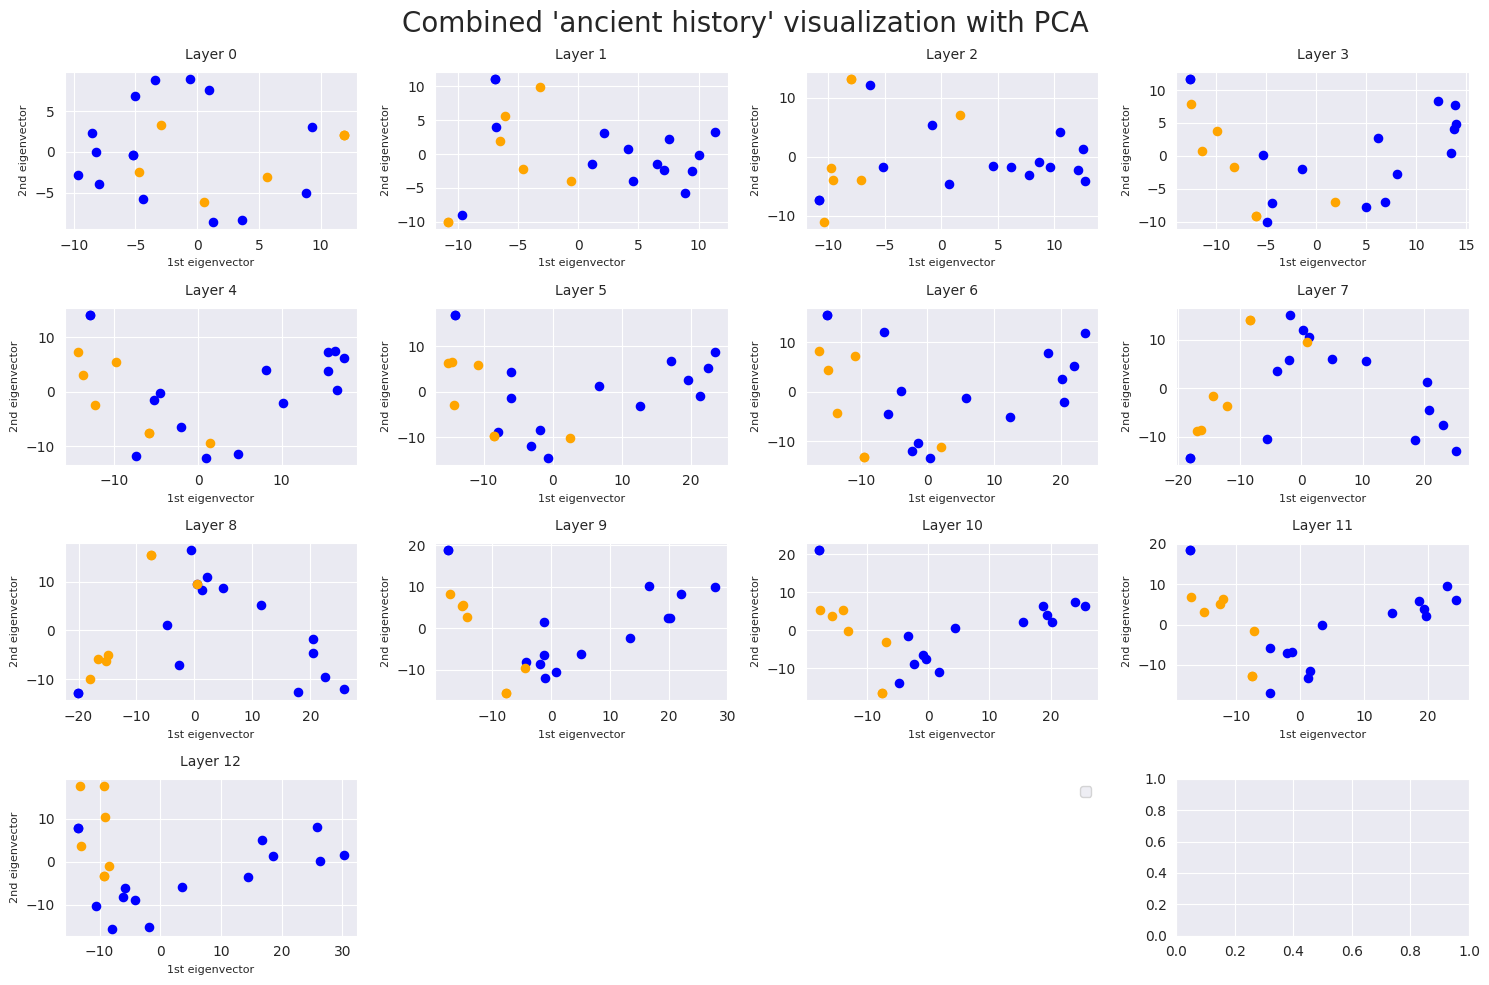

Layer 0
Training accuracy: 77.27% => data is not linearly separable.
Layer 1
Training accuracy: 77.27% => data is not linearly separable.
Layer 2
Training accuracy: 81.82% => data is not linearly separable.
Layer 3
Training accuracy: 68.18% => data is not linearly separable.
Layer 4
Training accuracy: 68.18% => data is not linearly separable.
Layer 5
Training accuracy: 68.18% => data is not linearly separable.
Layer 6
Training accuracy: 45.45% => data is not linearly separable.
Layer 7
Training accuracy: 45.45% => data is not linearly separable.
Layer 8
Training accuracy: 77.27% => data is not linearly separable.
Layer 9
Training accuracy: 59.09% => data is not linearly separable.
Layer 10
Training accuracy: 63.64% => data is not linearly separable.
Layer 11
Training accuracy: 90.91% => data is not linearly separable.
Layer 12
Training accuracy: 90.91% => data is not linearly separable.


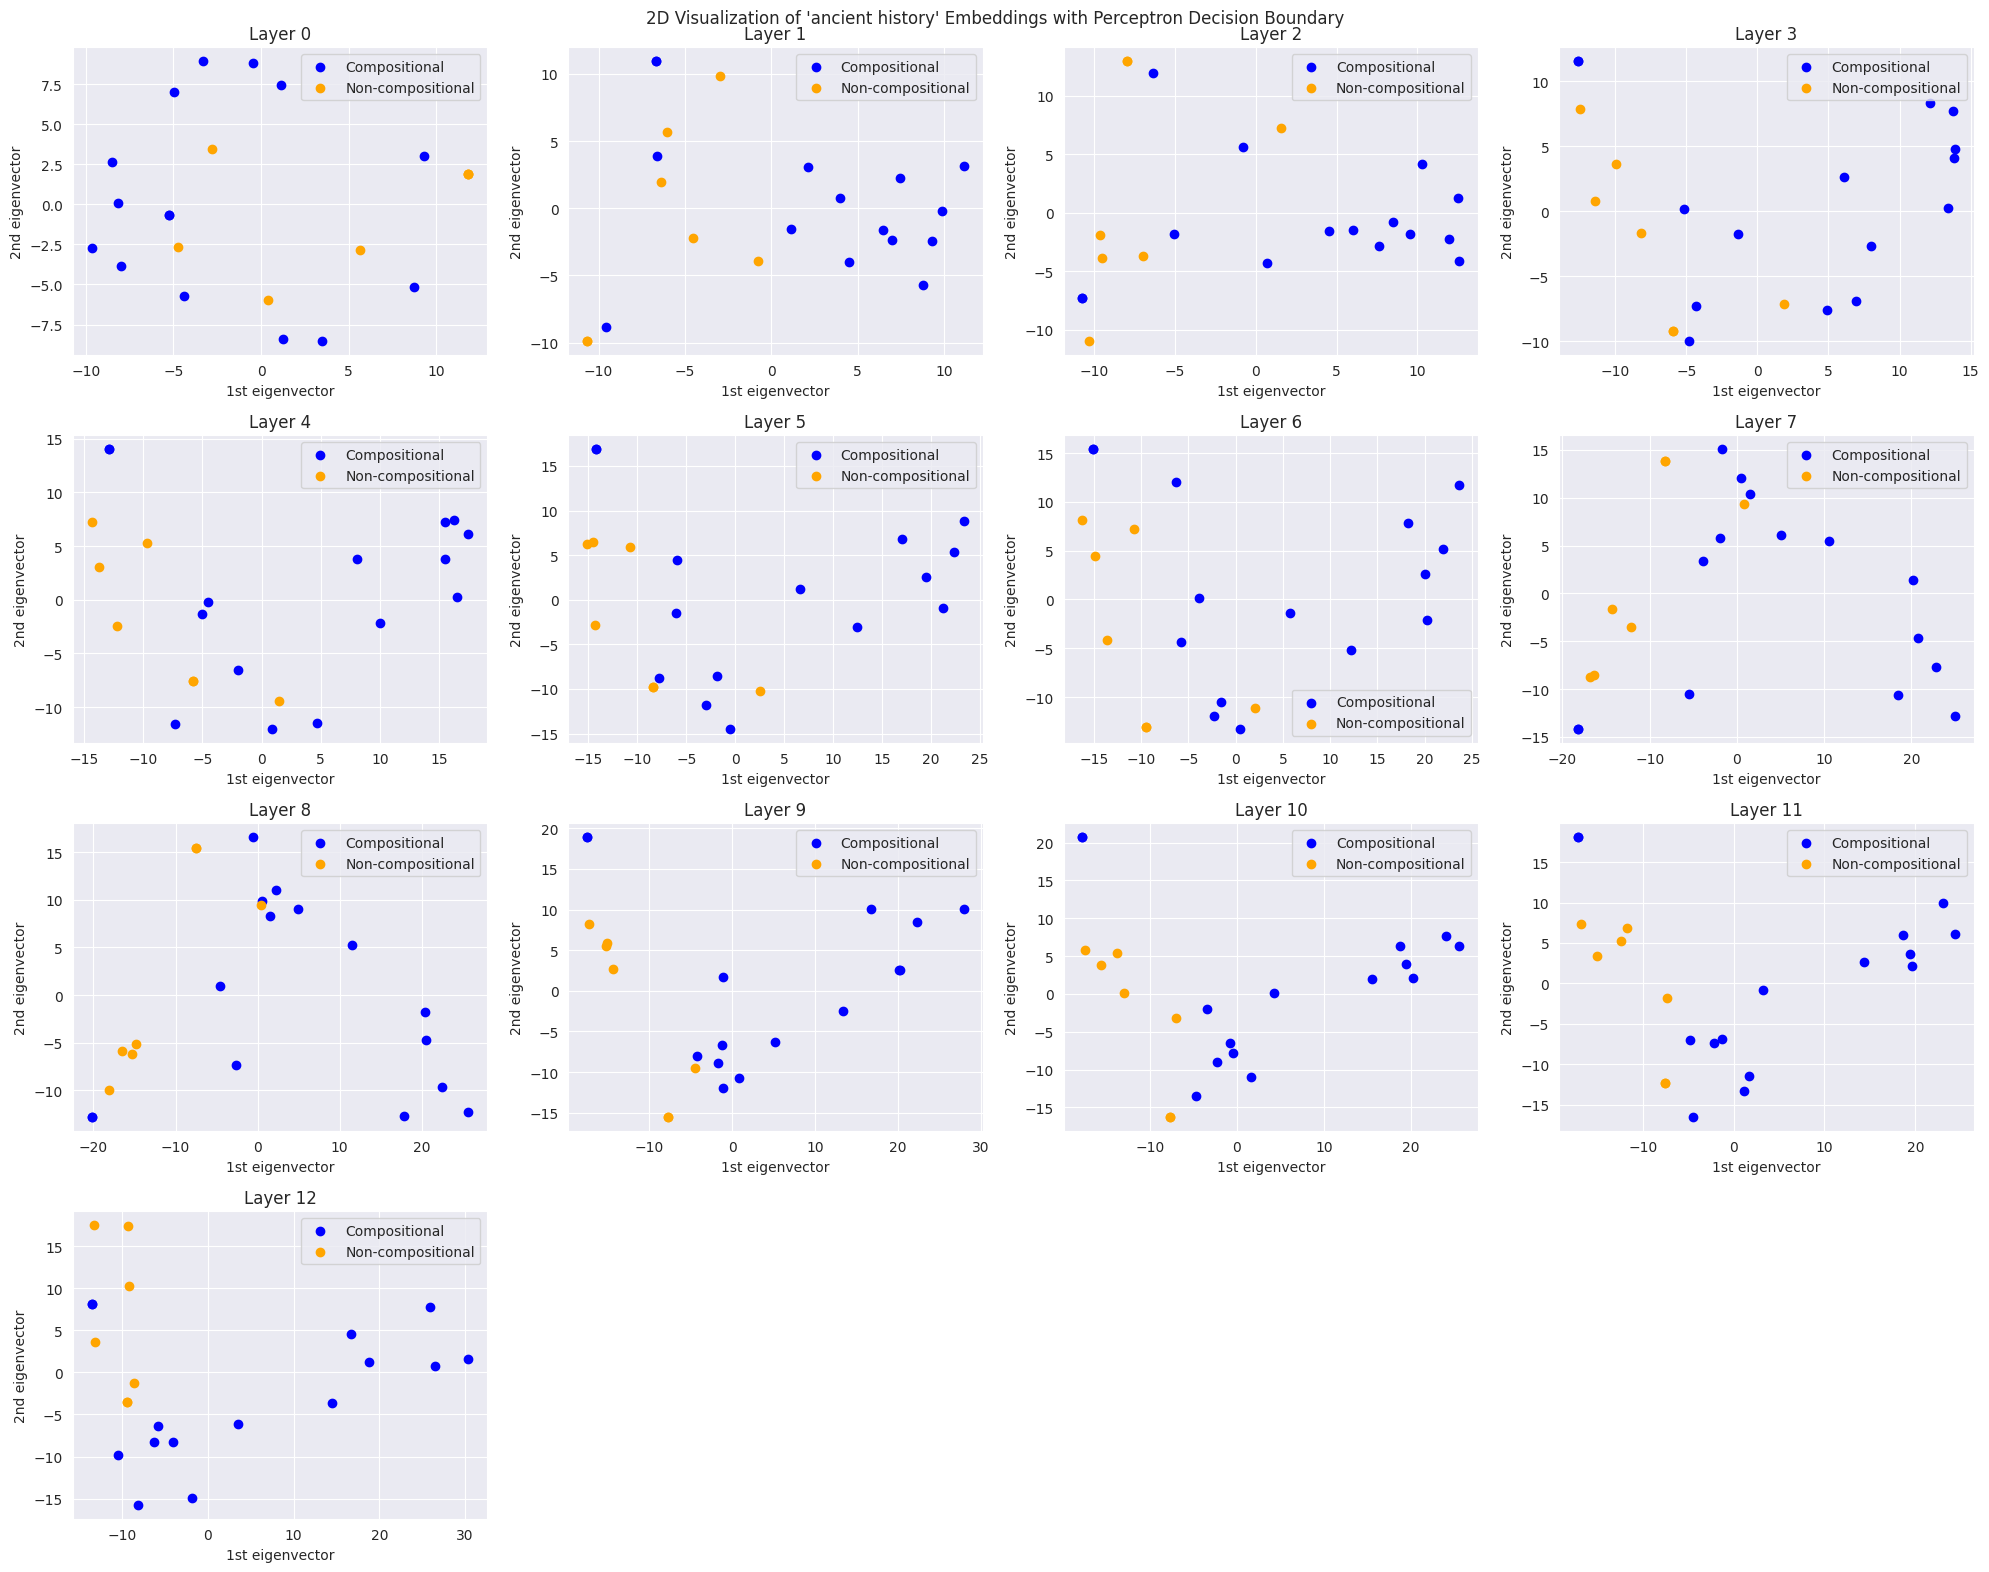

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

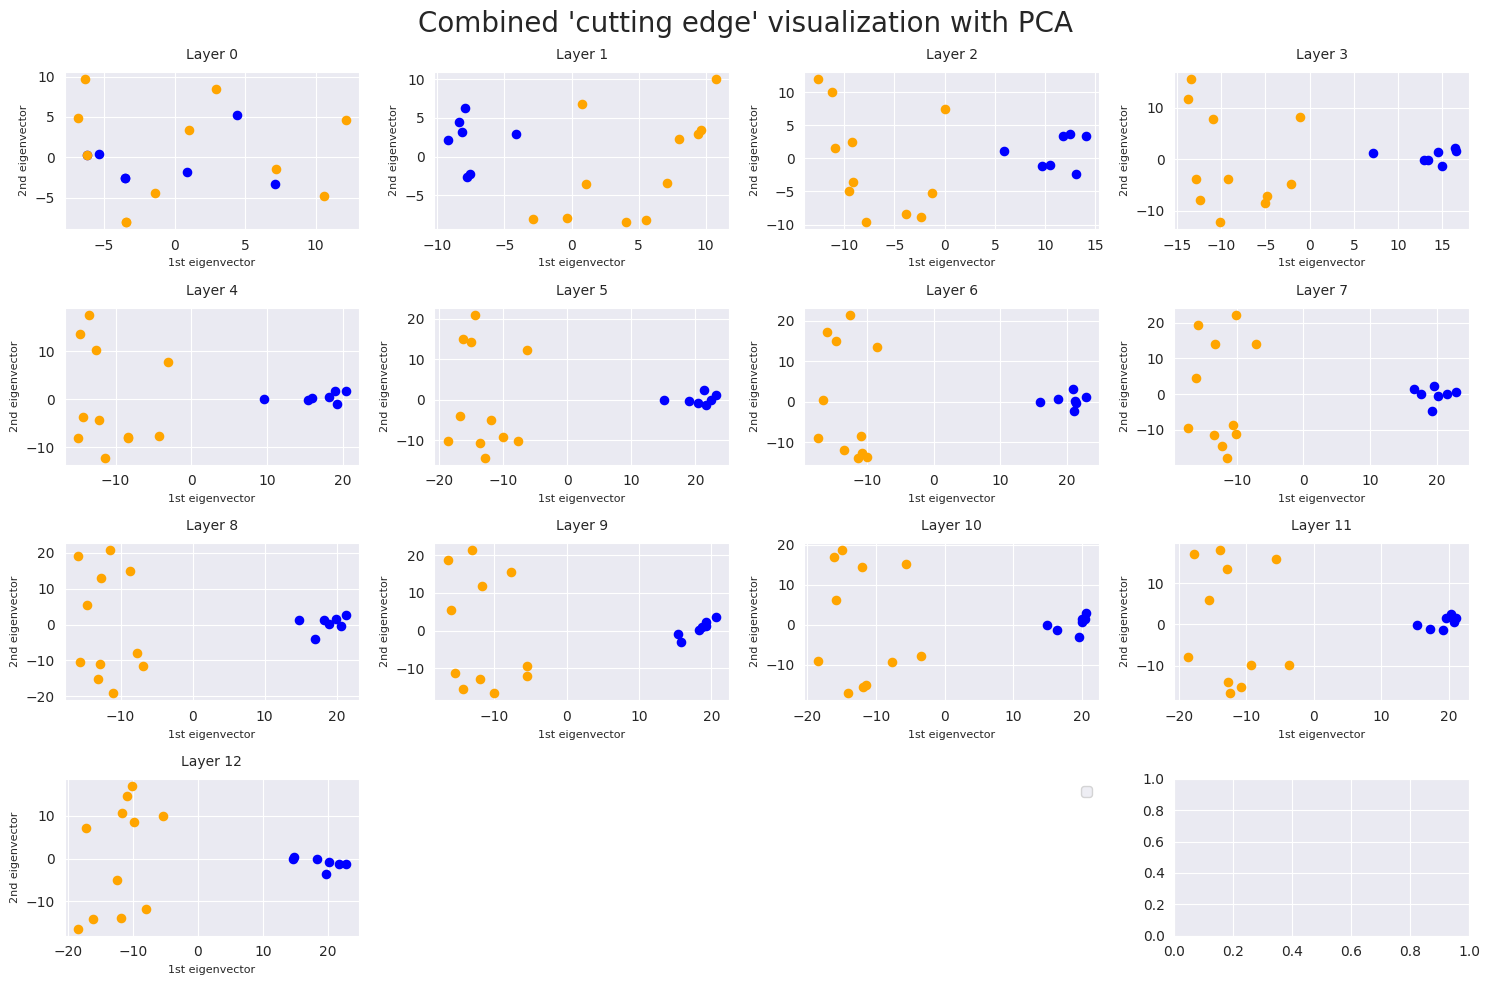

Layer 0
Training accuracy: 55.56% => data is not linearly separable.
Layer 1
Training accuracy: 100.00% => data is linearly separable.
Layer 2
Training accuracy: 100.00% => data is linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 100.00% => data is linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


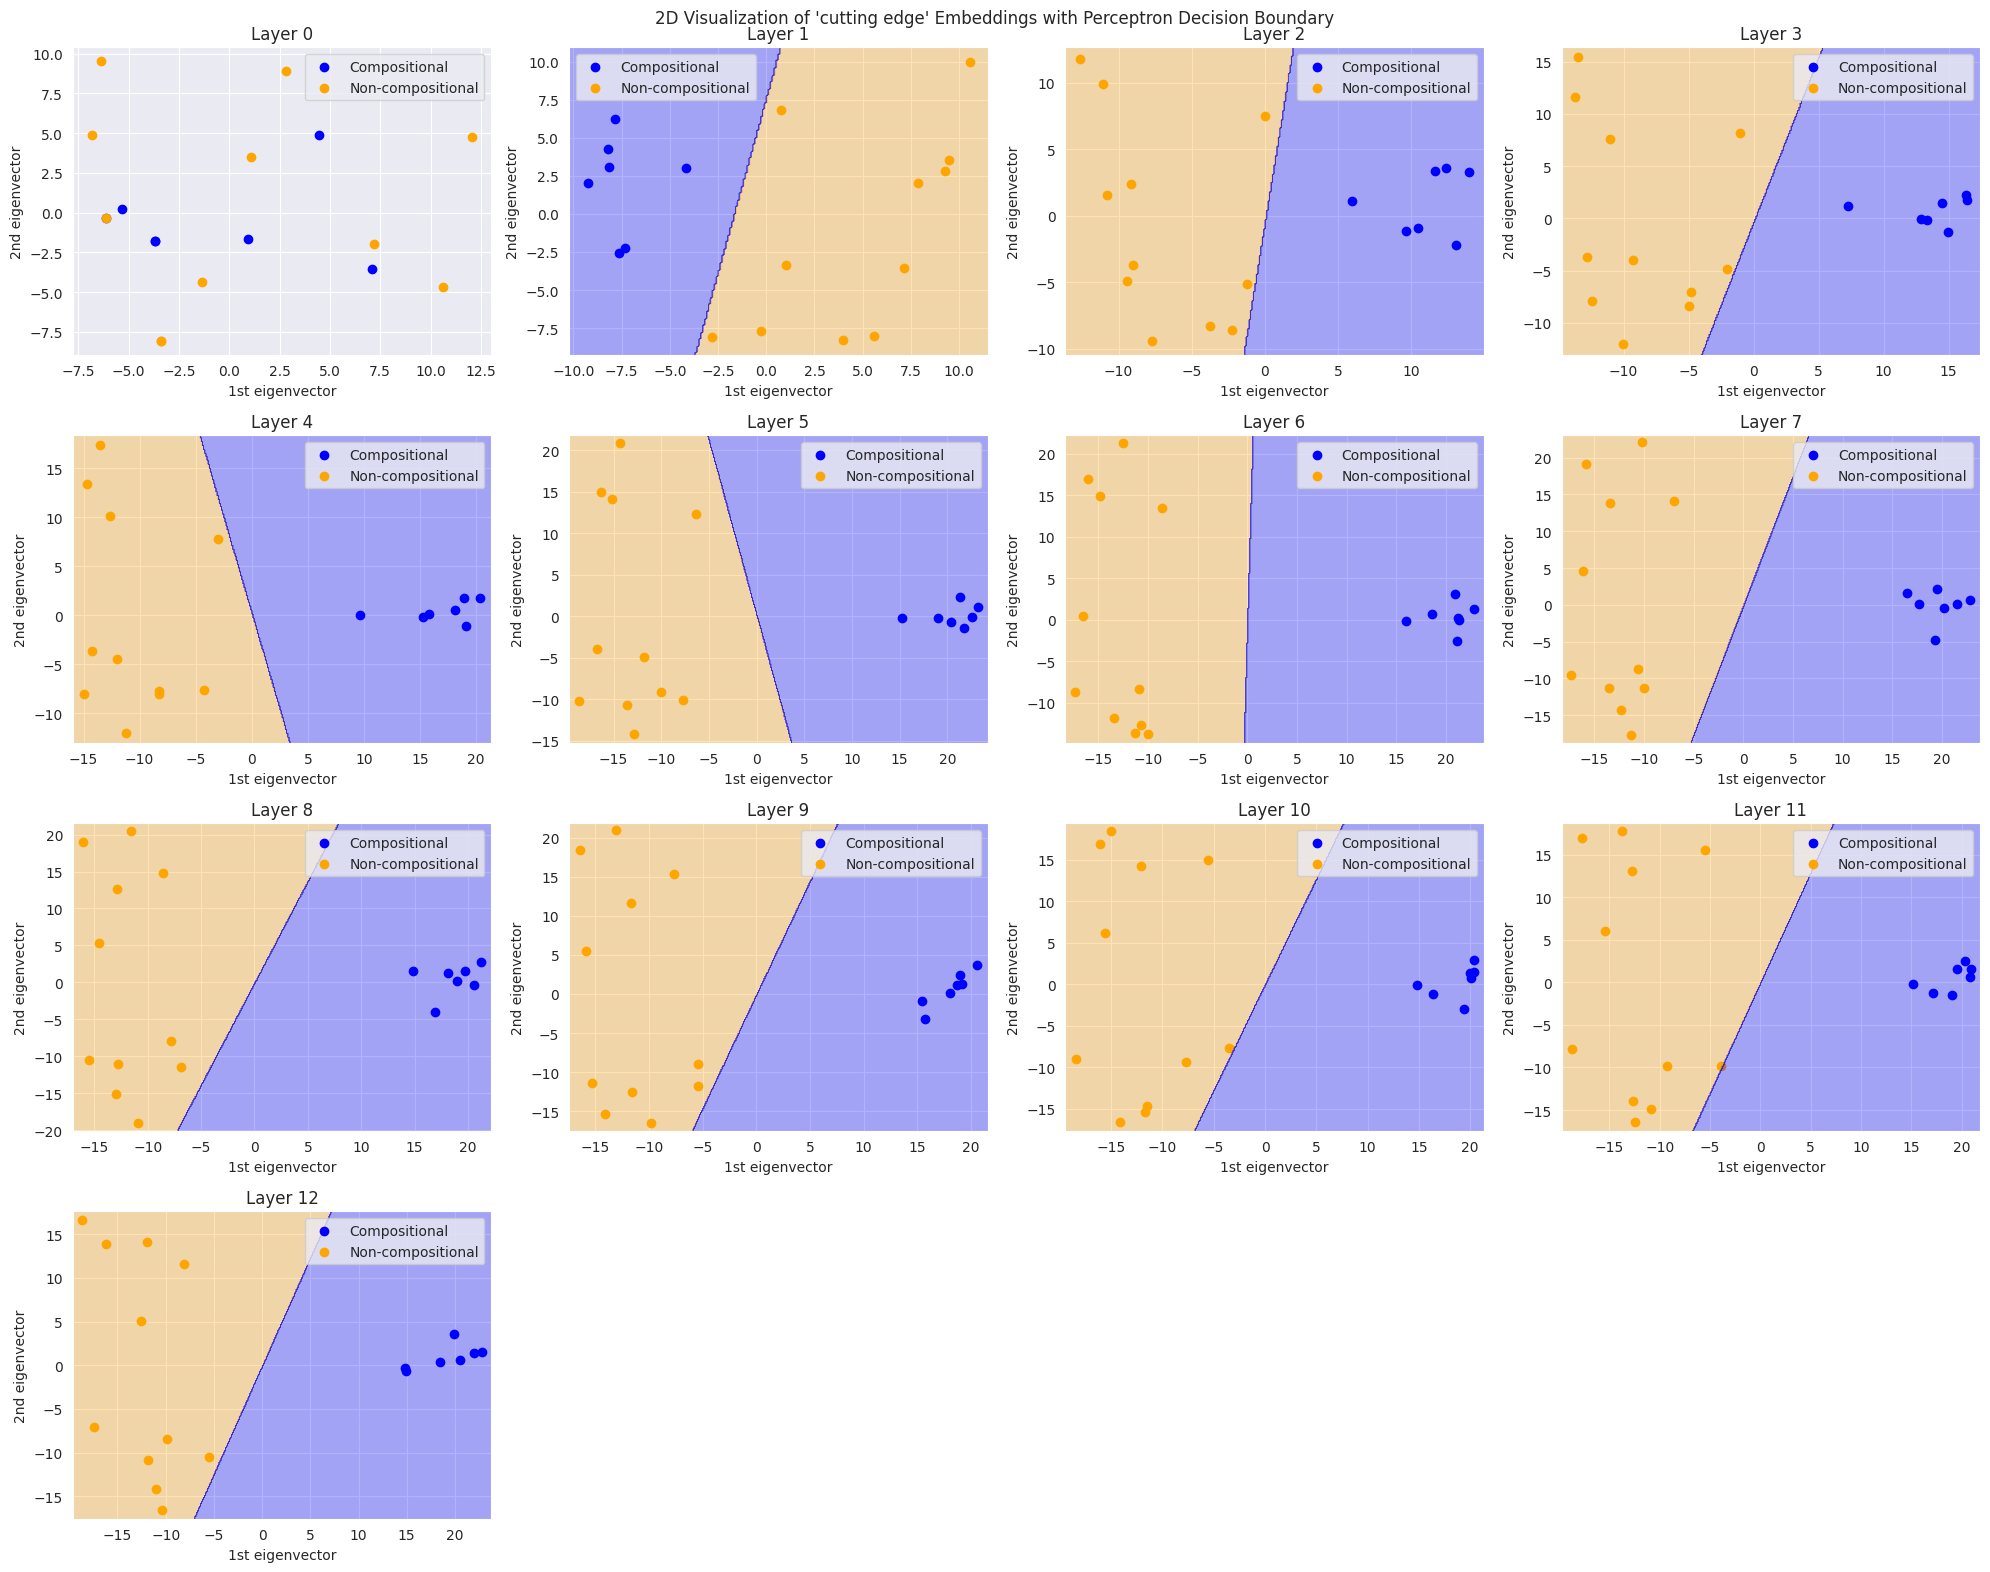

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

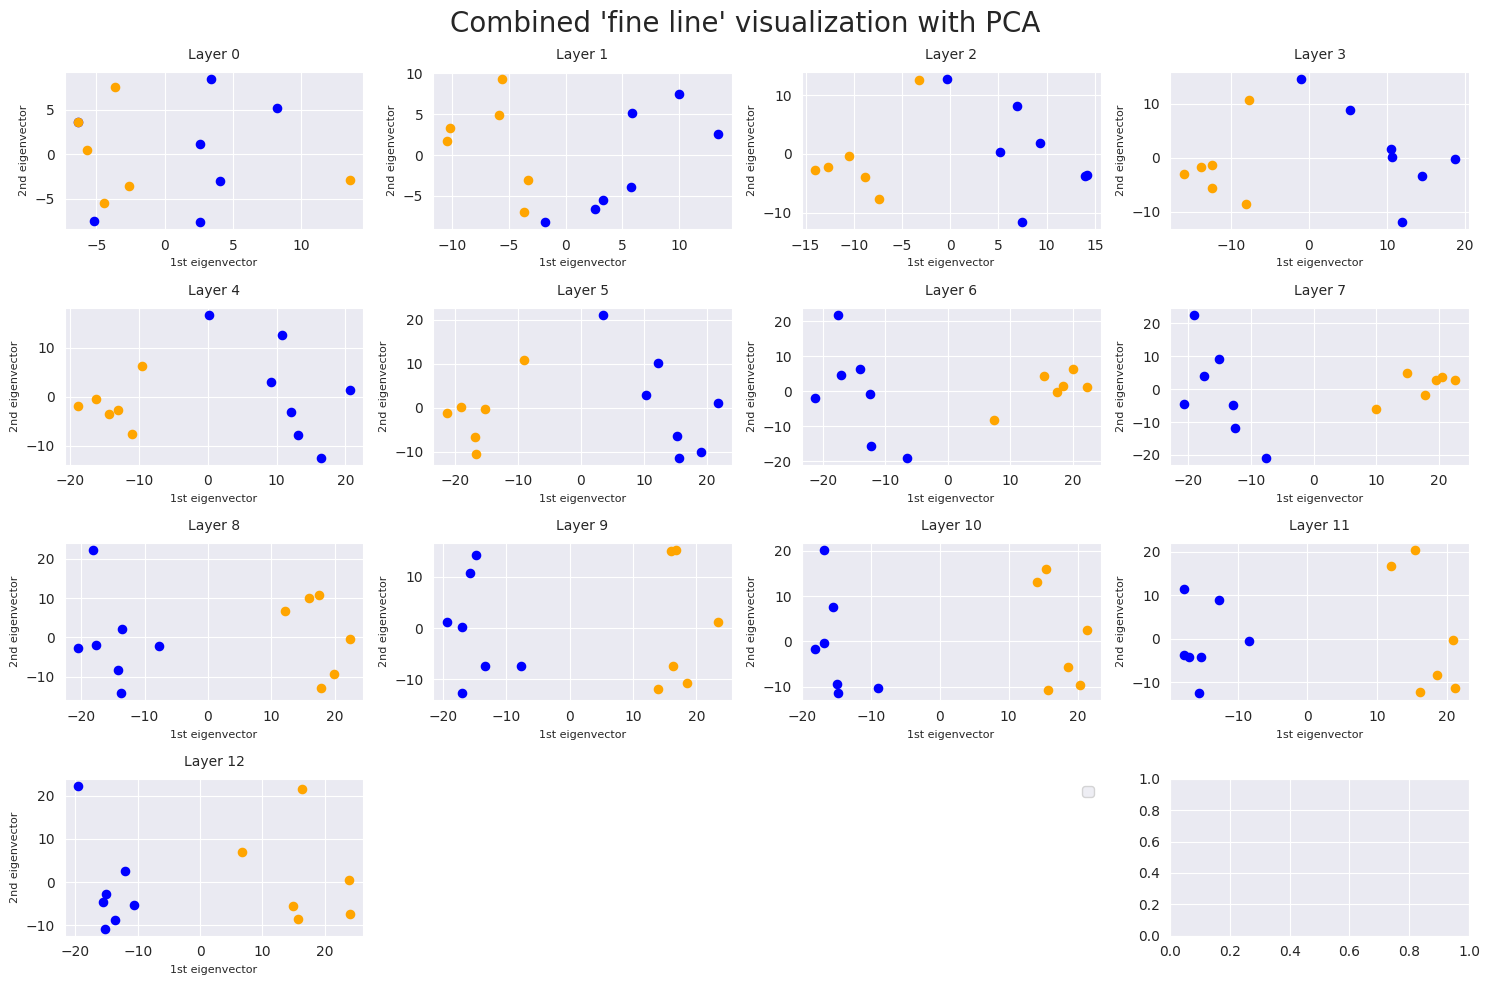

Layer 0
Training accuracy: 53.85% => data is not linearly separable.
Layer 1
Training accuracy: 100.00% => data is linearly separable.
Layer 2
Training accuracy: 92.31% => data is not linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 100.00% => data is linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


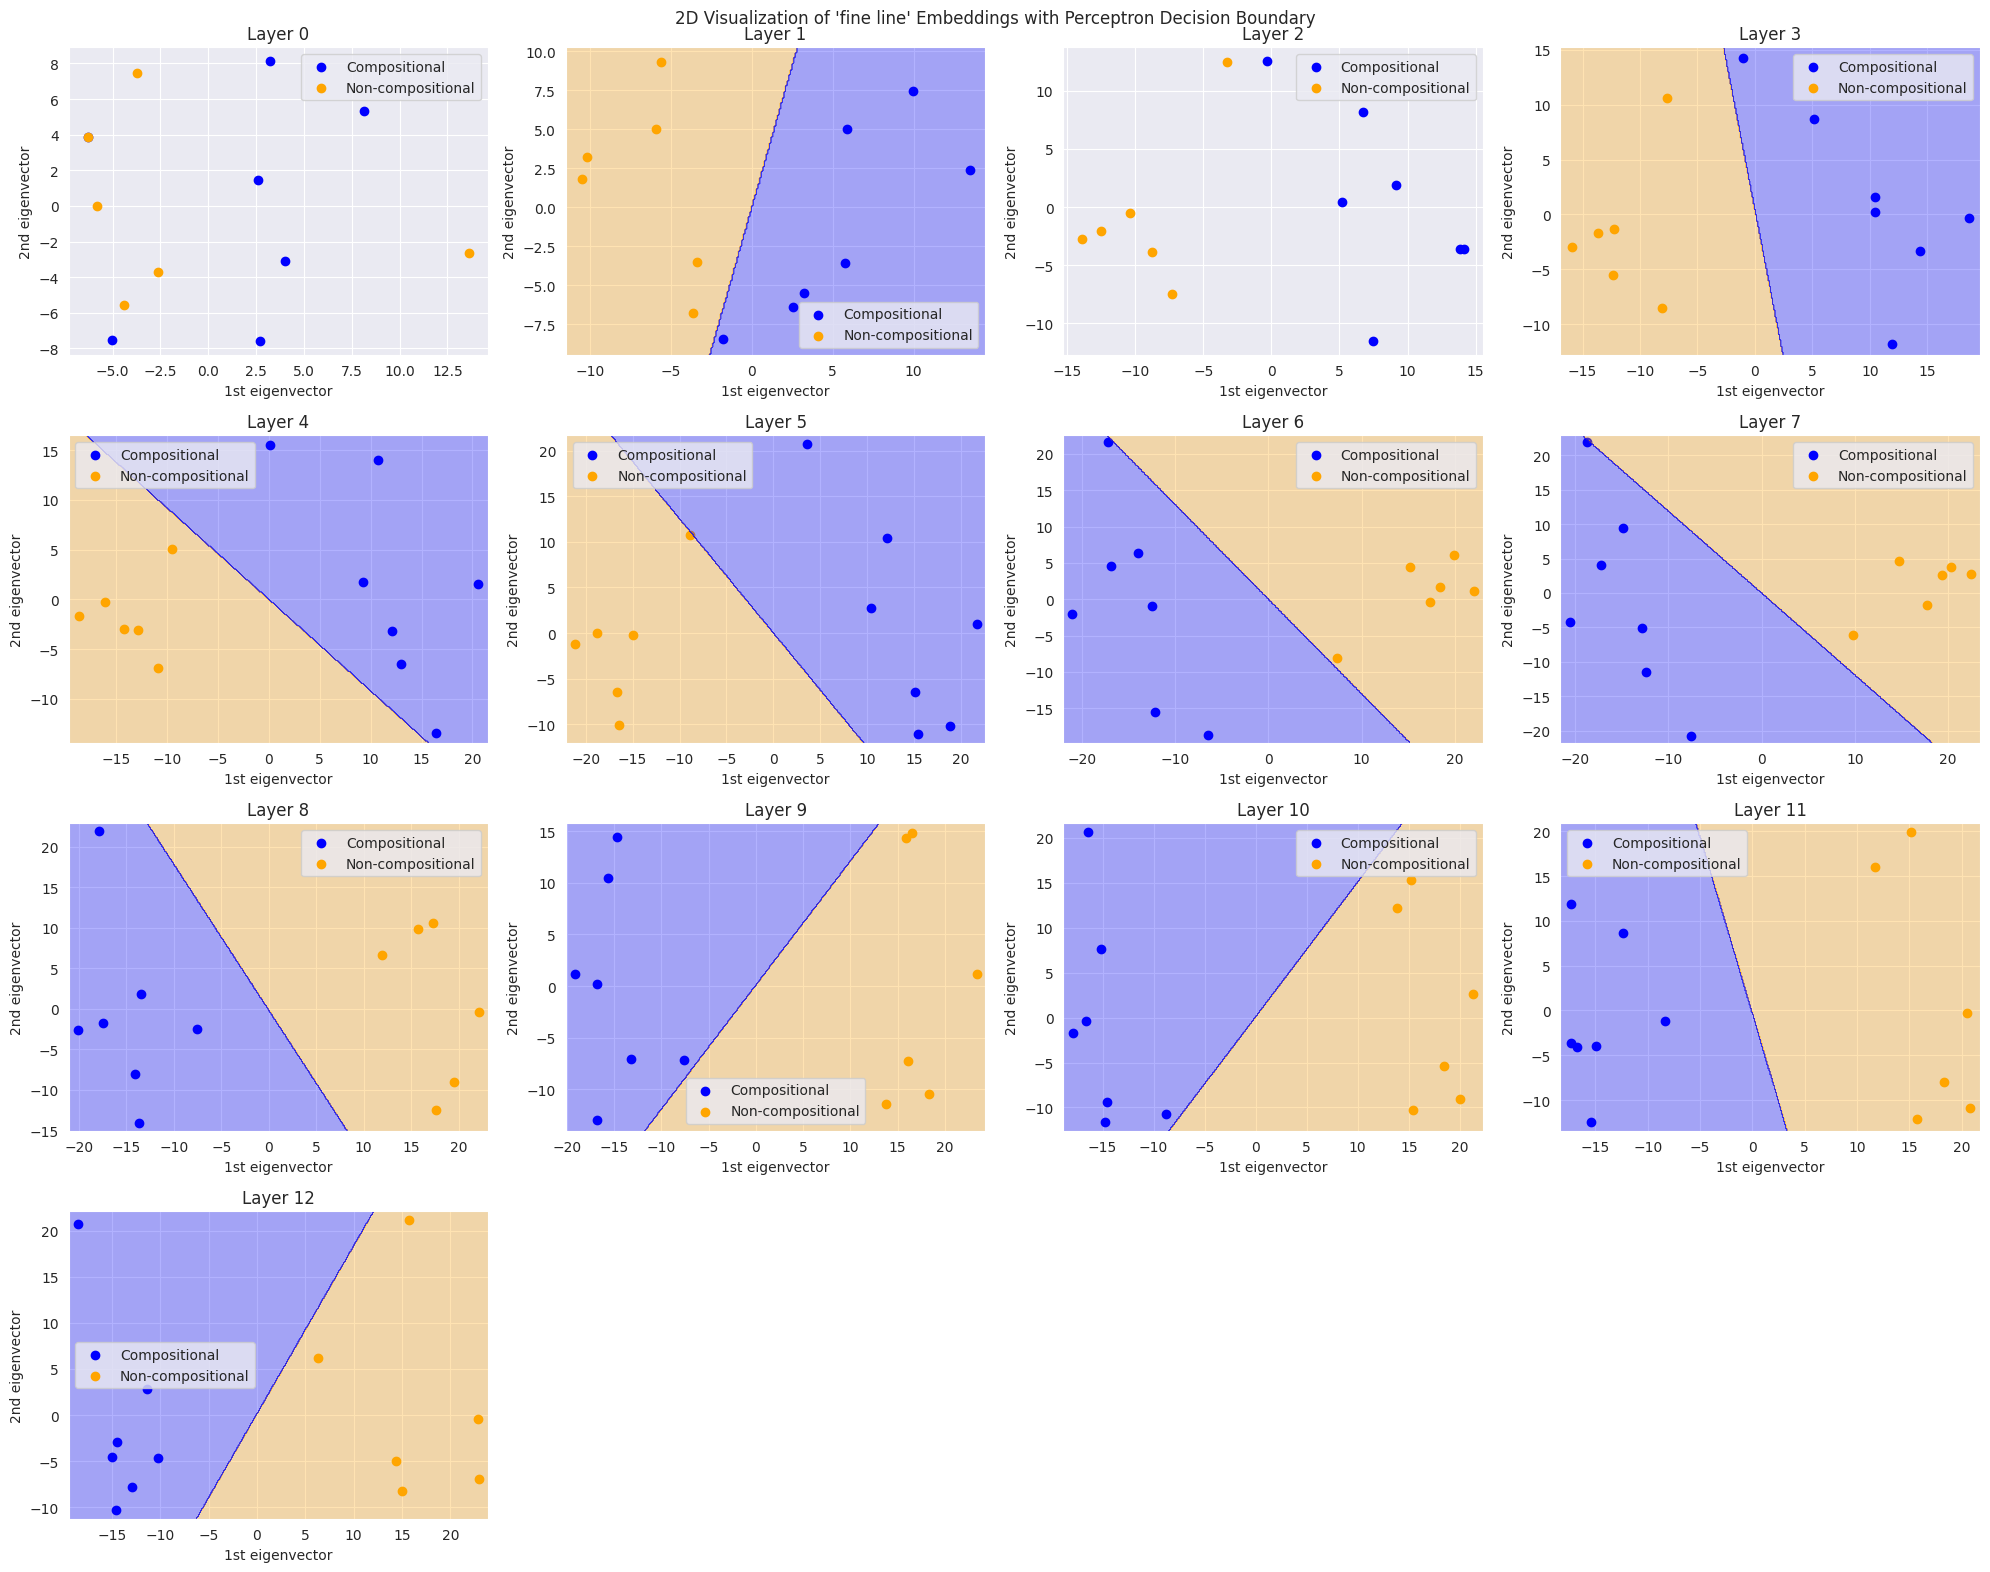

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

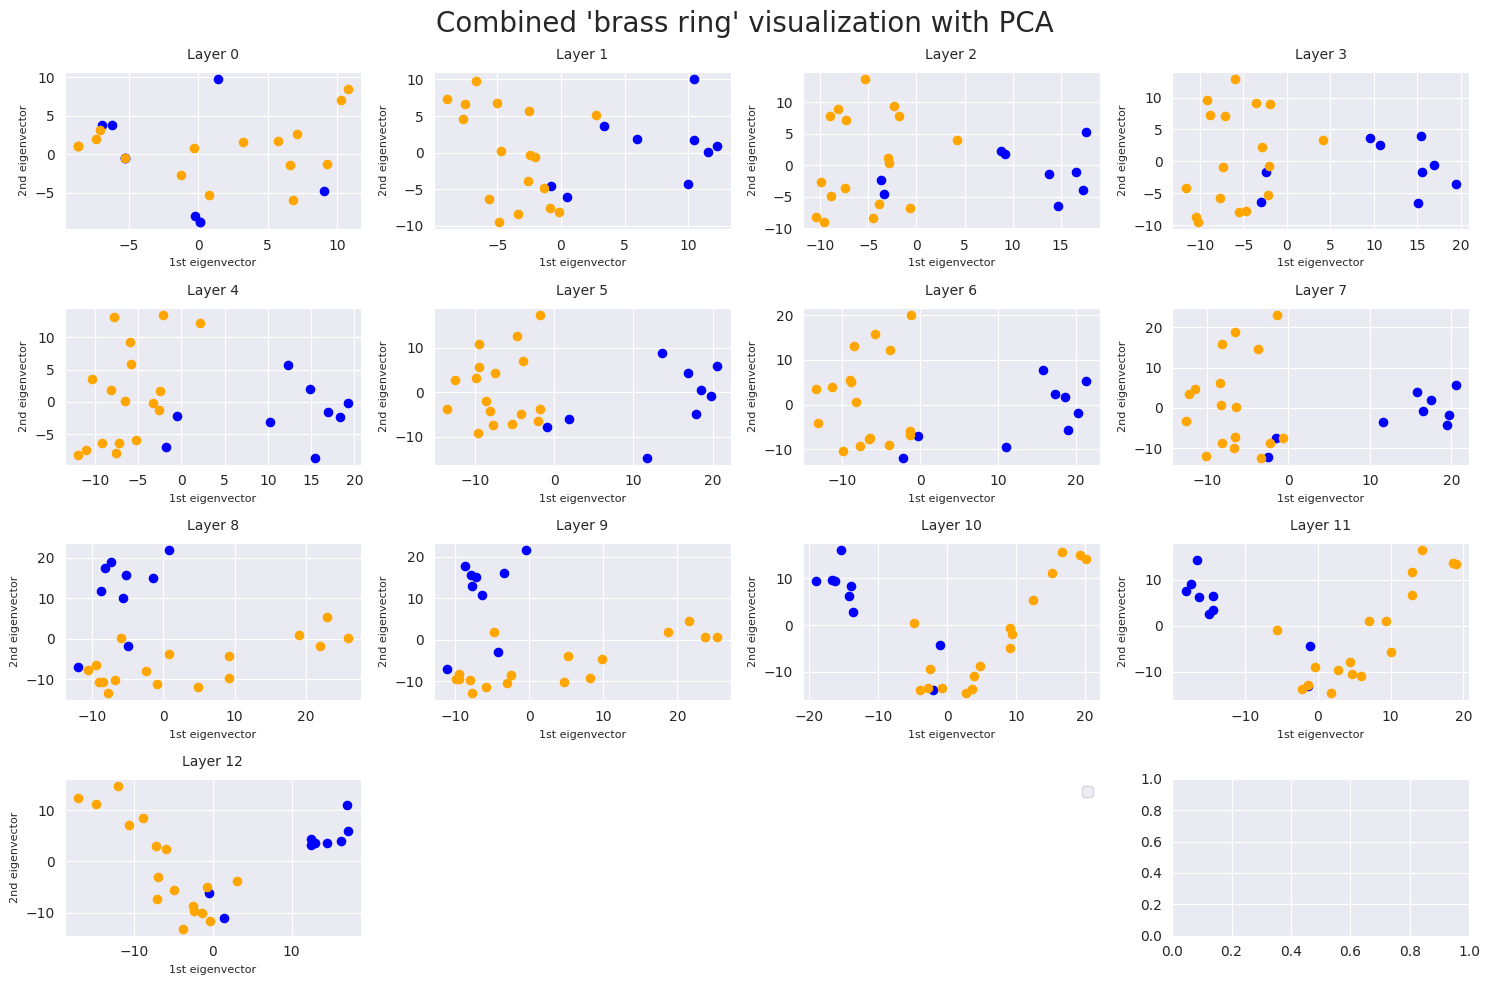

Layer 0
Training accuracy: 57.69% => data is not linearly separable.
Layer 1
Training accuracy: 92.31% => data is not linearly separable.
Layer 2
Training accuracy: 84.62% => data is not linearly separable.
Layer 3
Training accuracy: 76.92% => data is not linearly separable.
Layer 4
Training accuracy: 100.00% => data is linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 96.15% => data is not linearly separable.
Layer 7
Training accuracy: 92.31% => data is not linearly separable.
Layer 8
Training accuracy: 88.46% => data is not linearly separable.
Layer 9
Training accuracy: 88.46% => data is not linearly separable.
Layer 10
Training accuracy: 88.46% => data is not linearly separable.
Layer 11
Training accuracy: 80.77% => data is not linearly separable.
Layer 12
Training accuracy: 88.46% => data is not linearly separable.


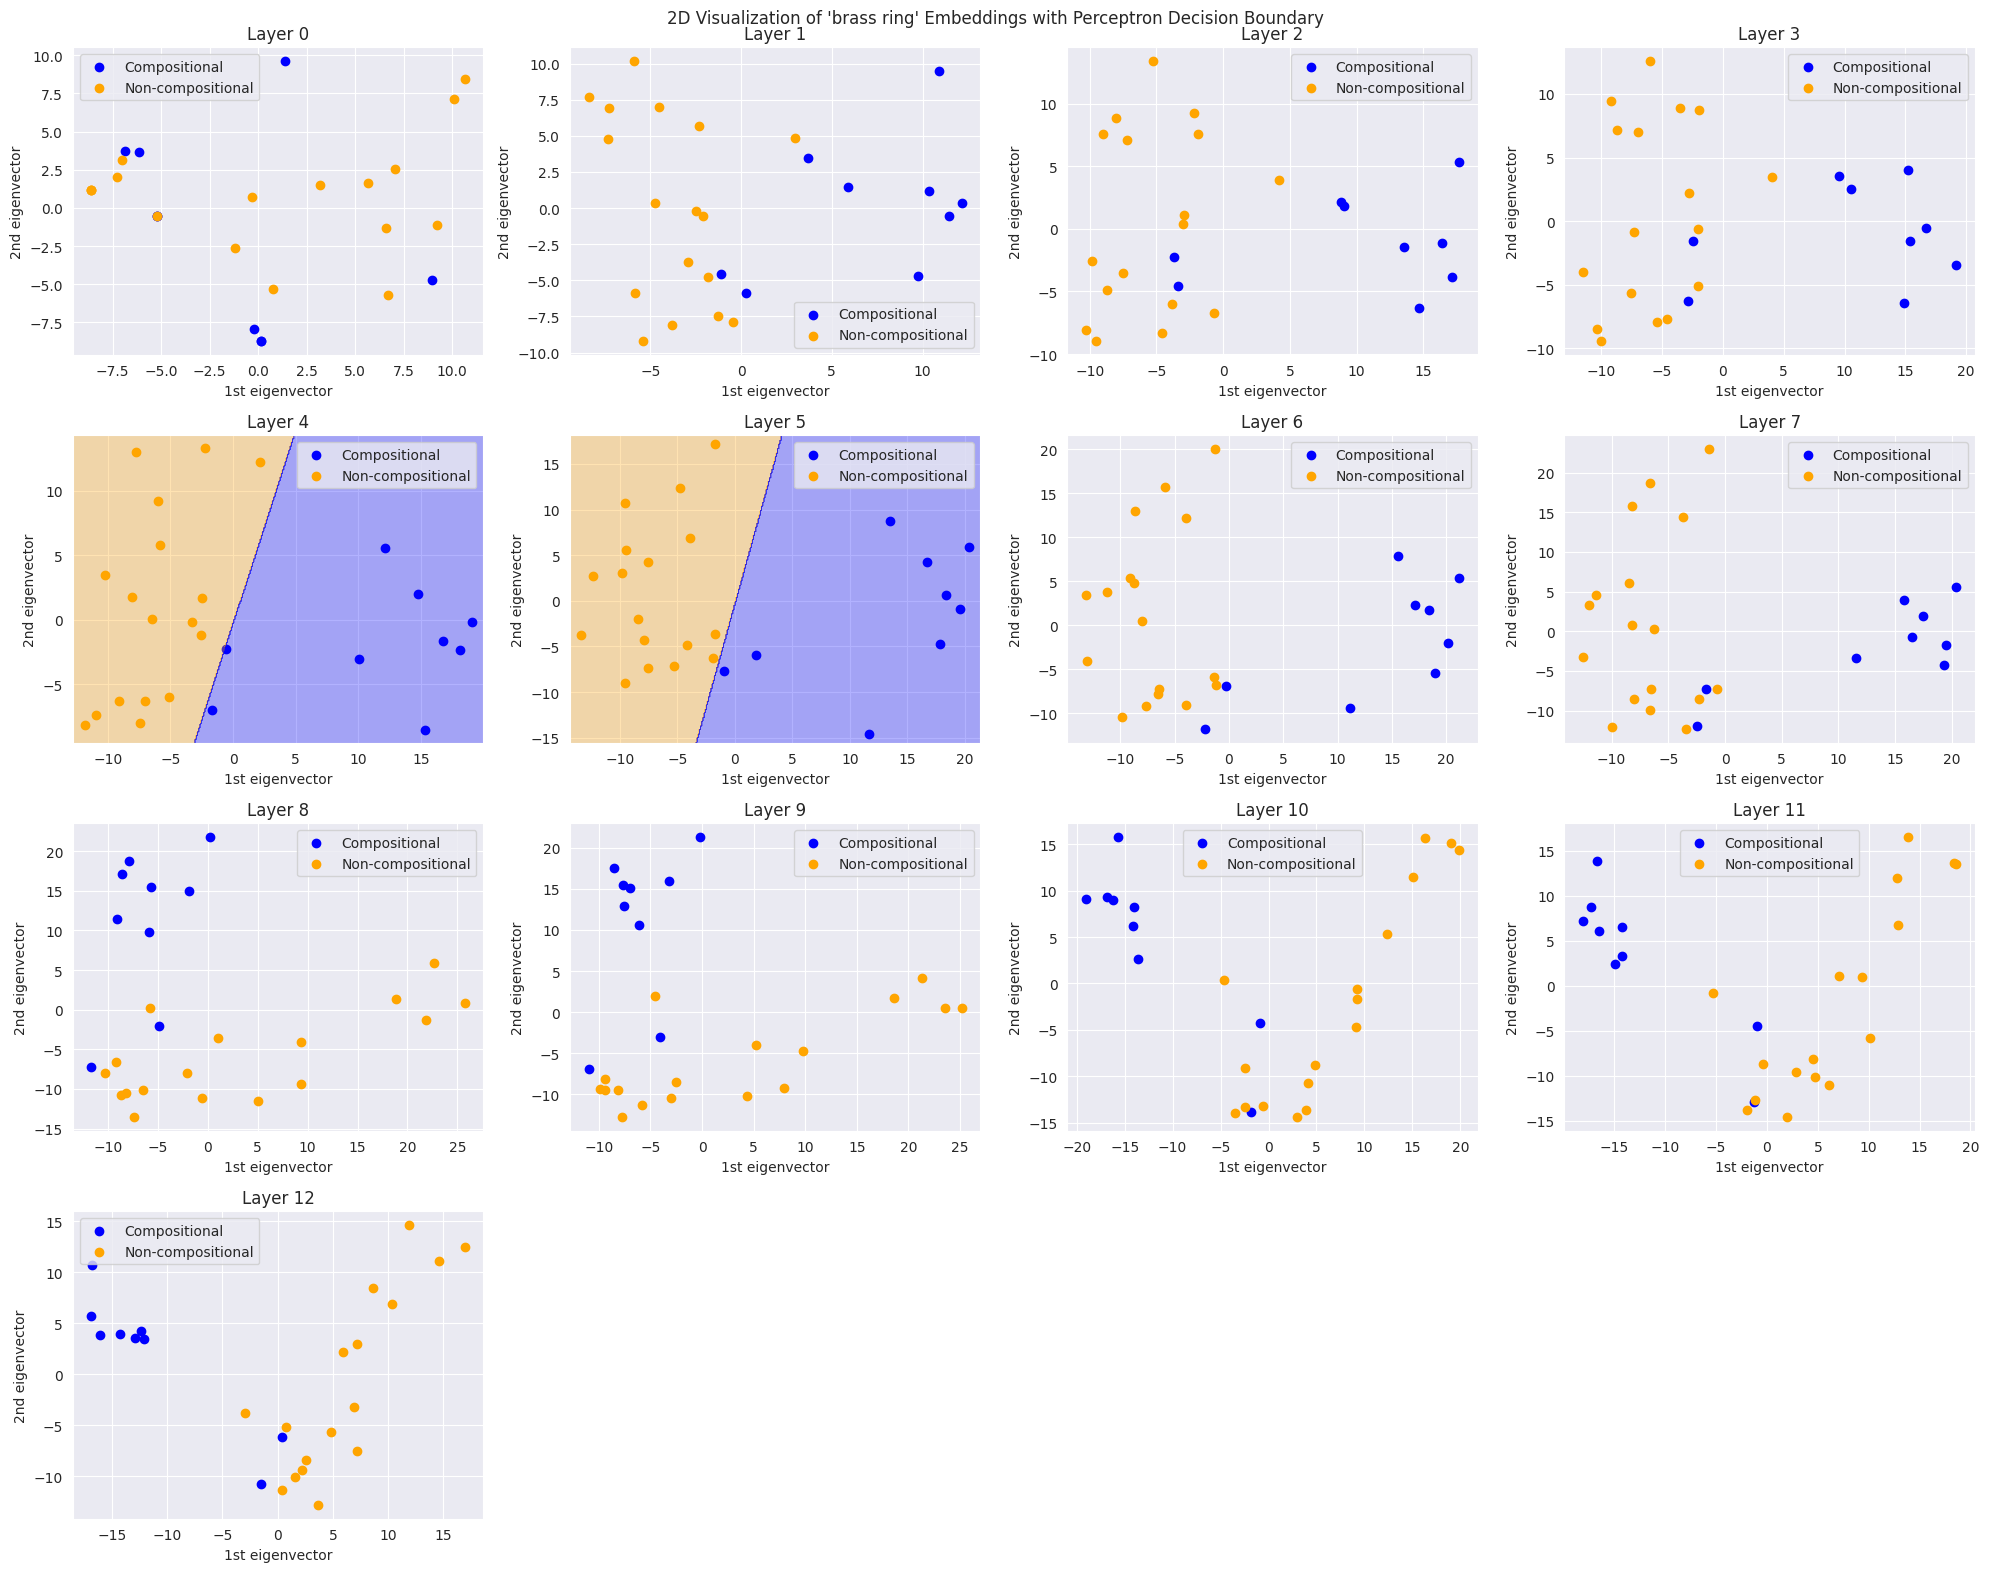

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

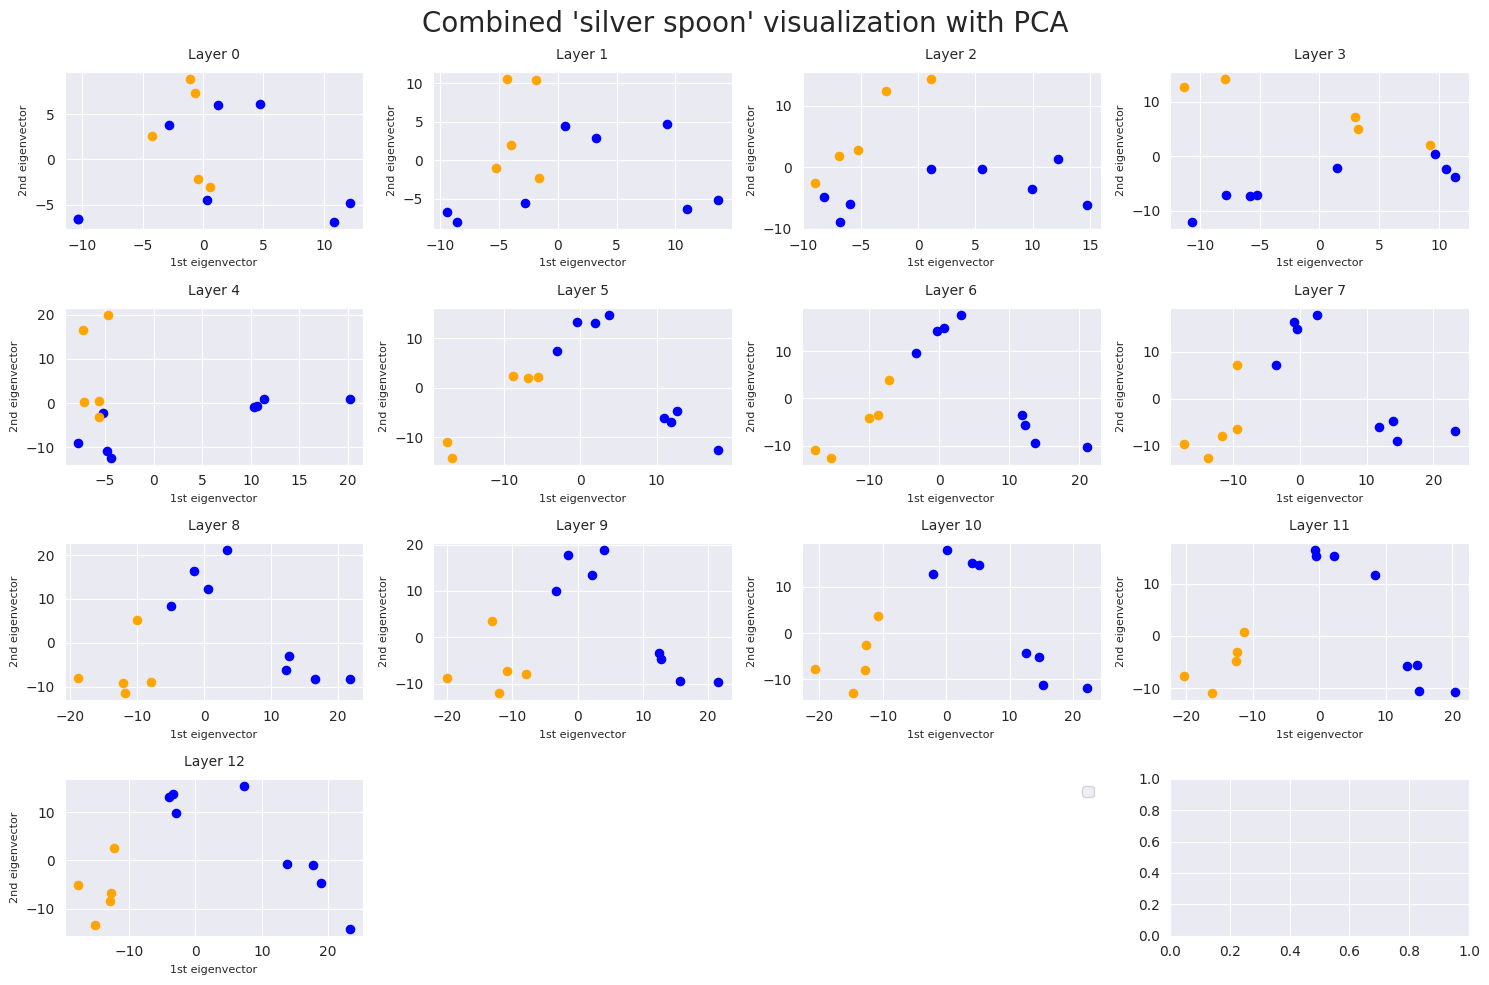

Layer 0
Training accuracy: 46.15% => data is not linearly separable.
Layer 1
Training accuracy: 84.62% => data is not linearly separable.
Layer 2
Training accuracy: 100.00% => data is linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 92.31% => data is not linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


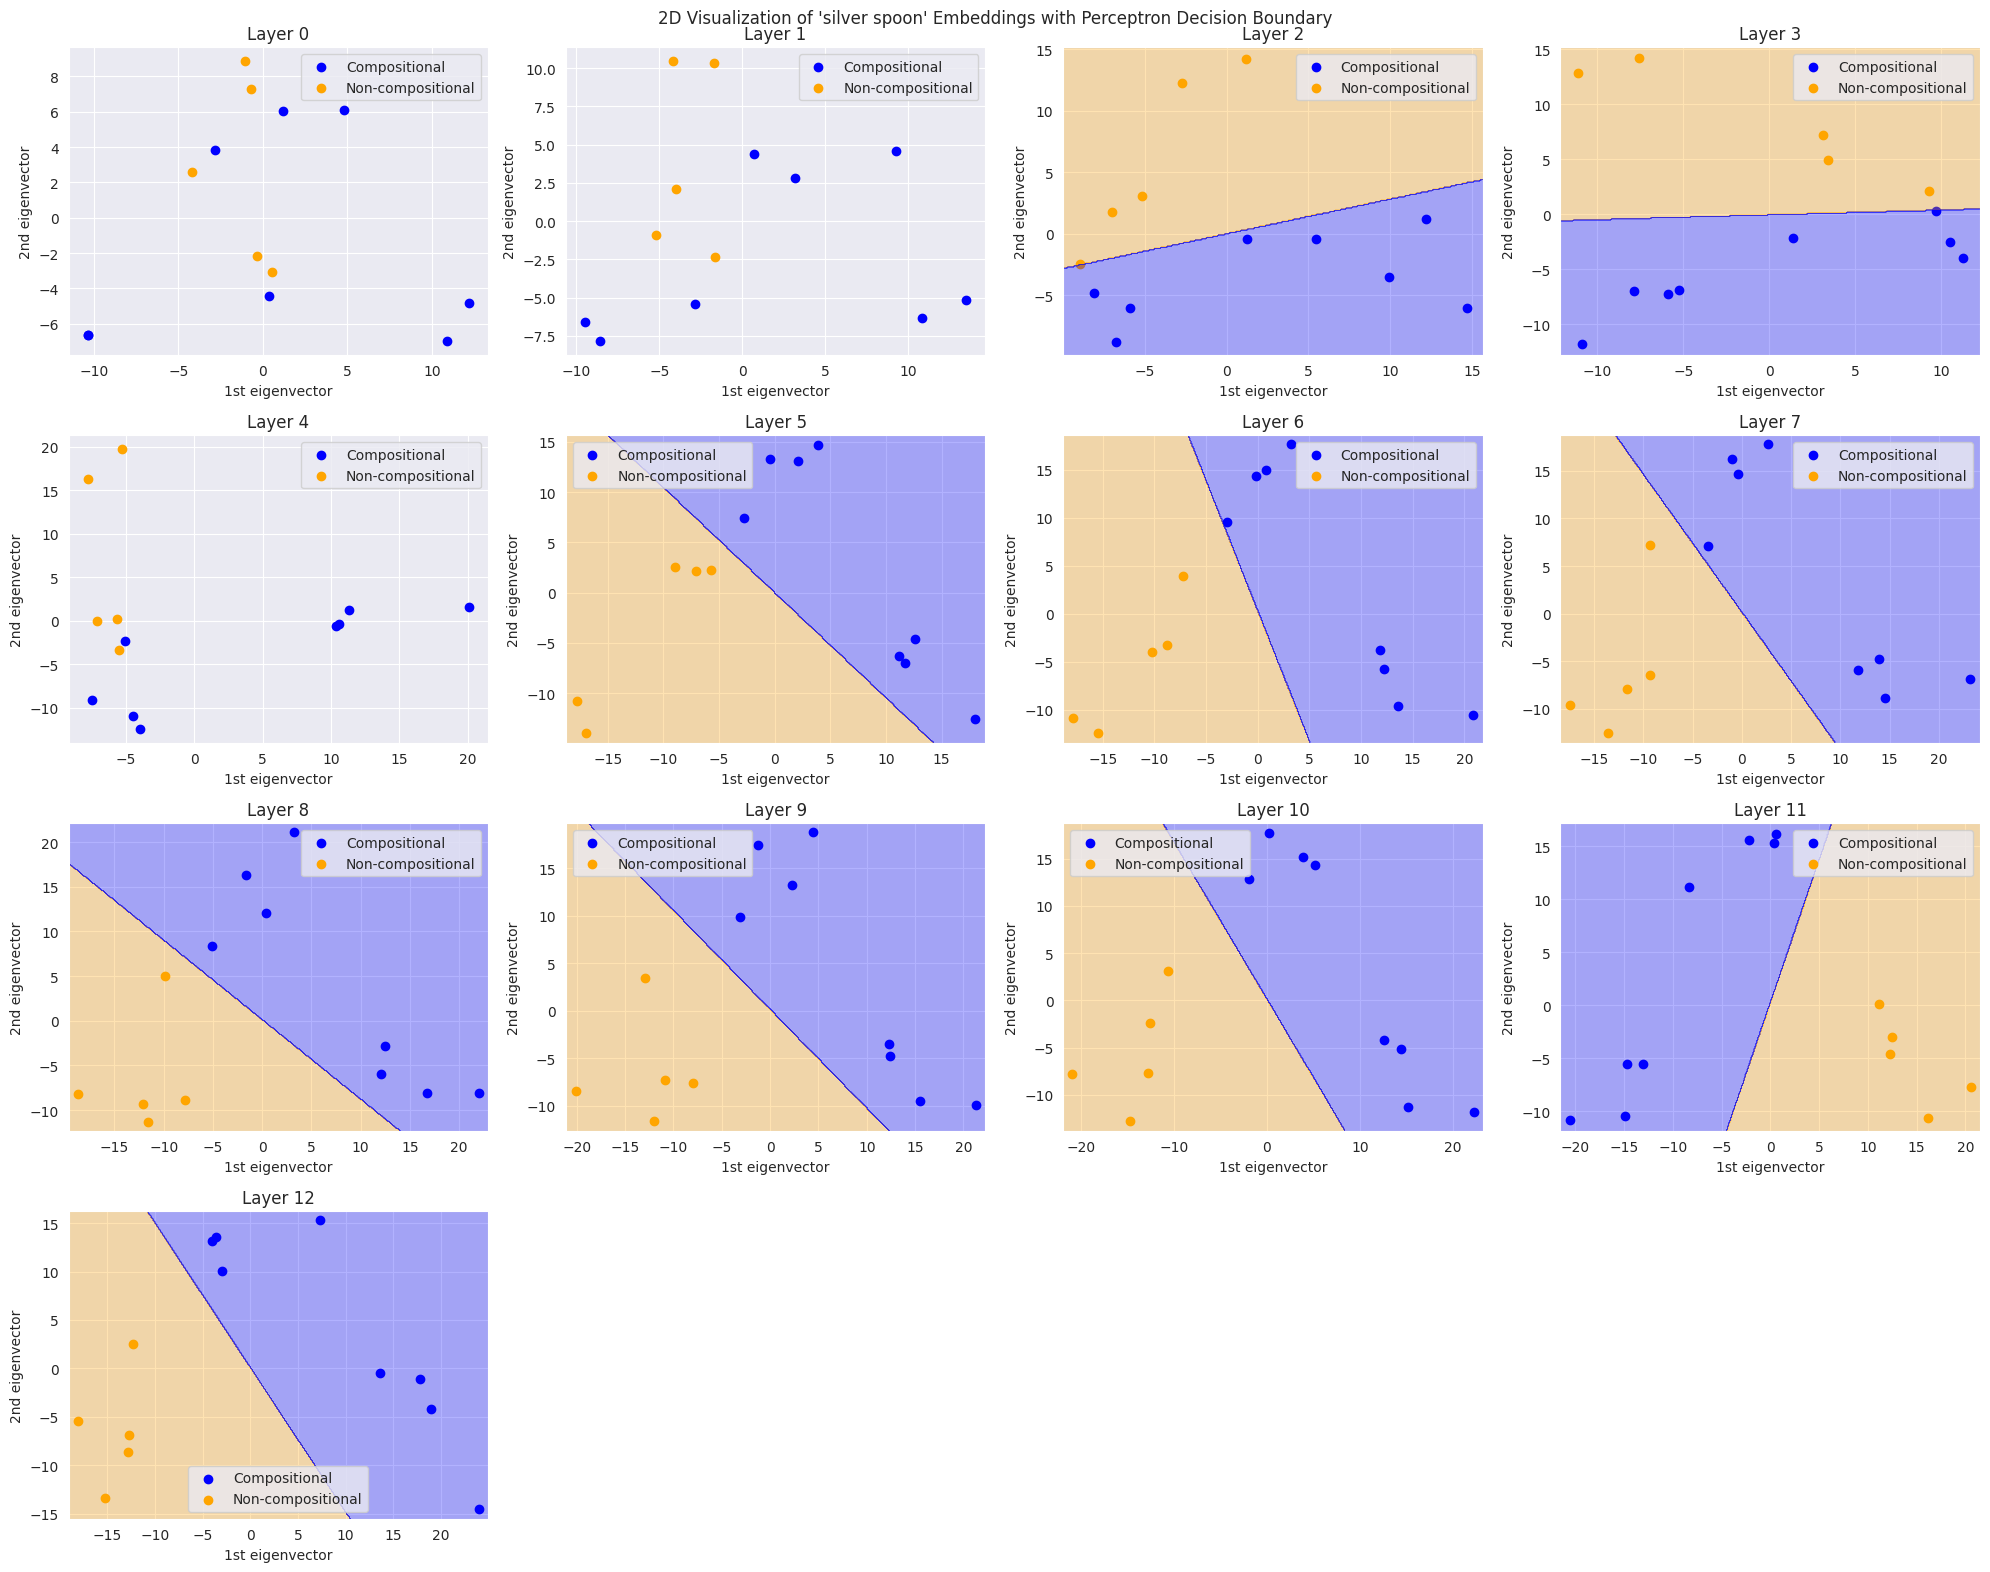

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

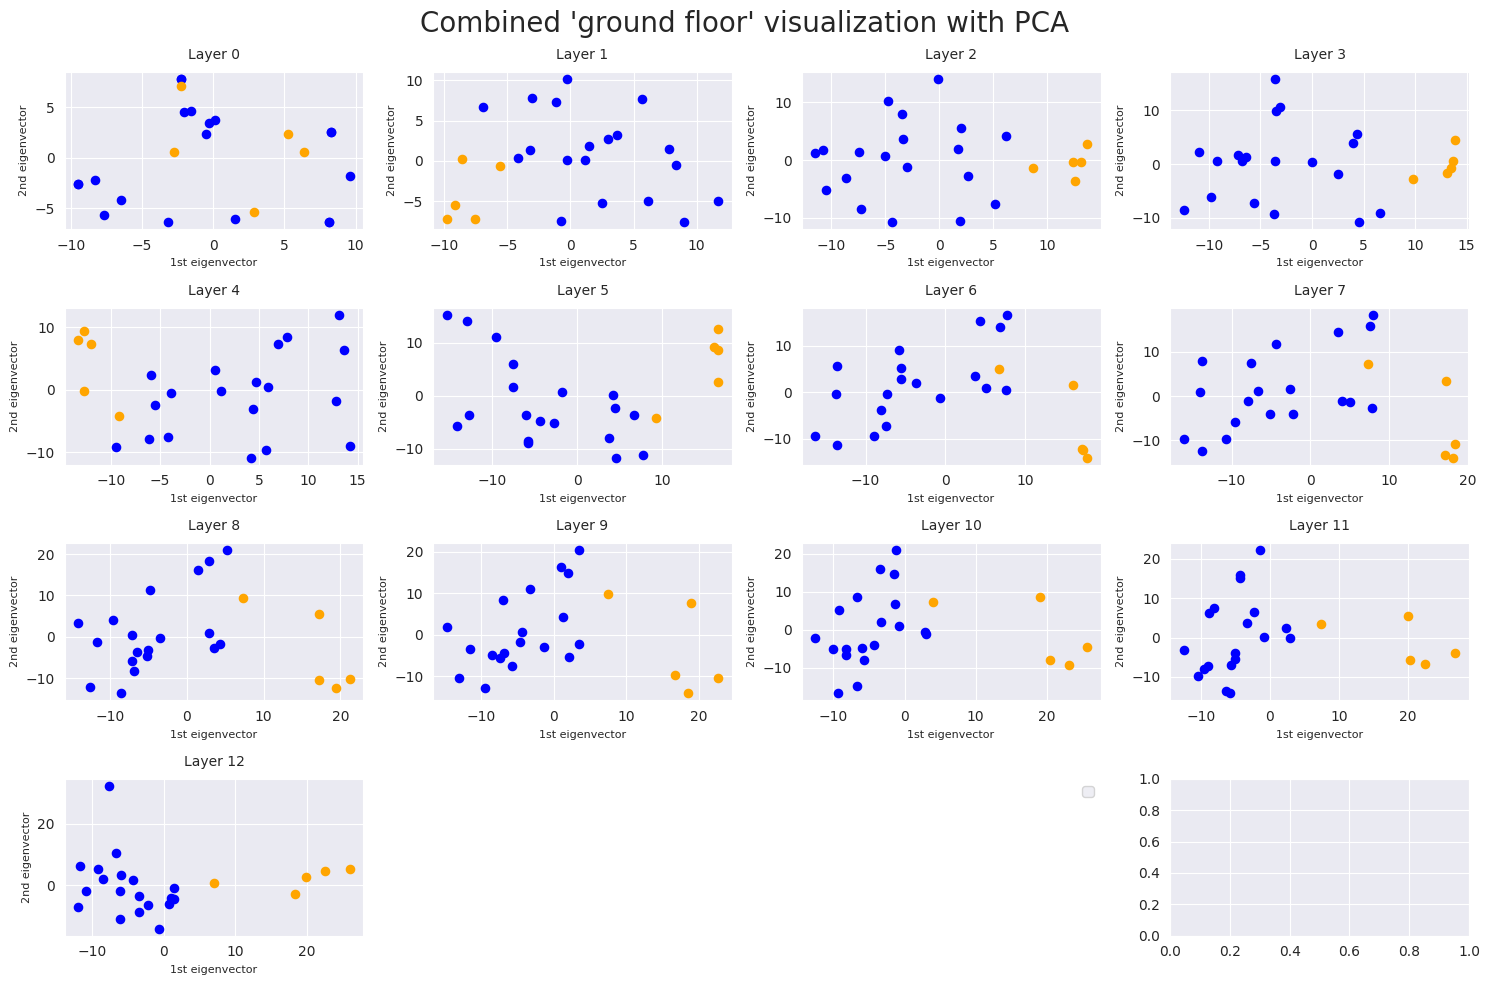

Layer 0
Training accuracy: 66.67% => data is not linearly separable.
Layer 1
Training accuracy: 100.00% => data is linearly separable.
Layer 2
Training accuracy: 91.67% => data is not linearly separable.
Layer 3
Training accuracy: 79.17% => data is not linearly separable.
Layer 4
Training accuracy: 83.33% => data is not linearly separable.
Layer 5
Training accuracy: 75.00% => data is not linearly separable.
Layer 6
Training accuracy: 91.67% => data is not linearly separable.
Layer 7
Training accuracy: 58.33% => data is not linearly separable.
Layer 8
Training accuracy: 87.50% => data is not linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 91.67% => data is not linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


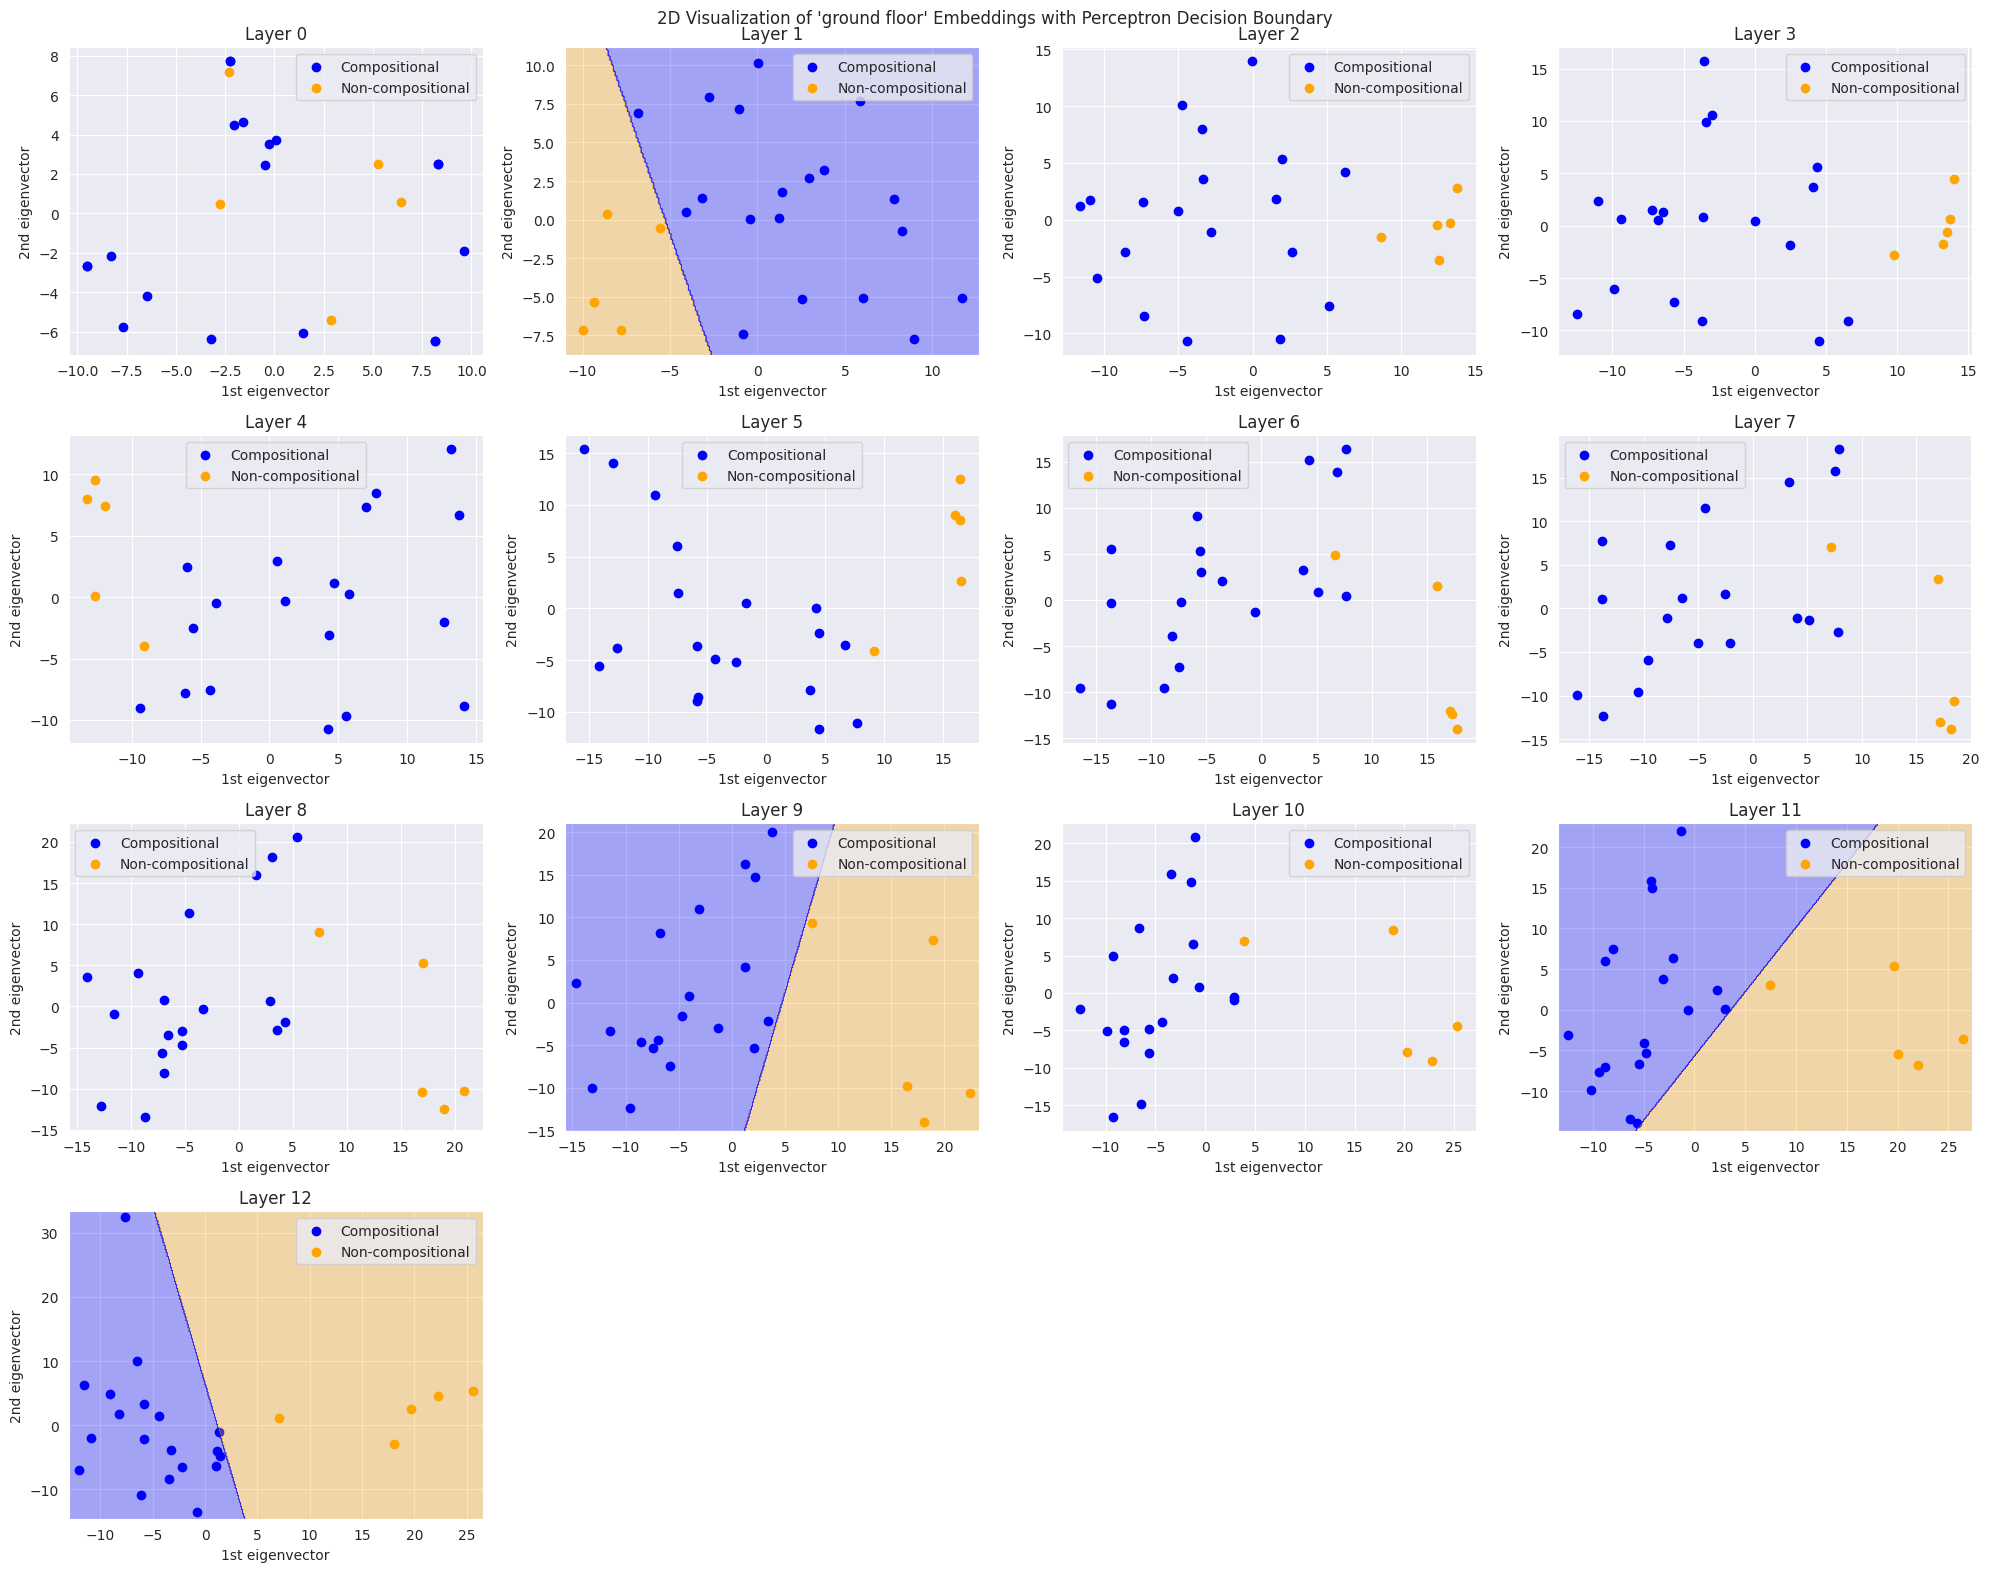

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

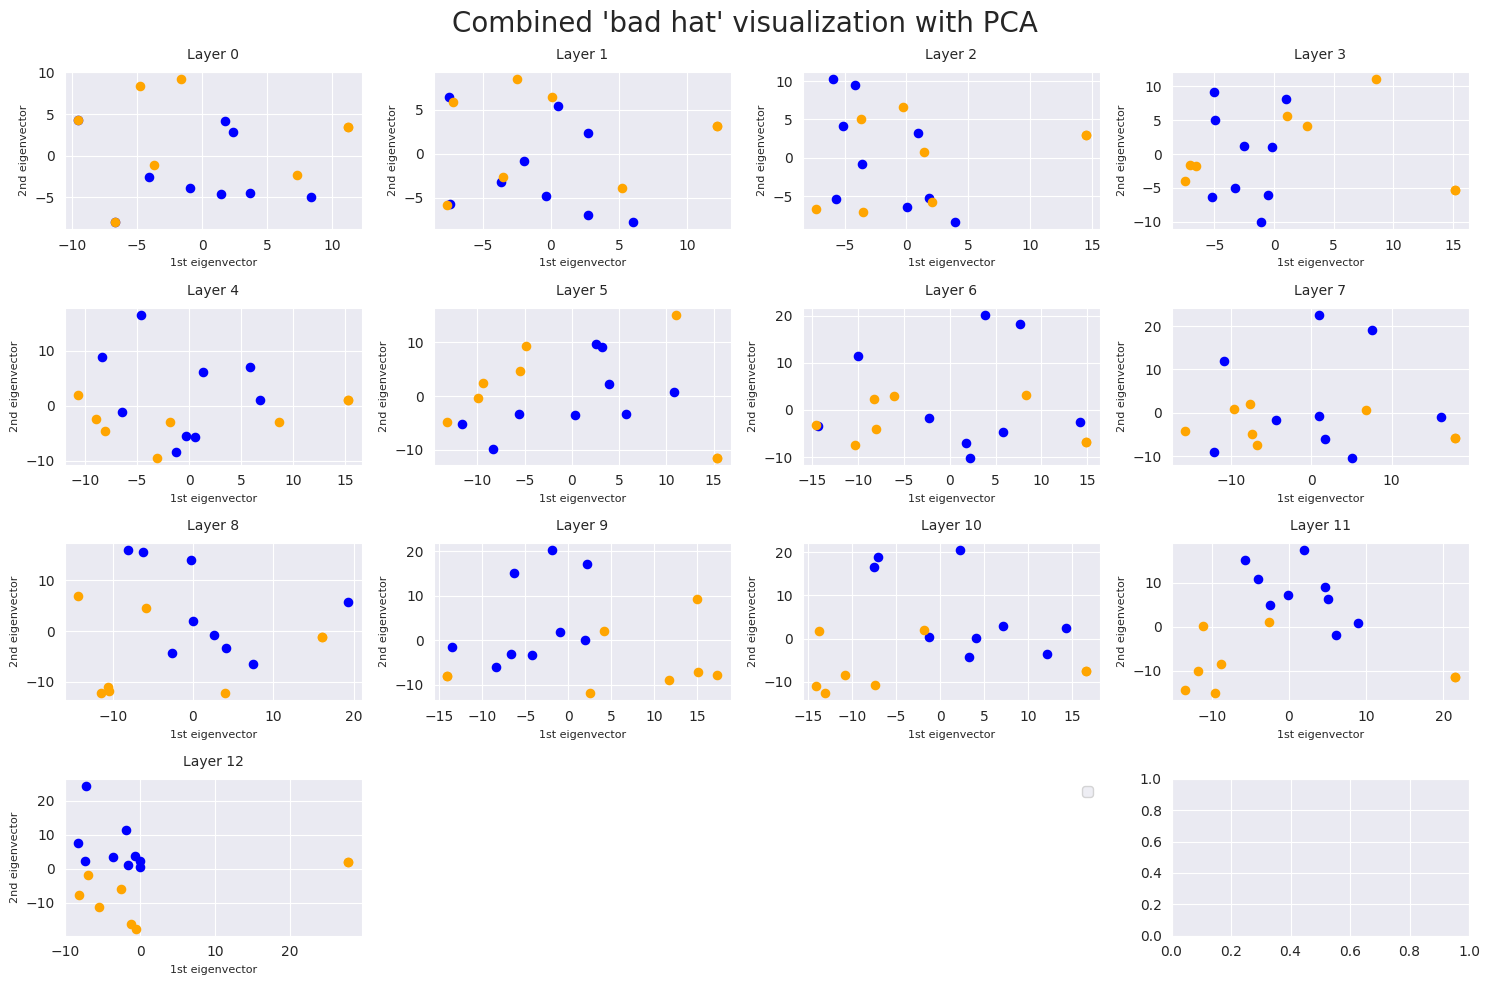

Layer 0
Training accuracy: 70.59% => data is not linearly separable.
Layer 1
Training accuracy: 64.71% => data is not linearly separable.
Layer 2
Training accuracy: 58.82% => data is not linearly separable.
Layer 3
Training accuracy: 64.71% => data is not linearly separable.
Layer 4
Training accuracy: 47.06% => data is not linearly separable.
Layer 5
Training accuracy: 47.06% => data is not linearly separable.
Layer 6
Training accuracy: 47.06% => data is not linearly separable.
Layer 7
Training accuracy: 64.71% => data is not linearly separable.
Layer 8
Training accuracy: 82.35% => data is not linearly separable.
Layer 9
Training accuracy: 64.71% => data is not linearly separable.
Layer 10
Training accuracy: 64.71% => data is not linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


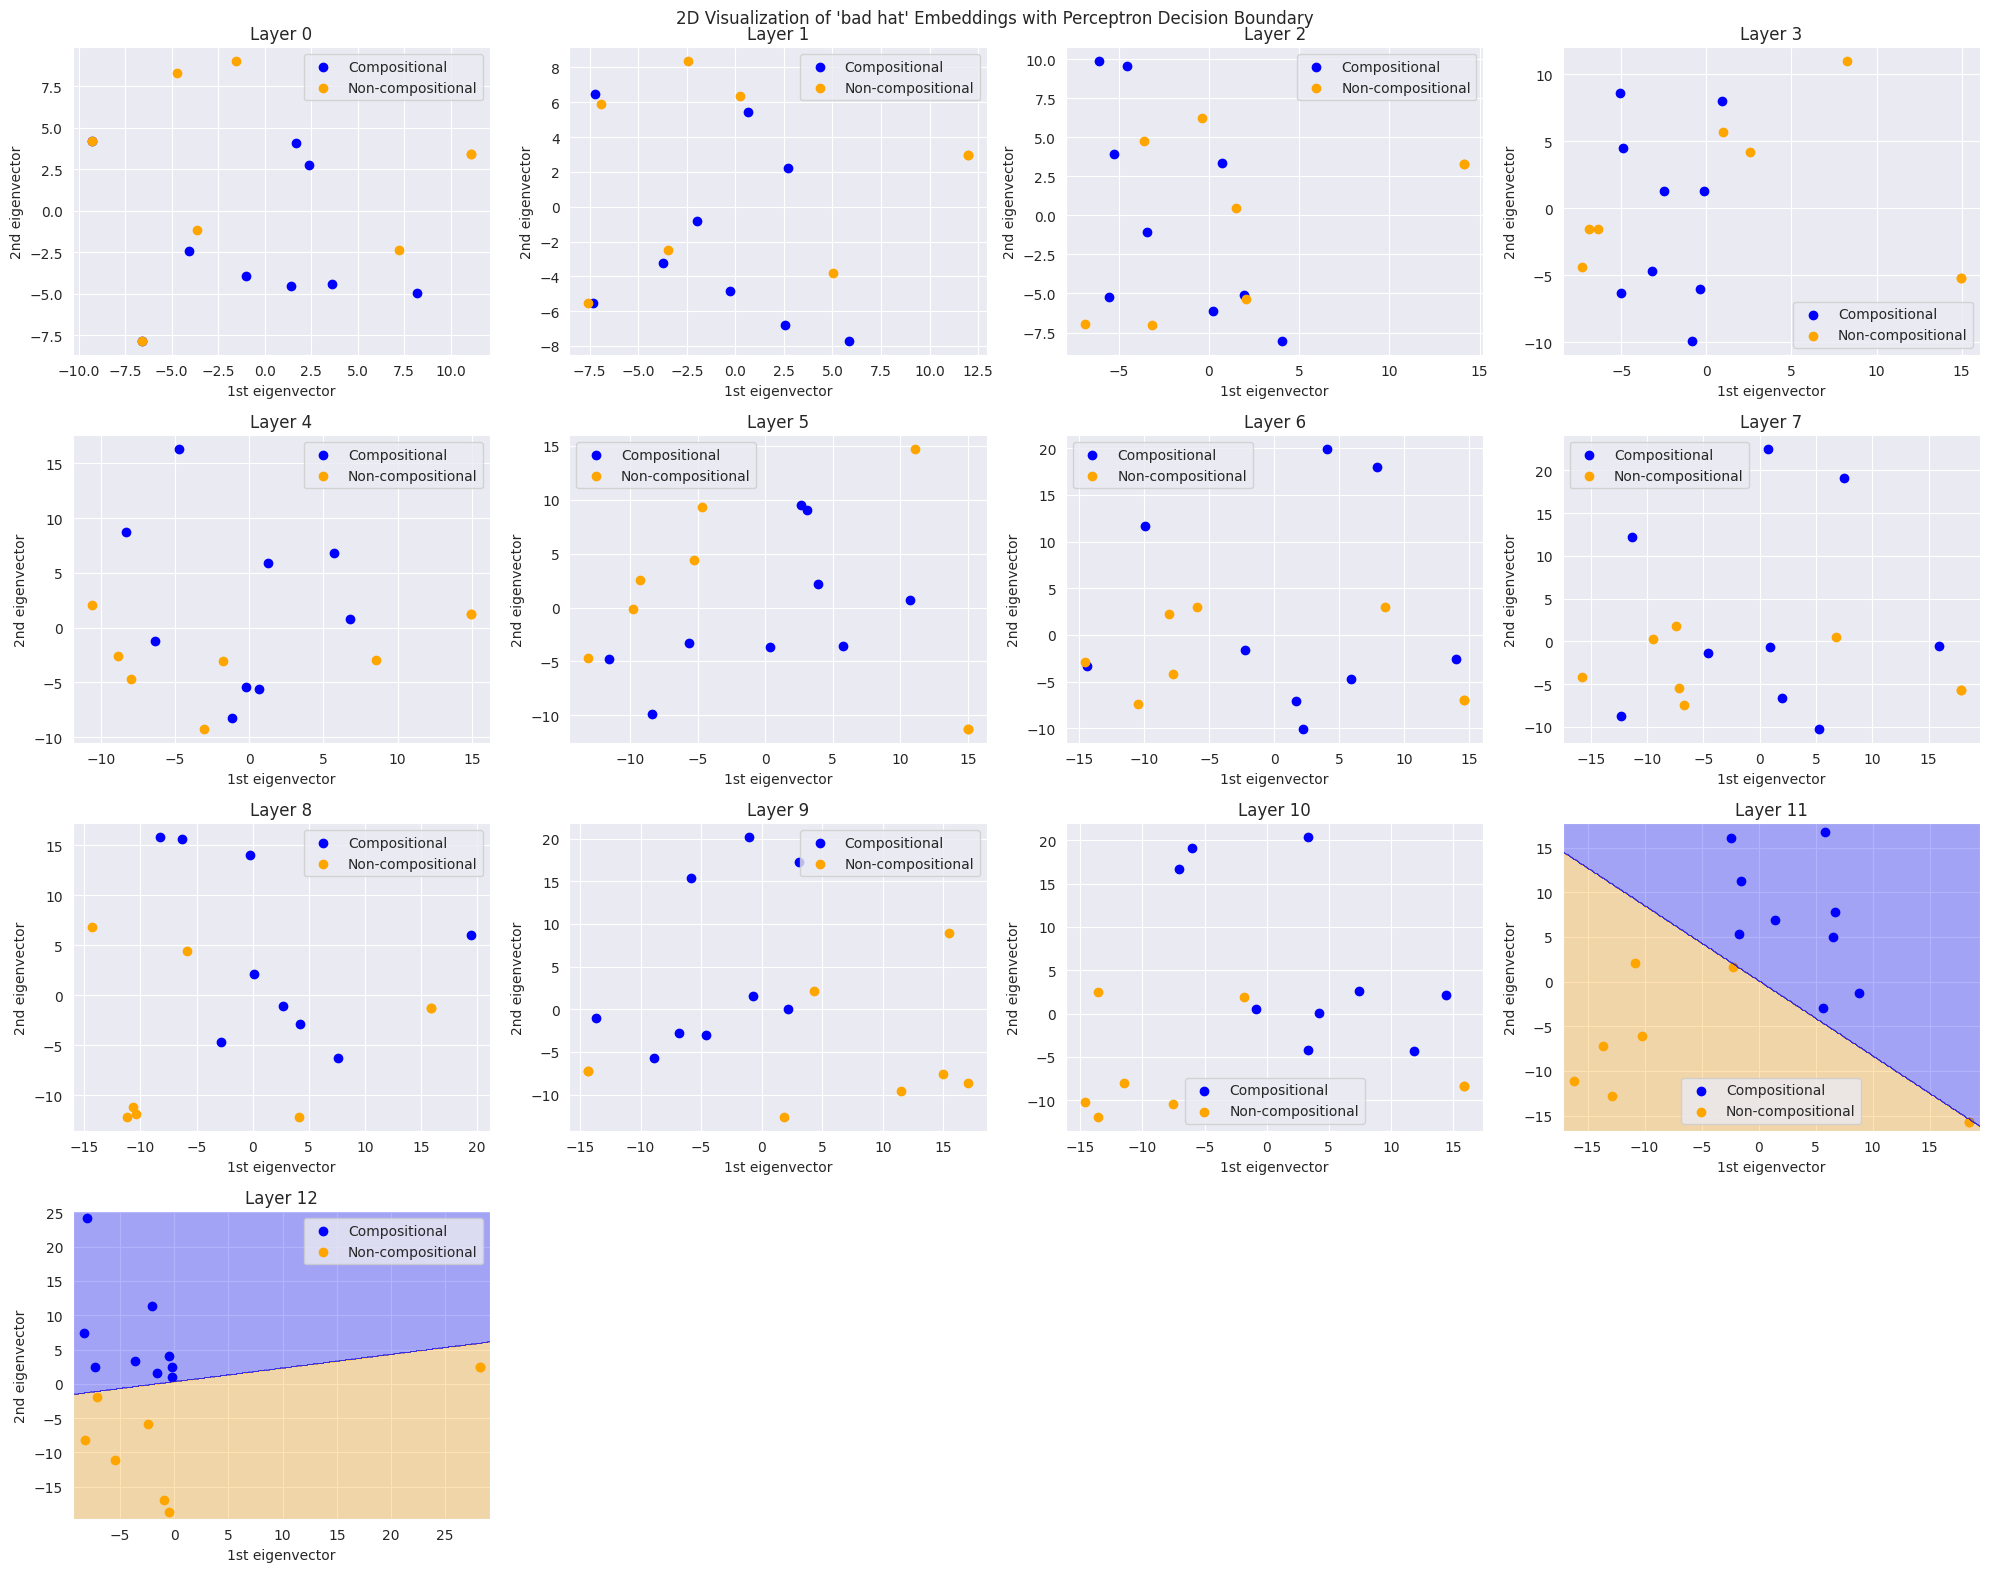

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

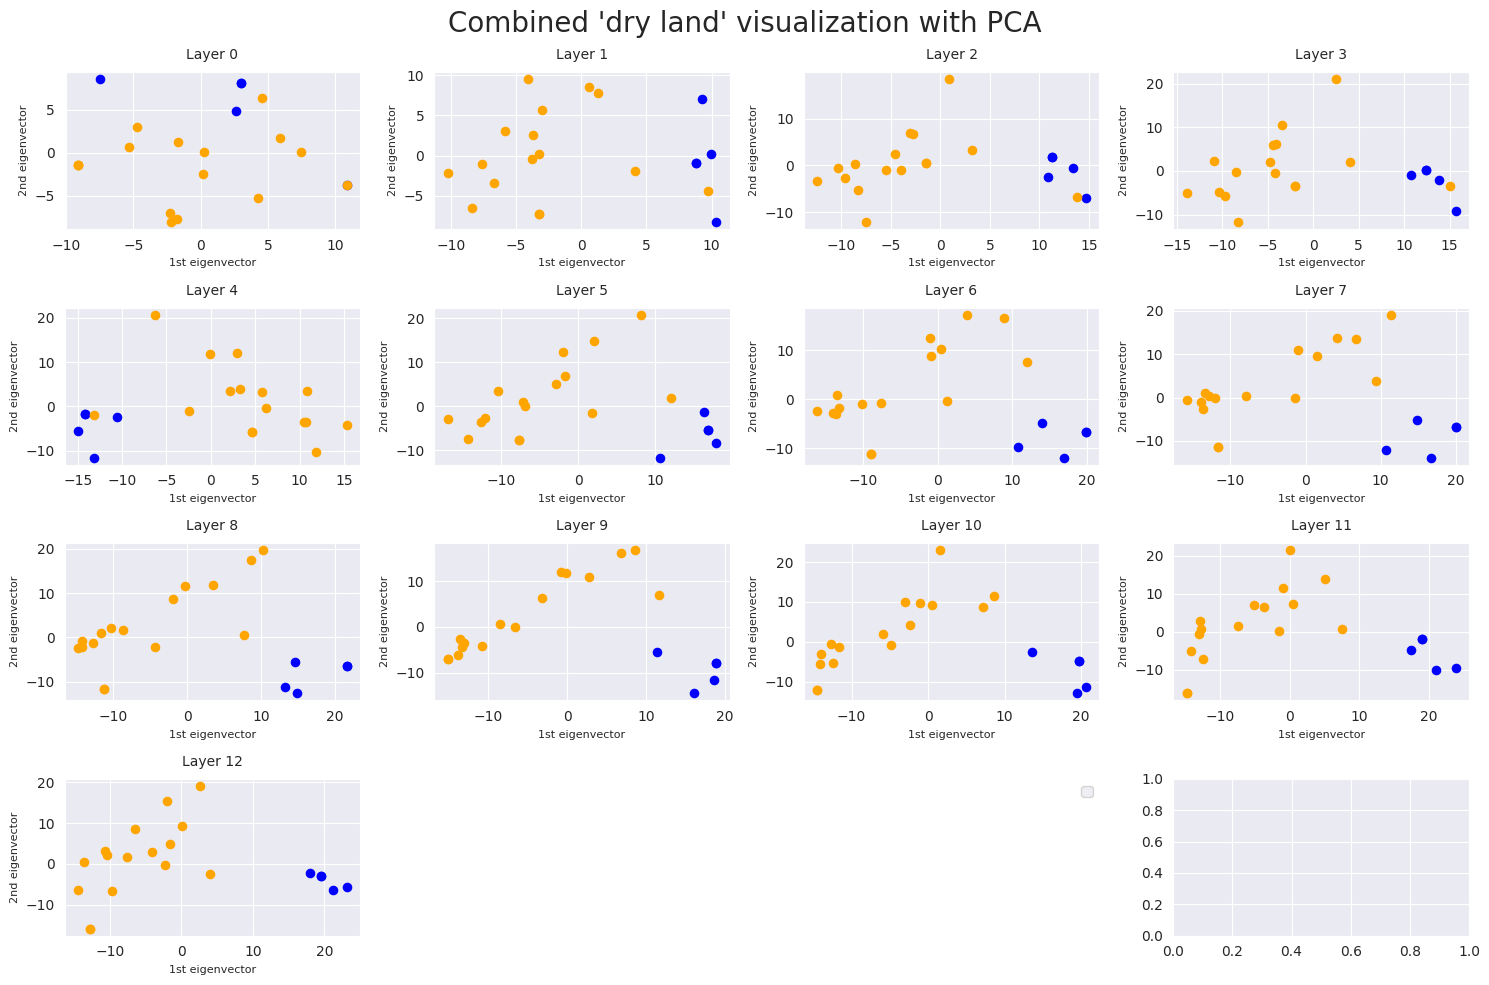

Layer 0
Training accuracy: 76.19% => data is not linearly separable.
Layer 1
Training accuracy: 90.48% => data is not linearly separable.
Layer 2
Training accuracy: 38.10% => data is not linearly separable.
Layer 3
Training accuracy: 95.24% => data is not linearly separable.
Layer 4
Training accuracy: 95.24% => data is not linearly separable.
Layer 5
Training accuracy: 90.48% => data is not linearly separable.
Layer 6
Training accuracy: 85.71% => data is not linearly separable.
Layer 7
Training accuracy: 85.71% => data is not linearly separable.
Layer 8
Training accuracy: 95.24% => data is not linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 90.48% => data is not linearly separable.
Layer 12
Training accuracy: 95.24% => data is not linearly separable.


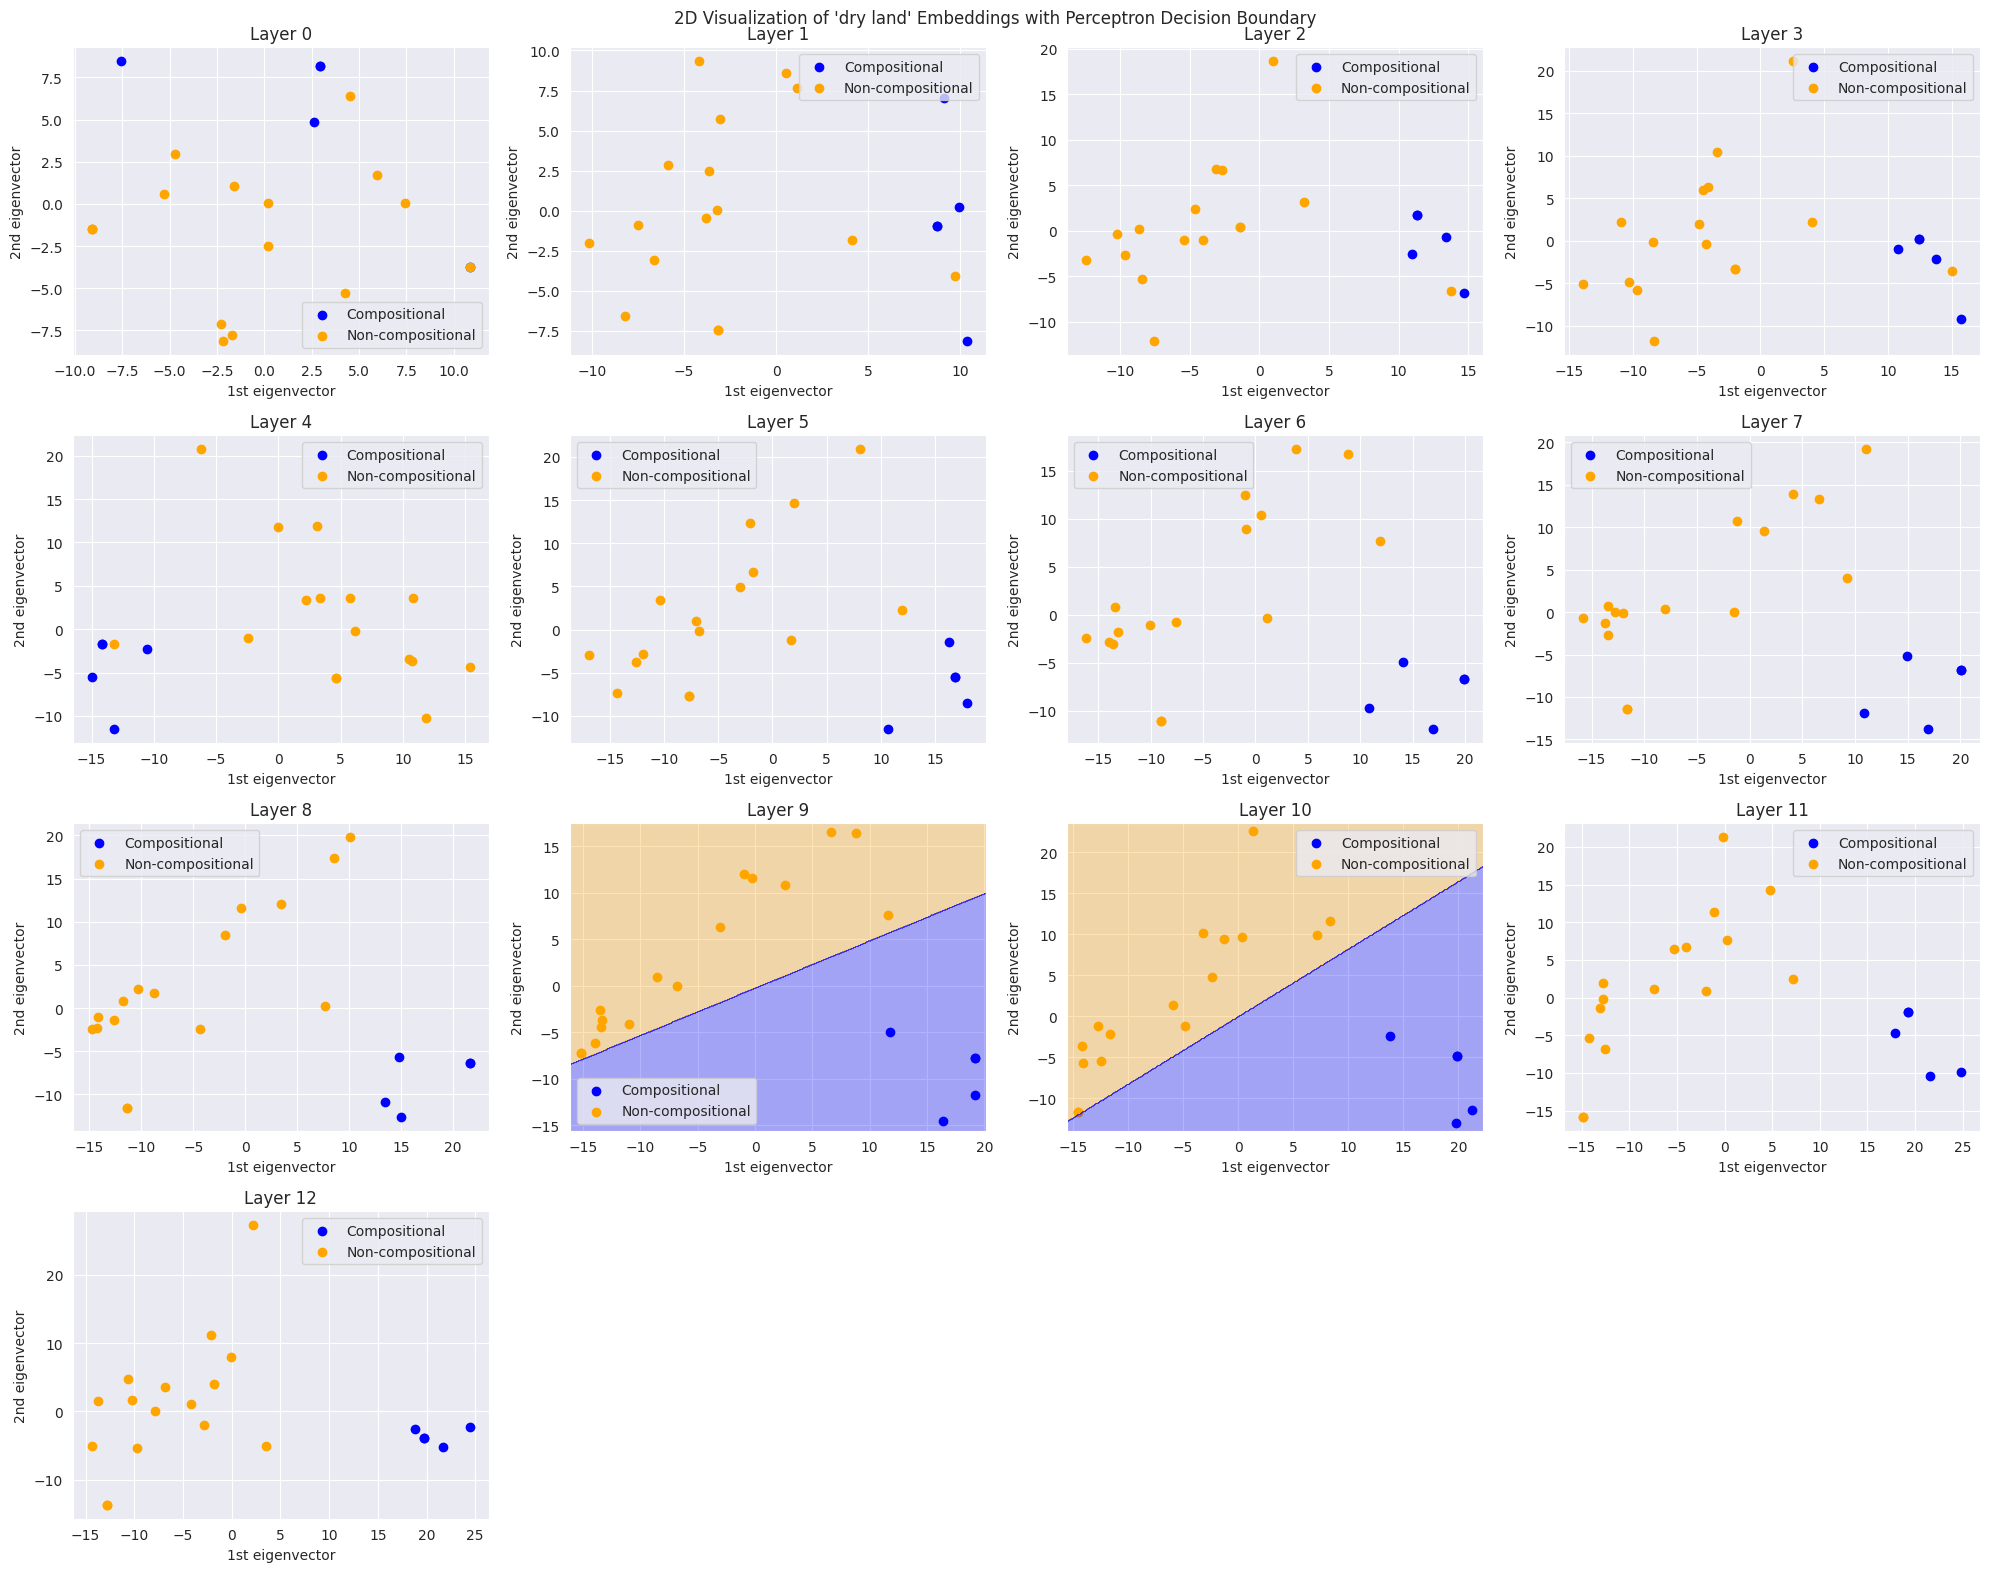

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

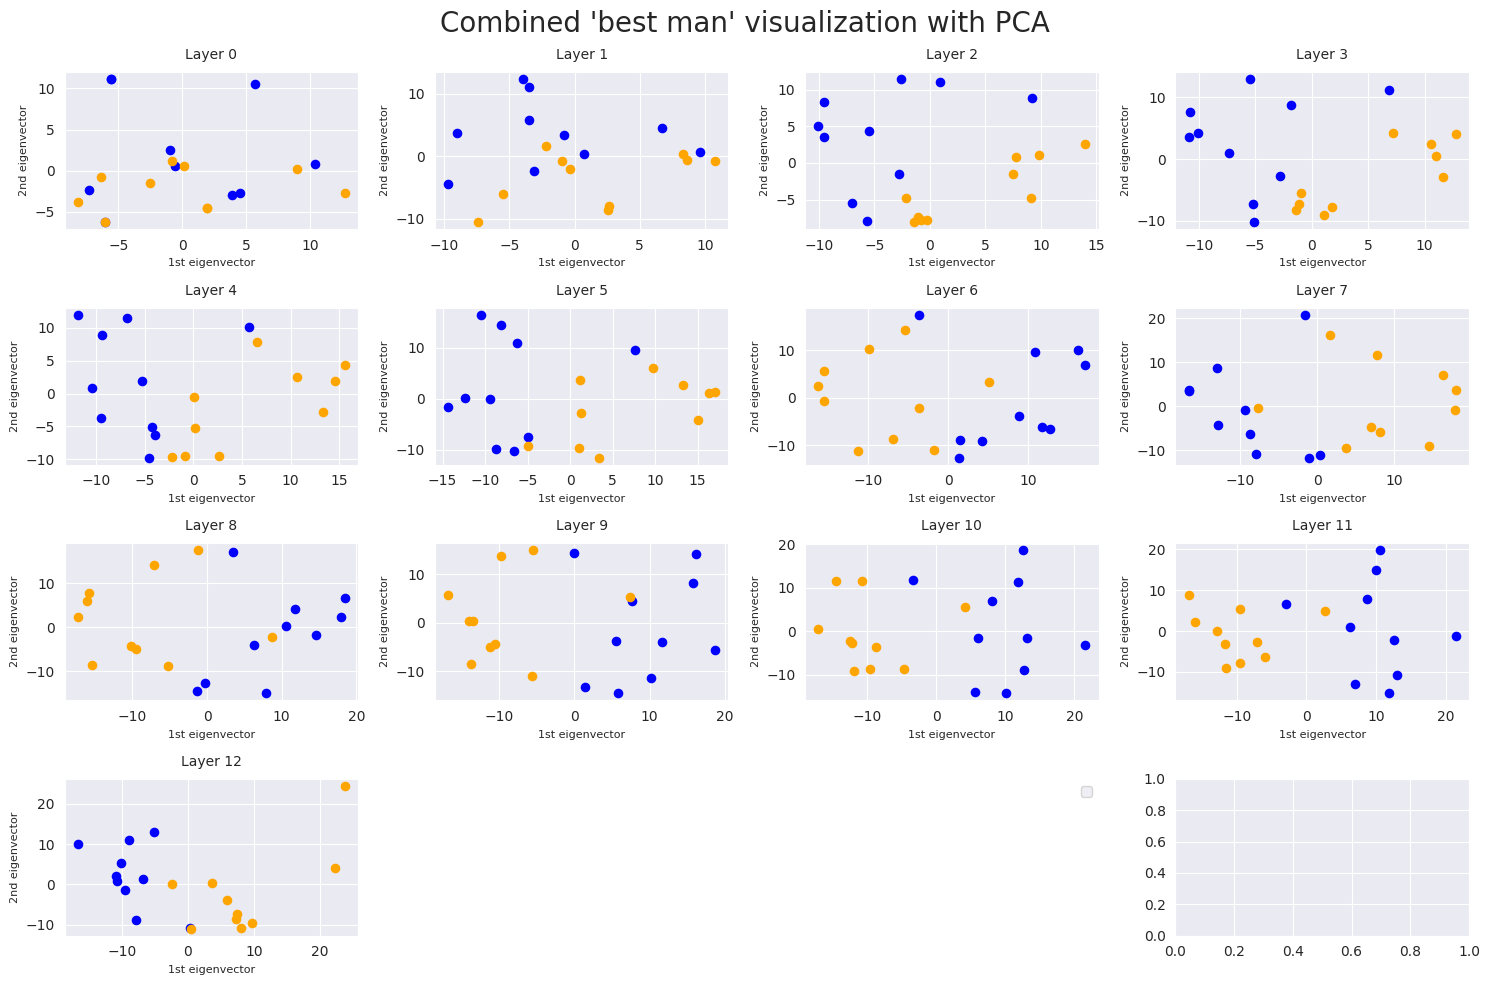

Layer 0
Training accuracy: 55.00% => data is not linearly separable.
Layer 1
Training accuracy: 80.00% => data is not linearly separable.
Layer 2
Training accuracy: 95.00% => data is not linearly separable.
Layer 3
Training accuracy: 80.00% => data is not linearly separable.
Layer 4
Training accuracy: 90.00% => data is not linearly separable.
Layer 5
Training accuracy: 75.00% => data is not linearly separable.
Layer 6
Training accuracy: 55.00% => data is not linearly separable.
Layer 7
Training accuracy: 85.00% => data is not linearly separable.
Layer 8
Training accuracy: 95.00% => data is not linearly separable.
Layer 9
Training accuracy: 95.00% => data is not linearly separable.
Layer 10
Training accuracy: 90.00% => data is not linearly separable.
Layer 11
Training accuracy: 90.00% => data is not linearly separable.
Layer 12
Training accuracy: 90.00% => data is not linearly separable.


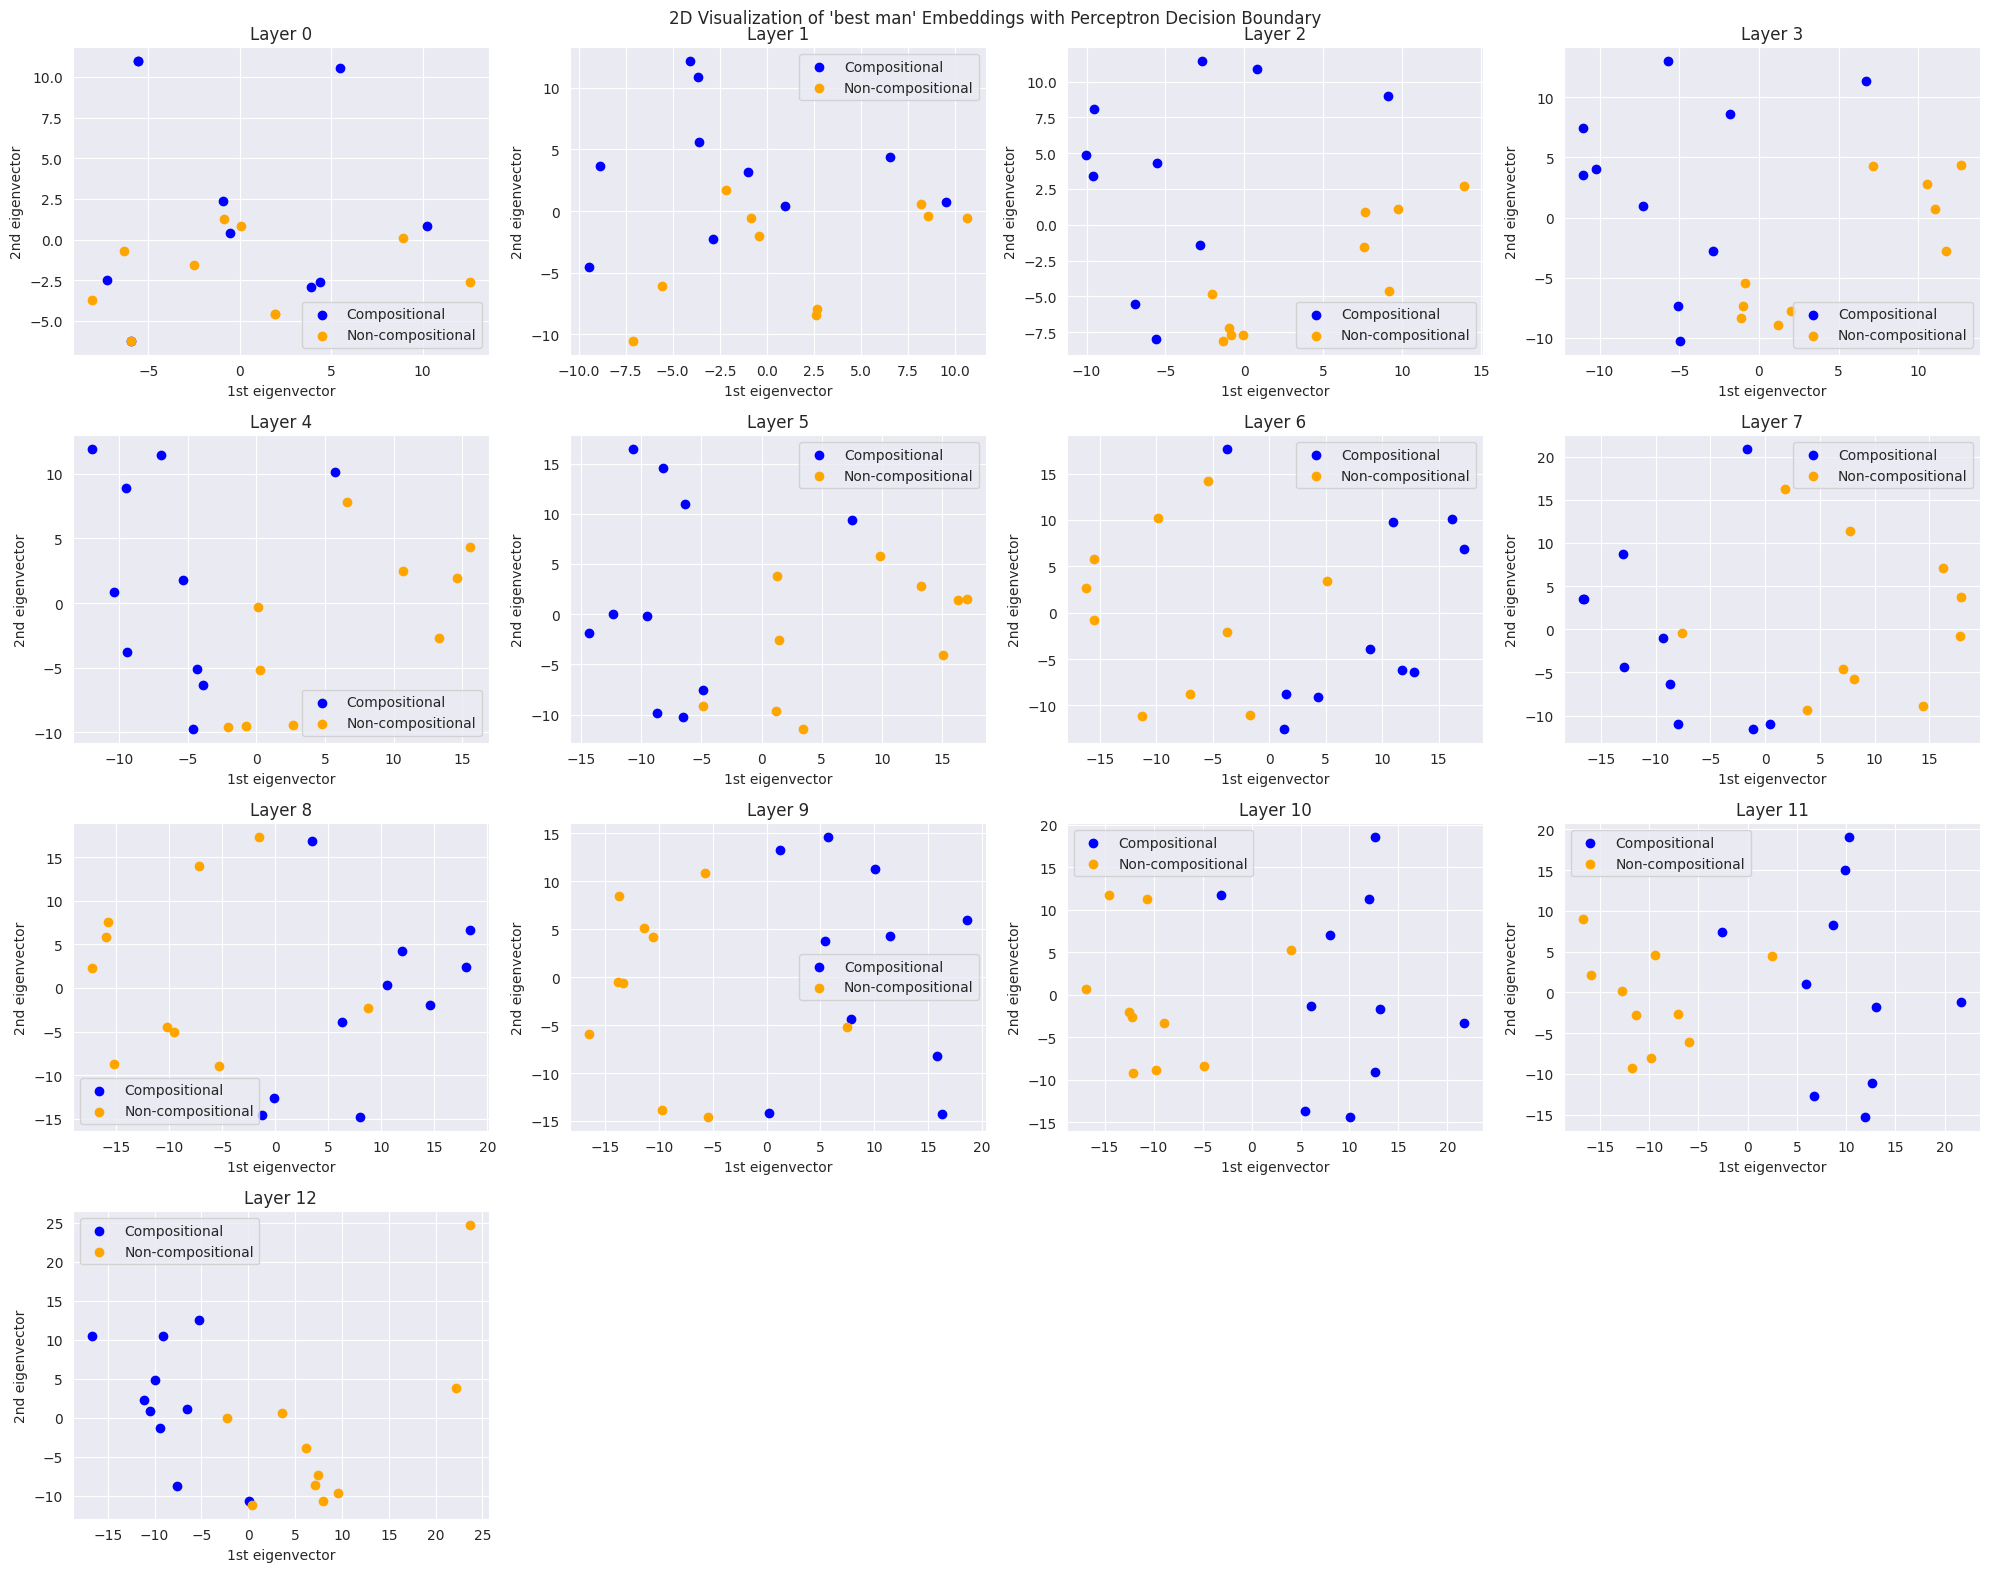

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

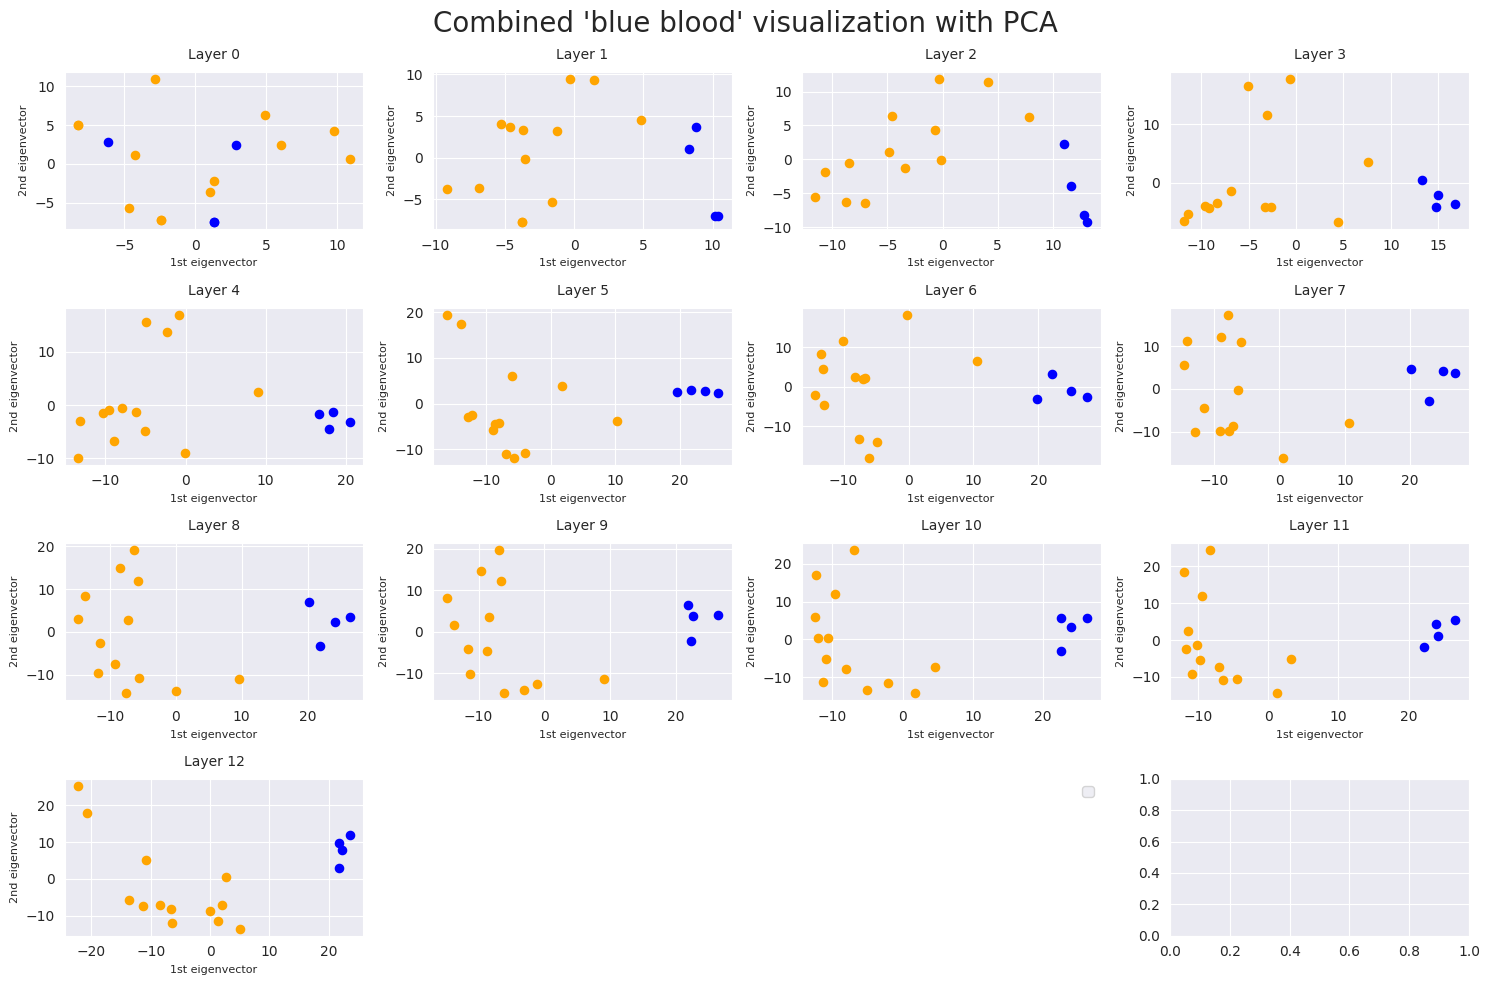

Layer 0
Training accuracy: 47.06% => data is not linearly separable.
Layer 1
Training accuracy: 100.00% => data is linearly separable.
Layer 2
Training accuracy: 88.24% => data is not linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 100.00% => data is linearly separable.
Layer 5
Training accuracy: 94.12% => data is not linearly separable.
Layer 6
Training accuracy: 88.24% => data is not linearly separable.
Layer 7
Training accuracy: 88.24% => data is not linearly separable.
Layer 8
Training accuracy: 94.12% => data is not linearly separable.
Layer 9
Training accuracy: 88.24% => data is not linearly separable.
Layer 10
Training accuracy: 88.24% => data is not linearly separable.
Layer 11
Training accuracy: 88.24% => data is not linearly separable.
Layer 12
Training accuracy: 94.12% => data is not linearly separable.


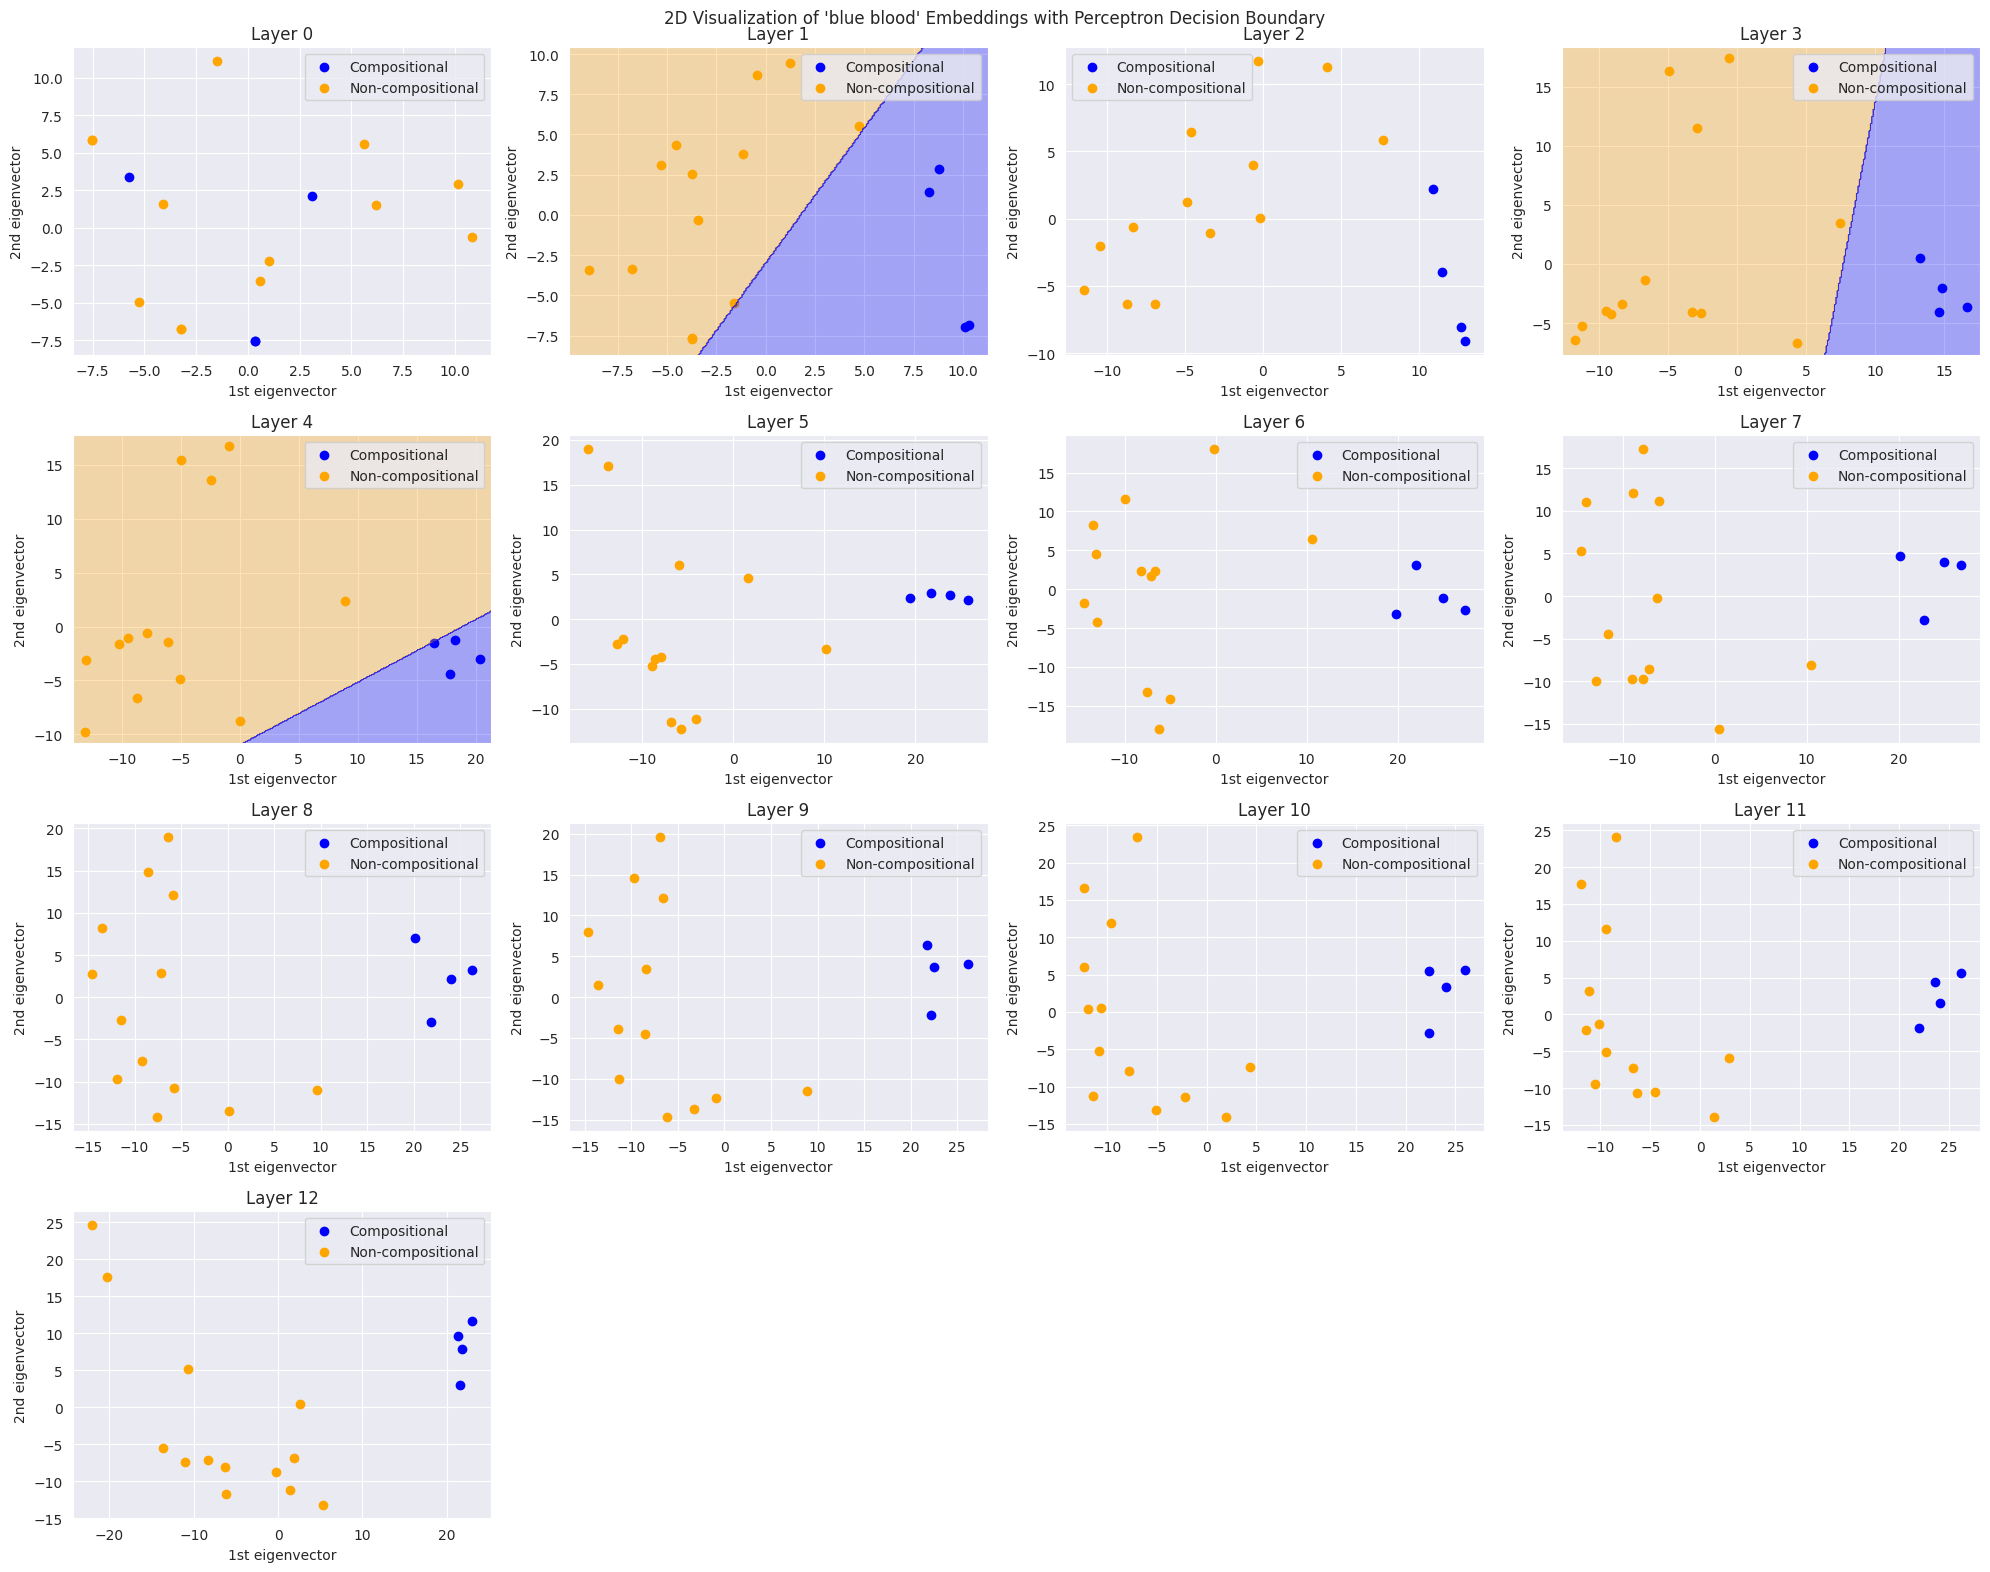

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

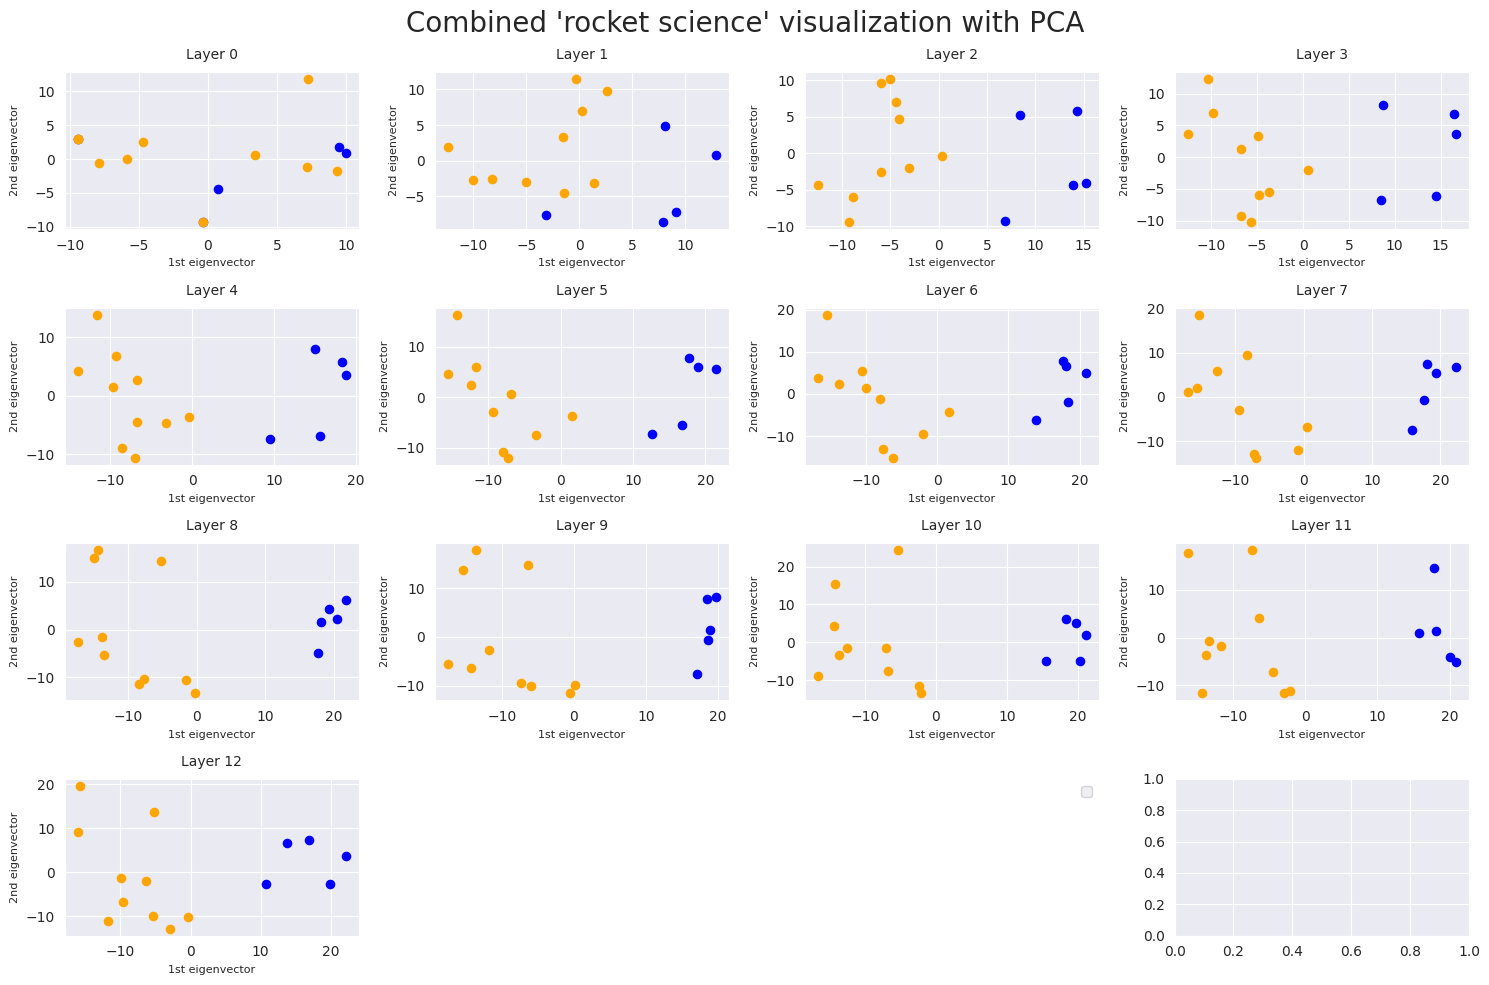

Layer 0
Training accuracy: 60.00% => data is not linearly separable.
Layer 1
Training accuracy: 86.67% => data is not linearly separable.
Layer 2
Training accuracy: 100.00% => data is linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 100.00% => data is linearly separable.
Layer 5
Training accuracy: 100.00% => data is linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 100.00% => data is linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


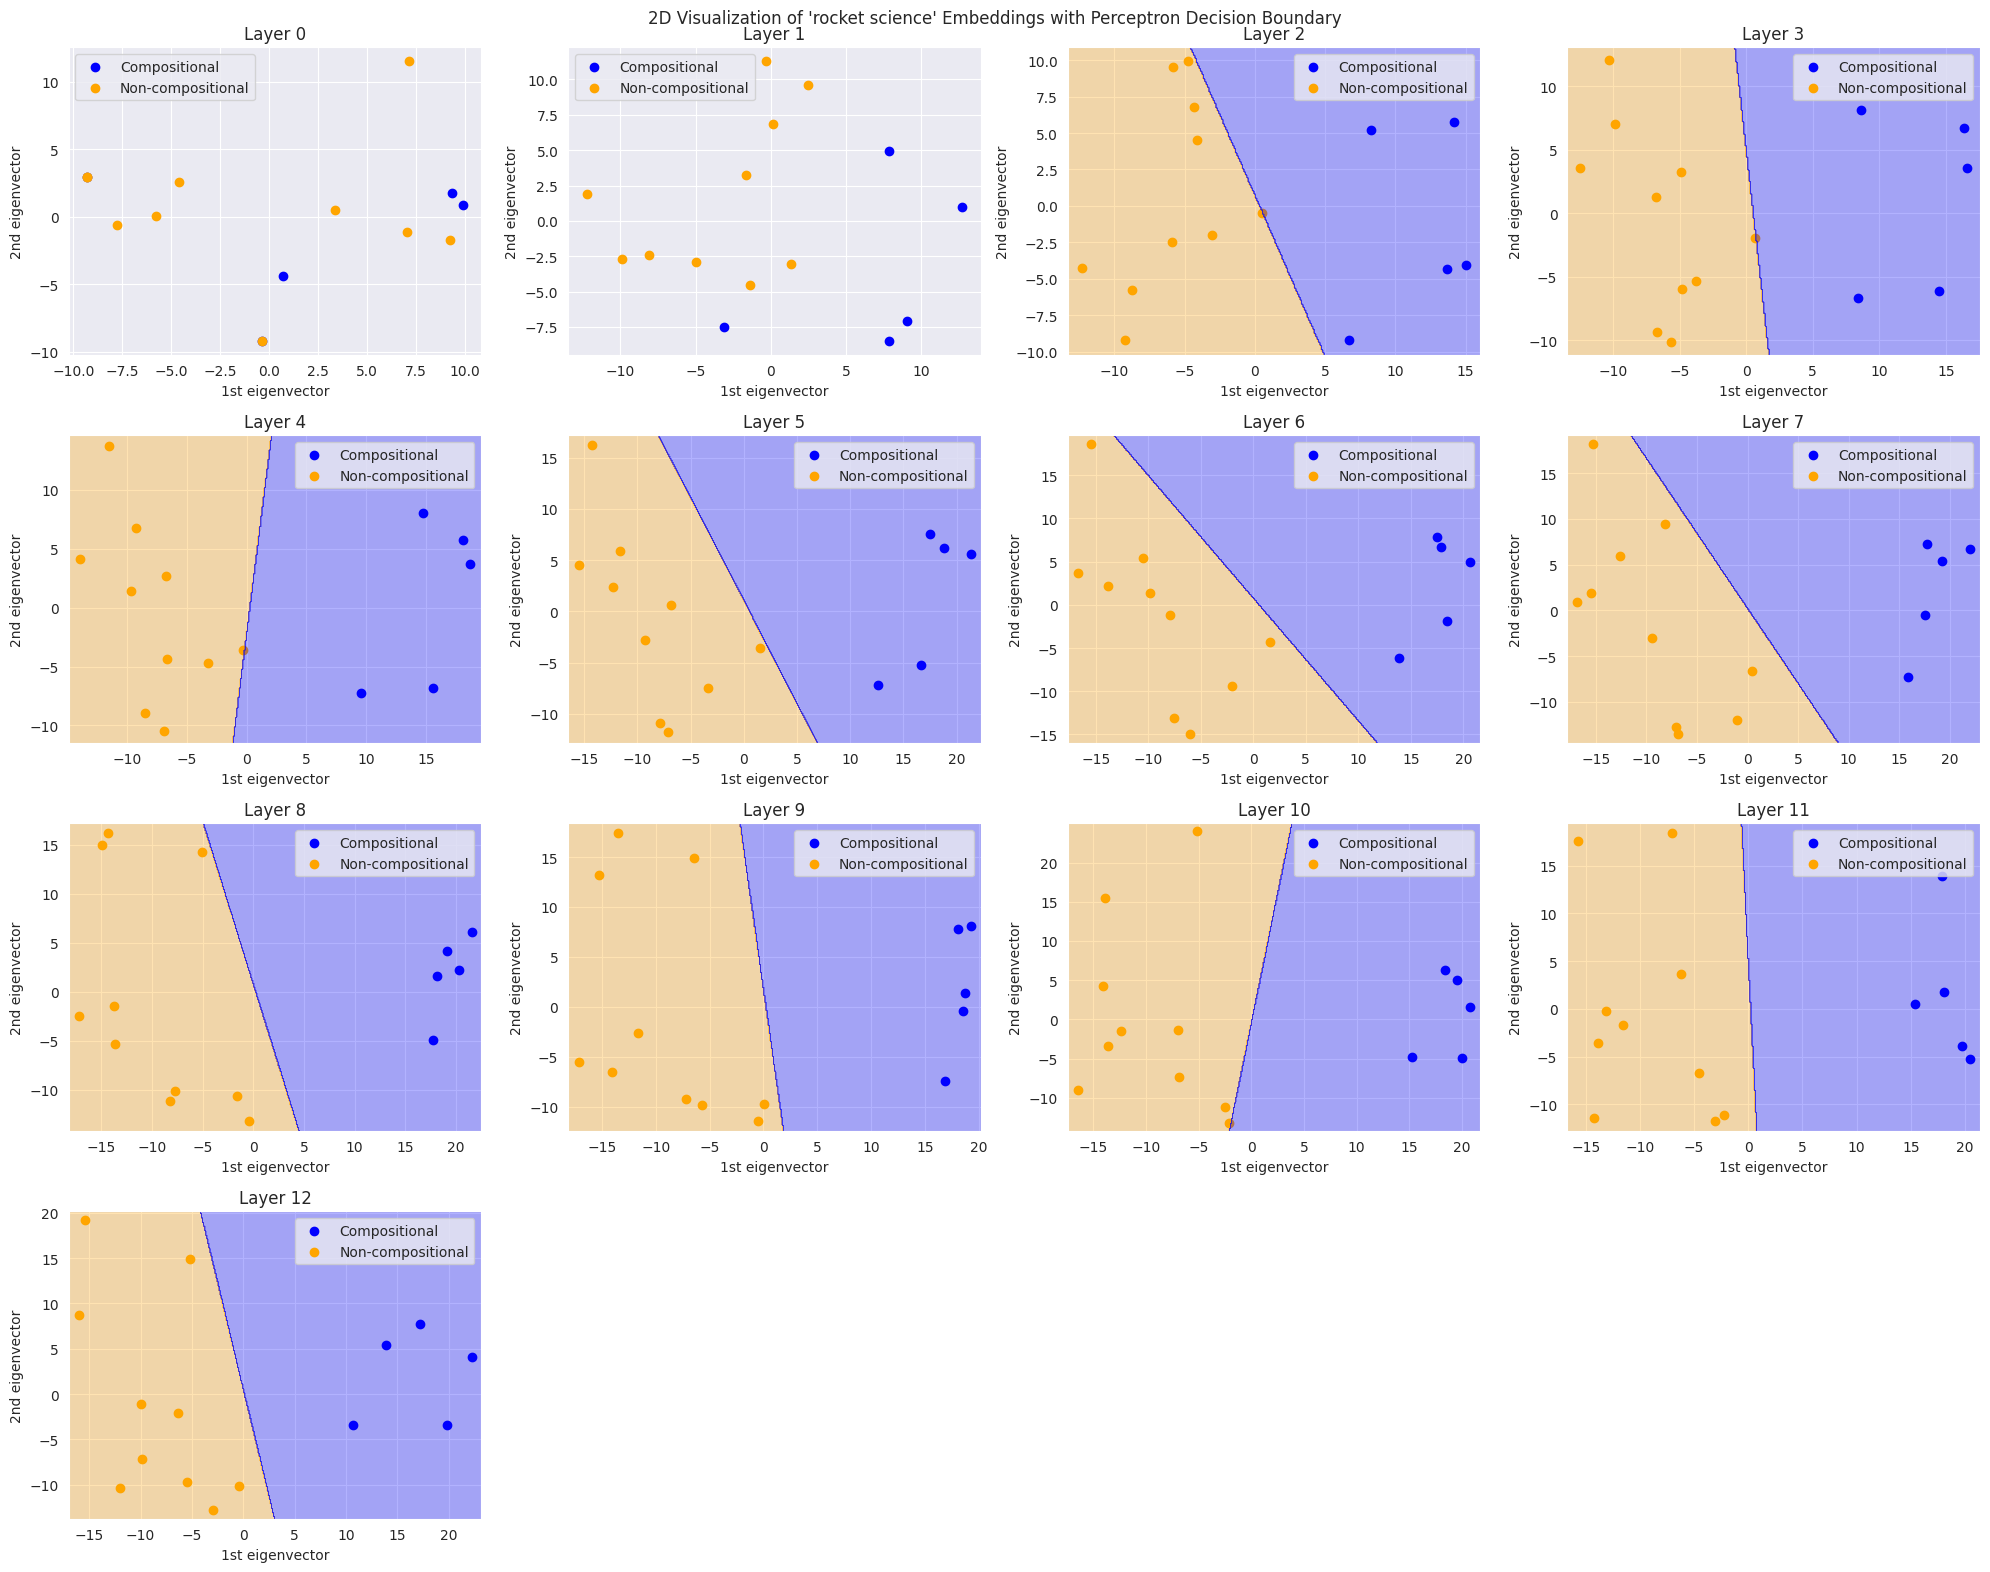

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

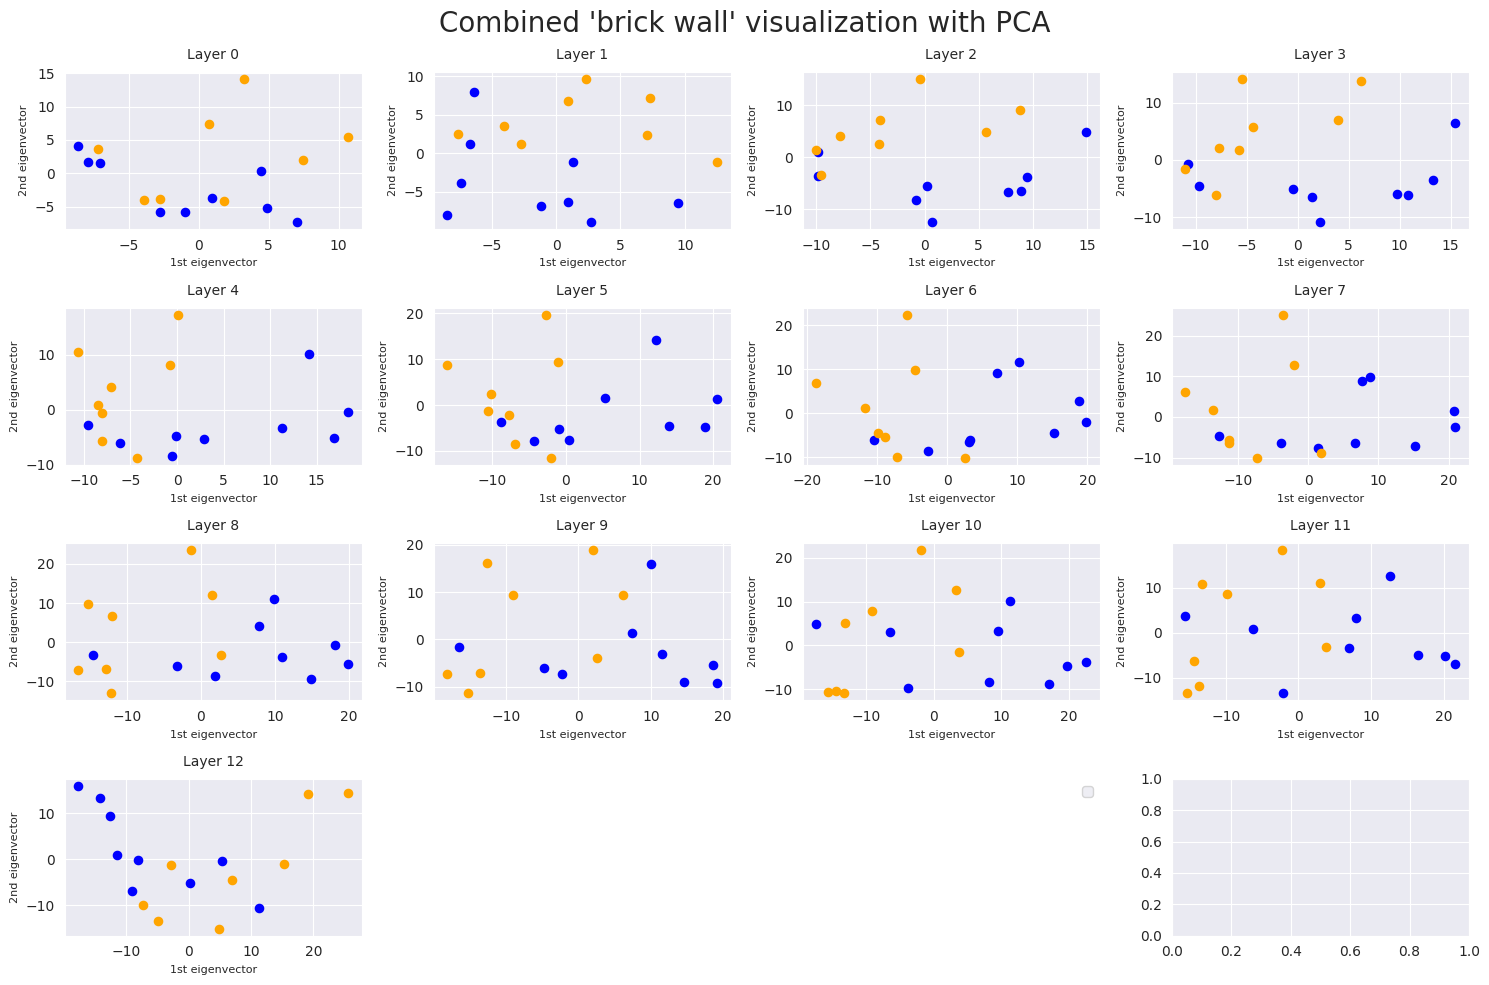

Layer 0
Training accuracy: 58.82% => data is not linearly separable.
Layer 1
Training accuracy: 94.12% => data is not linearly separable.
Layer 2
Training accuracy: 82.35% => data is not linearly separable.
Layer 3
Training accuracy: 82.35% => data is not linearly separable.
Layer 4
Training accuracy: 82.35% => data is not linearly separable.
Layer 5
Training accuracy: 76.47% => data is not linearly separable.
Layer 6
Training accuracy: 82.35% => data is not linearly separable.
Layer 7
Training accuracy: 58.82% => data is not linearly separable.
Layer 8
Training accuracy: 76.47% => data is not linearly separable.
Layer 9
Training accuracy: 82.35% => data is not linearly separable.
Layer 10
Training accuracy: 70.59% => data is not linearly separable.
Layer 11
Training accuracy: 76.47% => data is not linearly separable.
Layer 12
Training accuracy: 64.71% => data is not linearly separable.


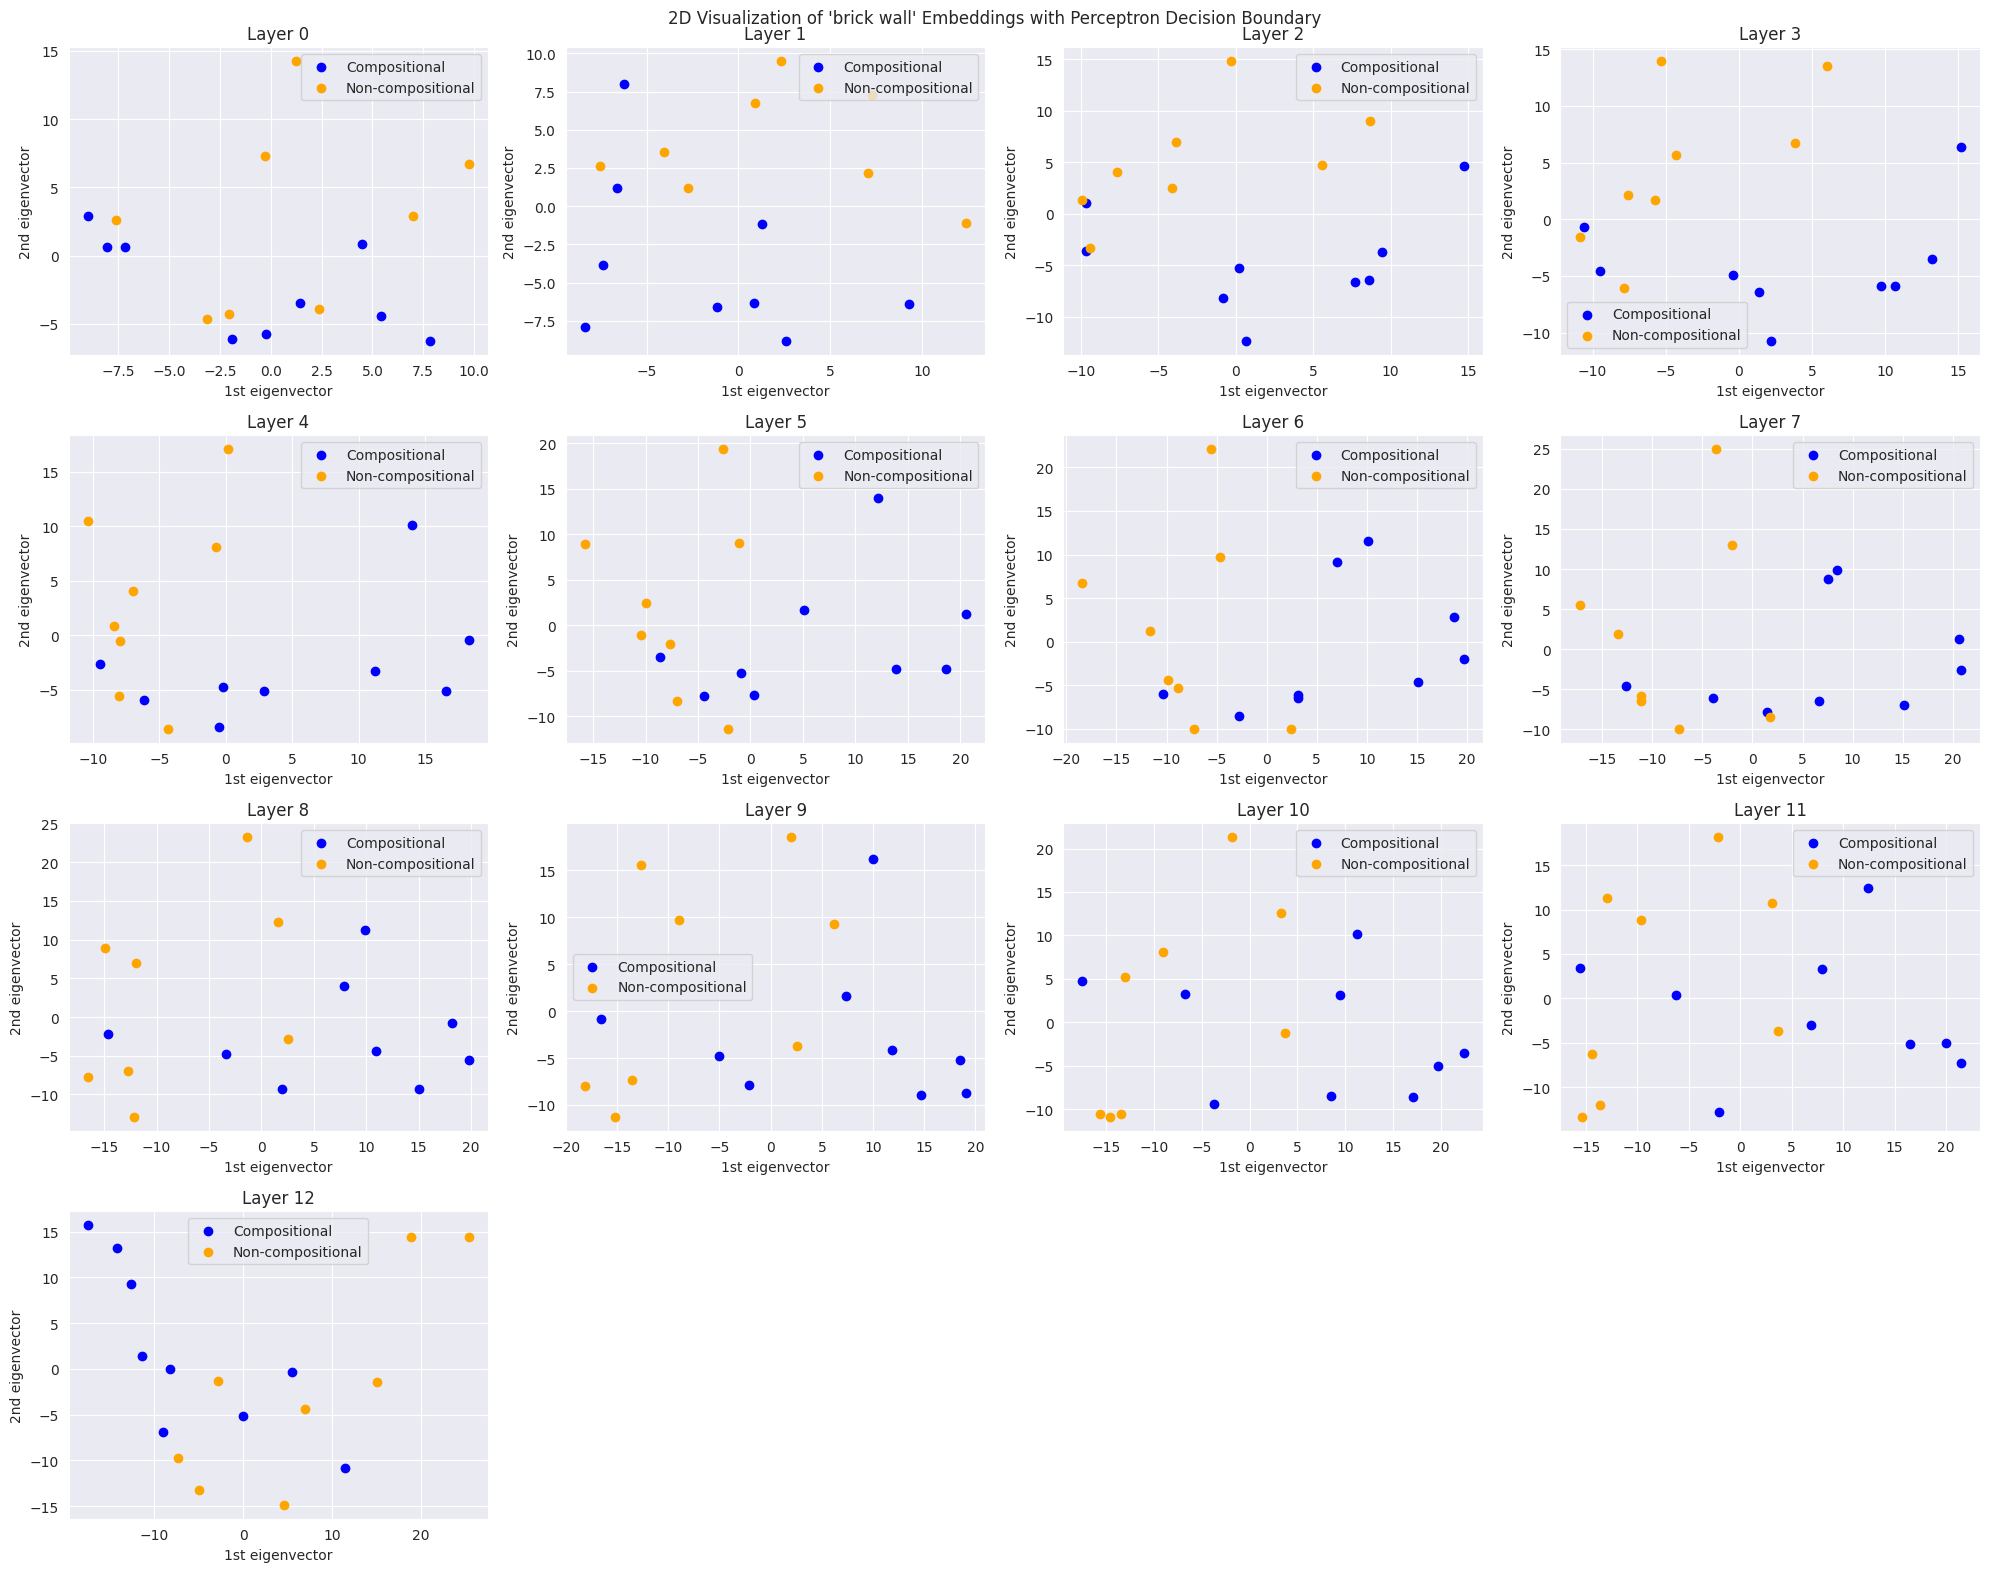

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

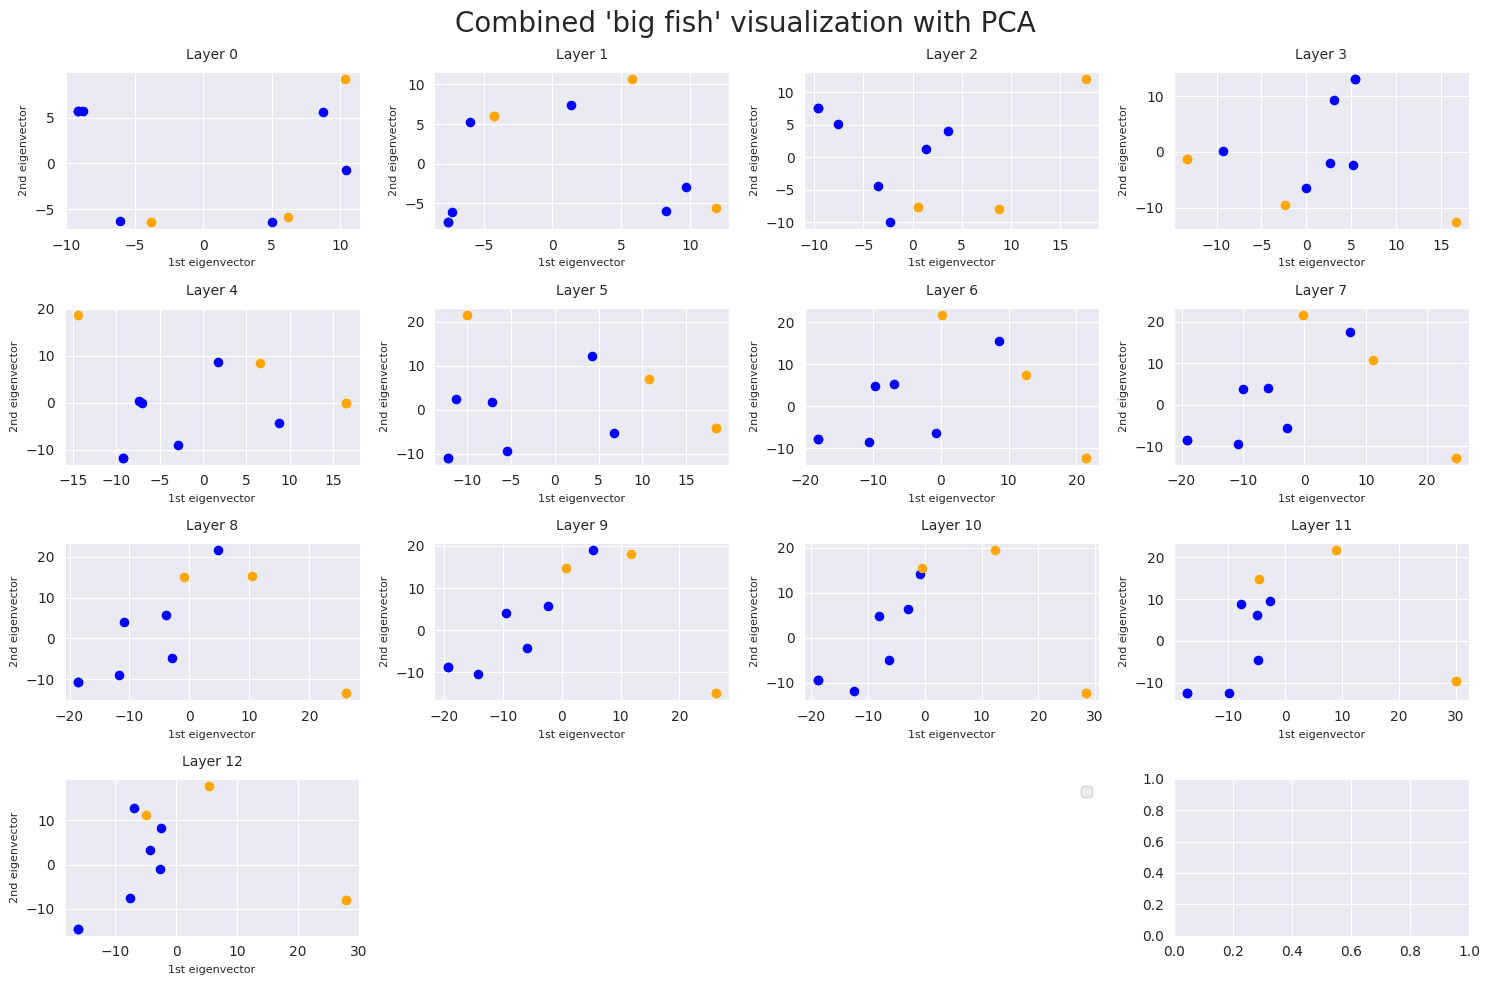

Layer 0
Training accuracy: 72.73% => data is not linearly separable.
Layer 1
Training accuracy: 45.45% => data is not linearly separable.
Layer 2
Training accuracy: 72.73% => data is not linearly separable.
Layer 3
Training accuracy: 81.82% => data is not linearly separable.
Layer 4
Training accuracy: 72.73% => data is not linearly separable.
Layer 5
Training accuracy: 72.73% => data is not linearly separable.
Layer 6
Training accuracy: 90.91% => data is not linearly separable.
Layer 7
Training accuracy: 81.82% => data is not linearly separable.
Layer 8
Training accuracy: 81.82% => data is not linearly separable.
Layer 9
Training accuracy: 90.91% => data is not linearly separable.
Layer 10
Training accuracy: 90.91% => data is not linearly separable.
Layer 11
Training accuracy: 90.91% => data is not linearly separable.
Layer 12
Training accuracy: 90.91% => data is not linearly separable.


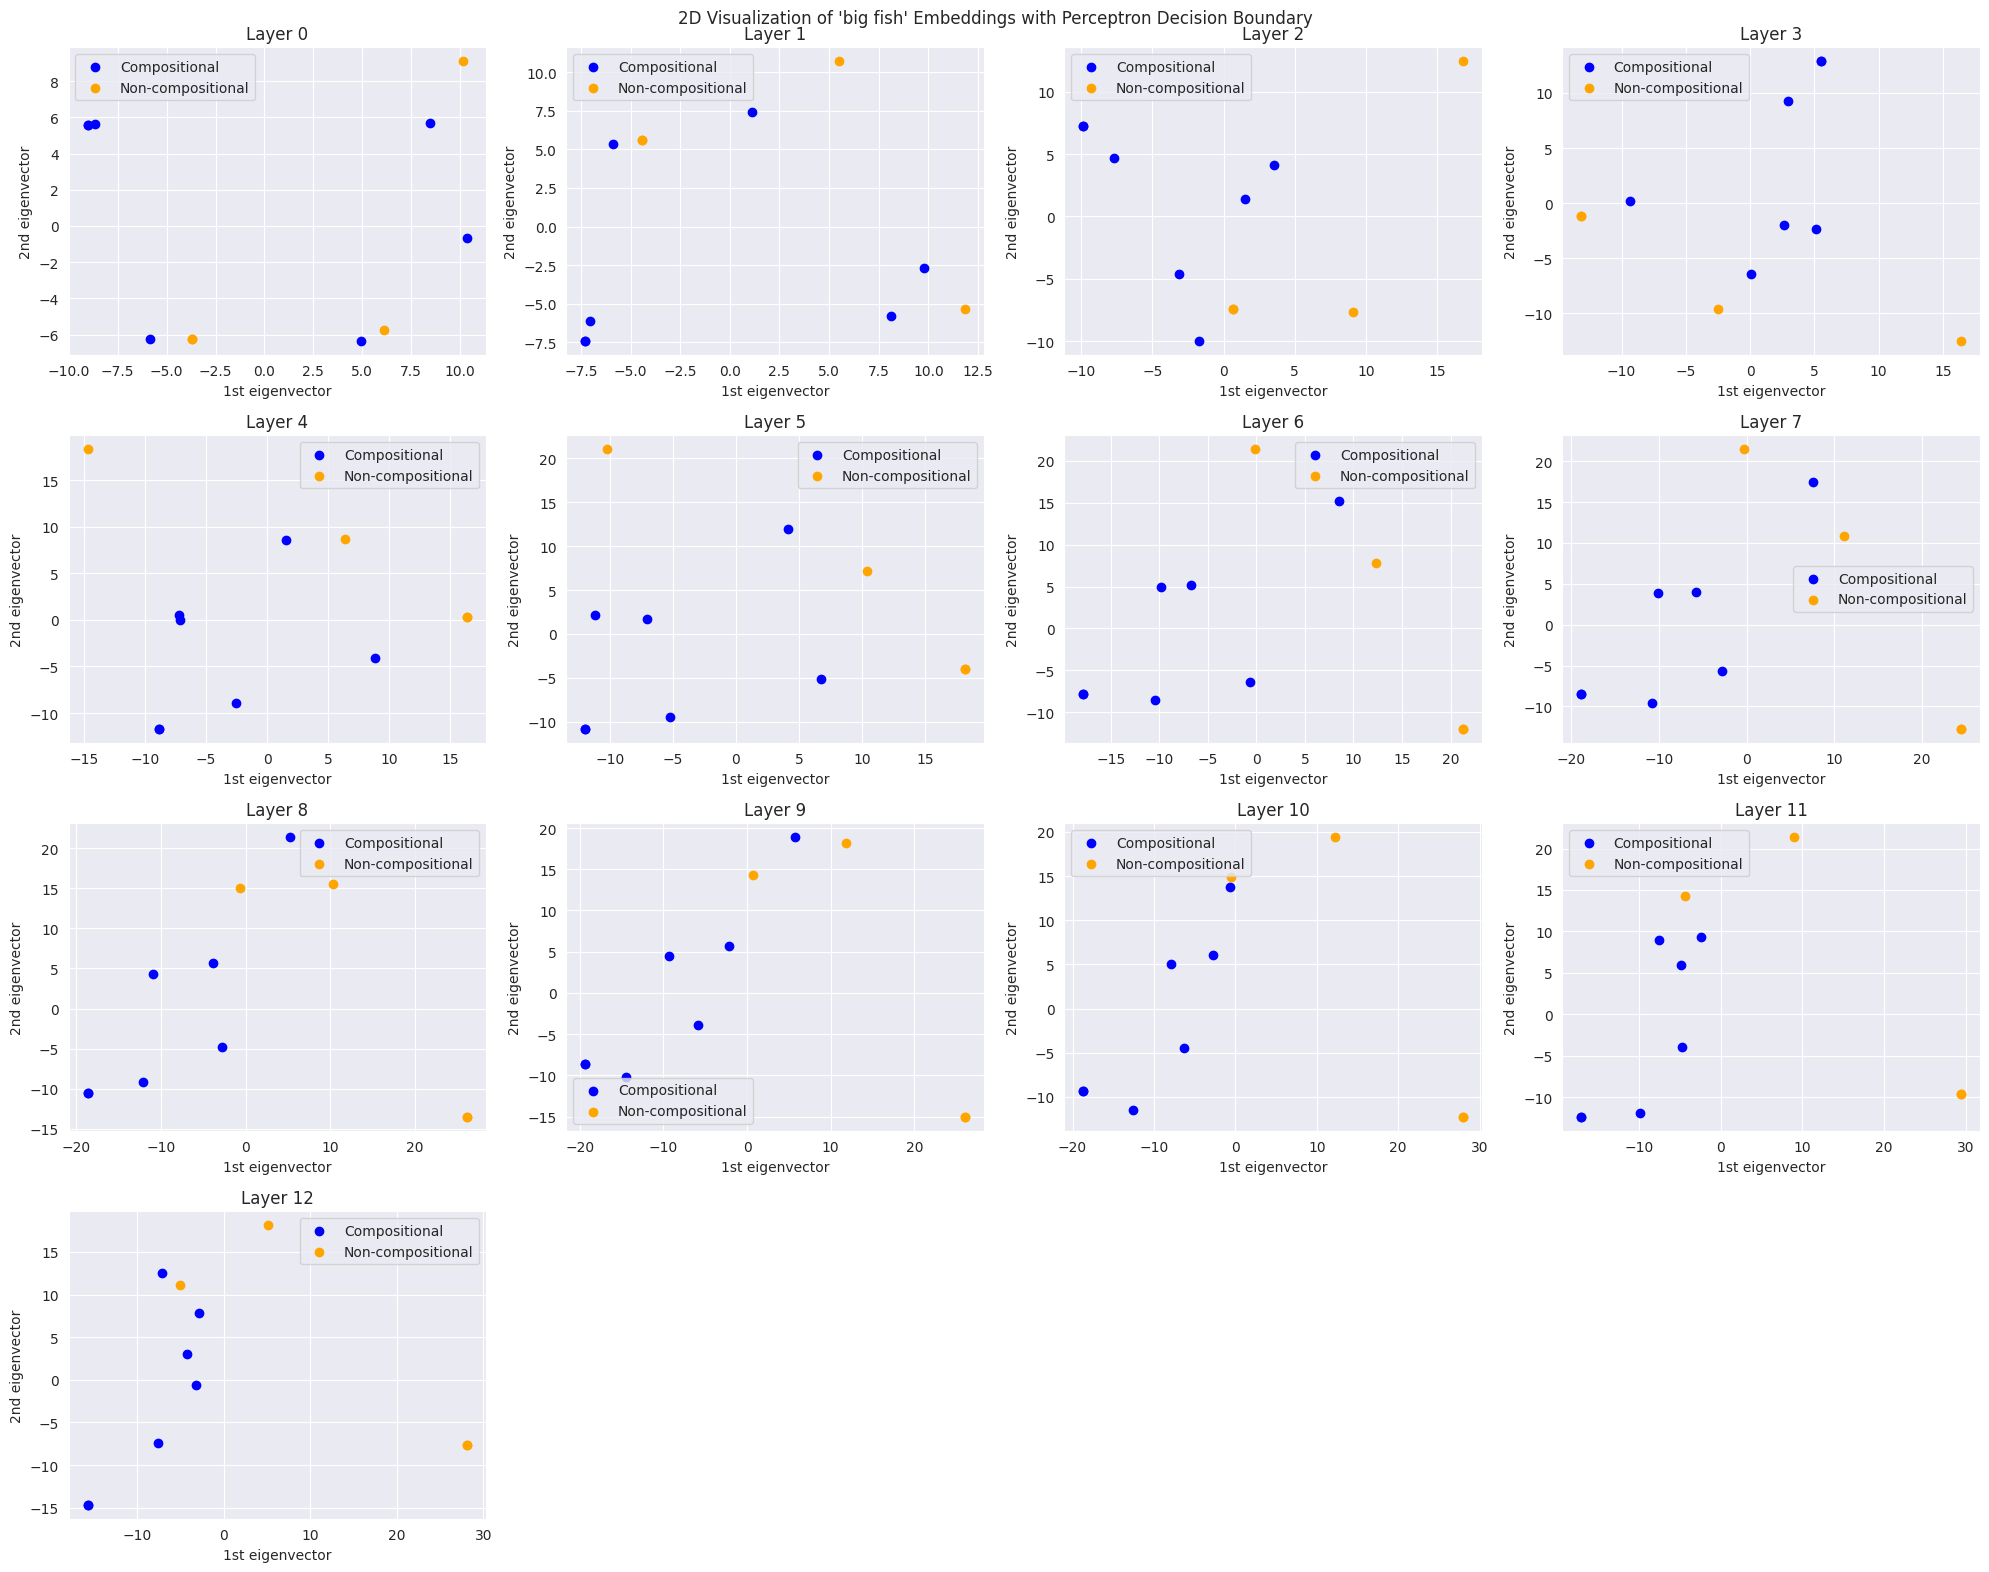

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

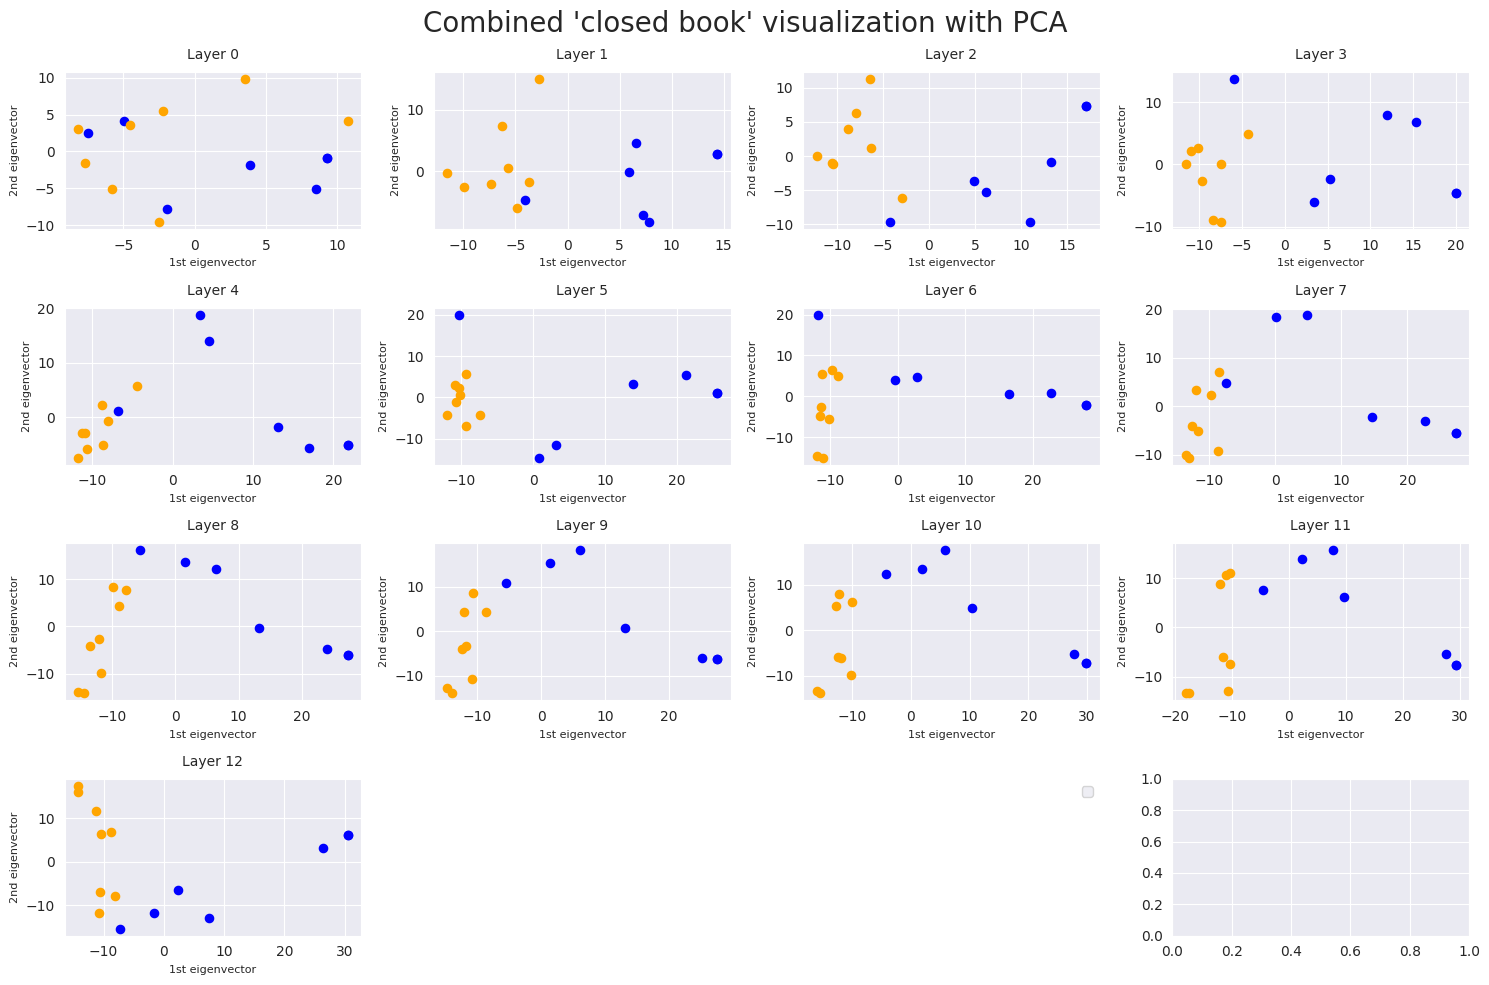

Layer 0
Training accuracy: 40.00% => data is not linearly separable.
Layer 1
Training accuracy: 93.33% => data is not linearly separable.
Layer 2
Training accuracy: 93.33% => data is not linearly separable.
Layer 3
Training accuracy: 100.00% => data is linearly separable.
Layer 4
Training accuracy: 93.33% => data is not linearly separable.
Layer 5
Training accuracy: 86.67% => data is not linearly separable.
Layer 6
Training accuracy: 100.00% => data is linearly separable.
Layer 7
Training accuracy: 93.33% => data is not linearly separable.
Layer 8
Training accuracy: 100.00% => data is linearly separable.
Layer 9
Training accuracy: 100.00% => data is linearly separable.
Layer 10
Training accuracy: 100.00% => data is linearly separable.
Layer 11
Training accuracy: 100.00% => data is linearly separable.
Layer 12
Training accuracy: 100.00% => data is linearly separable.


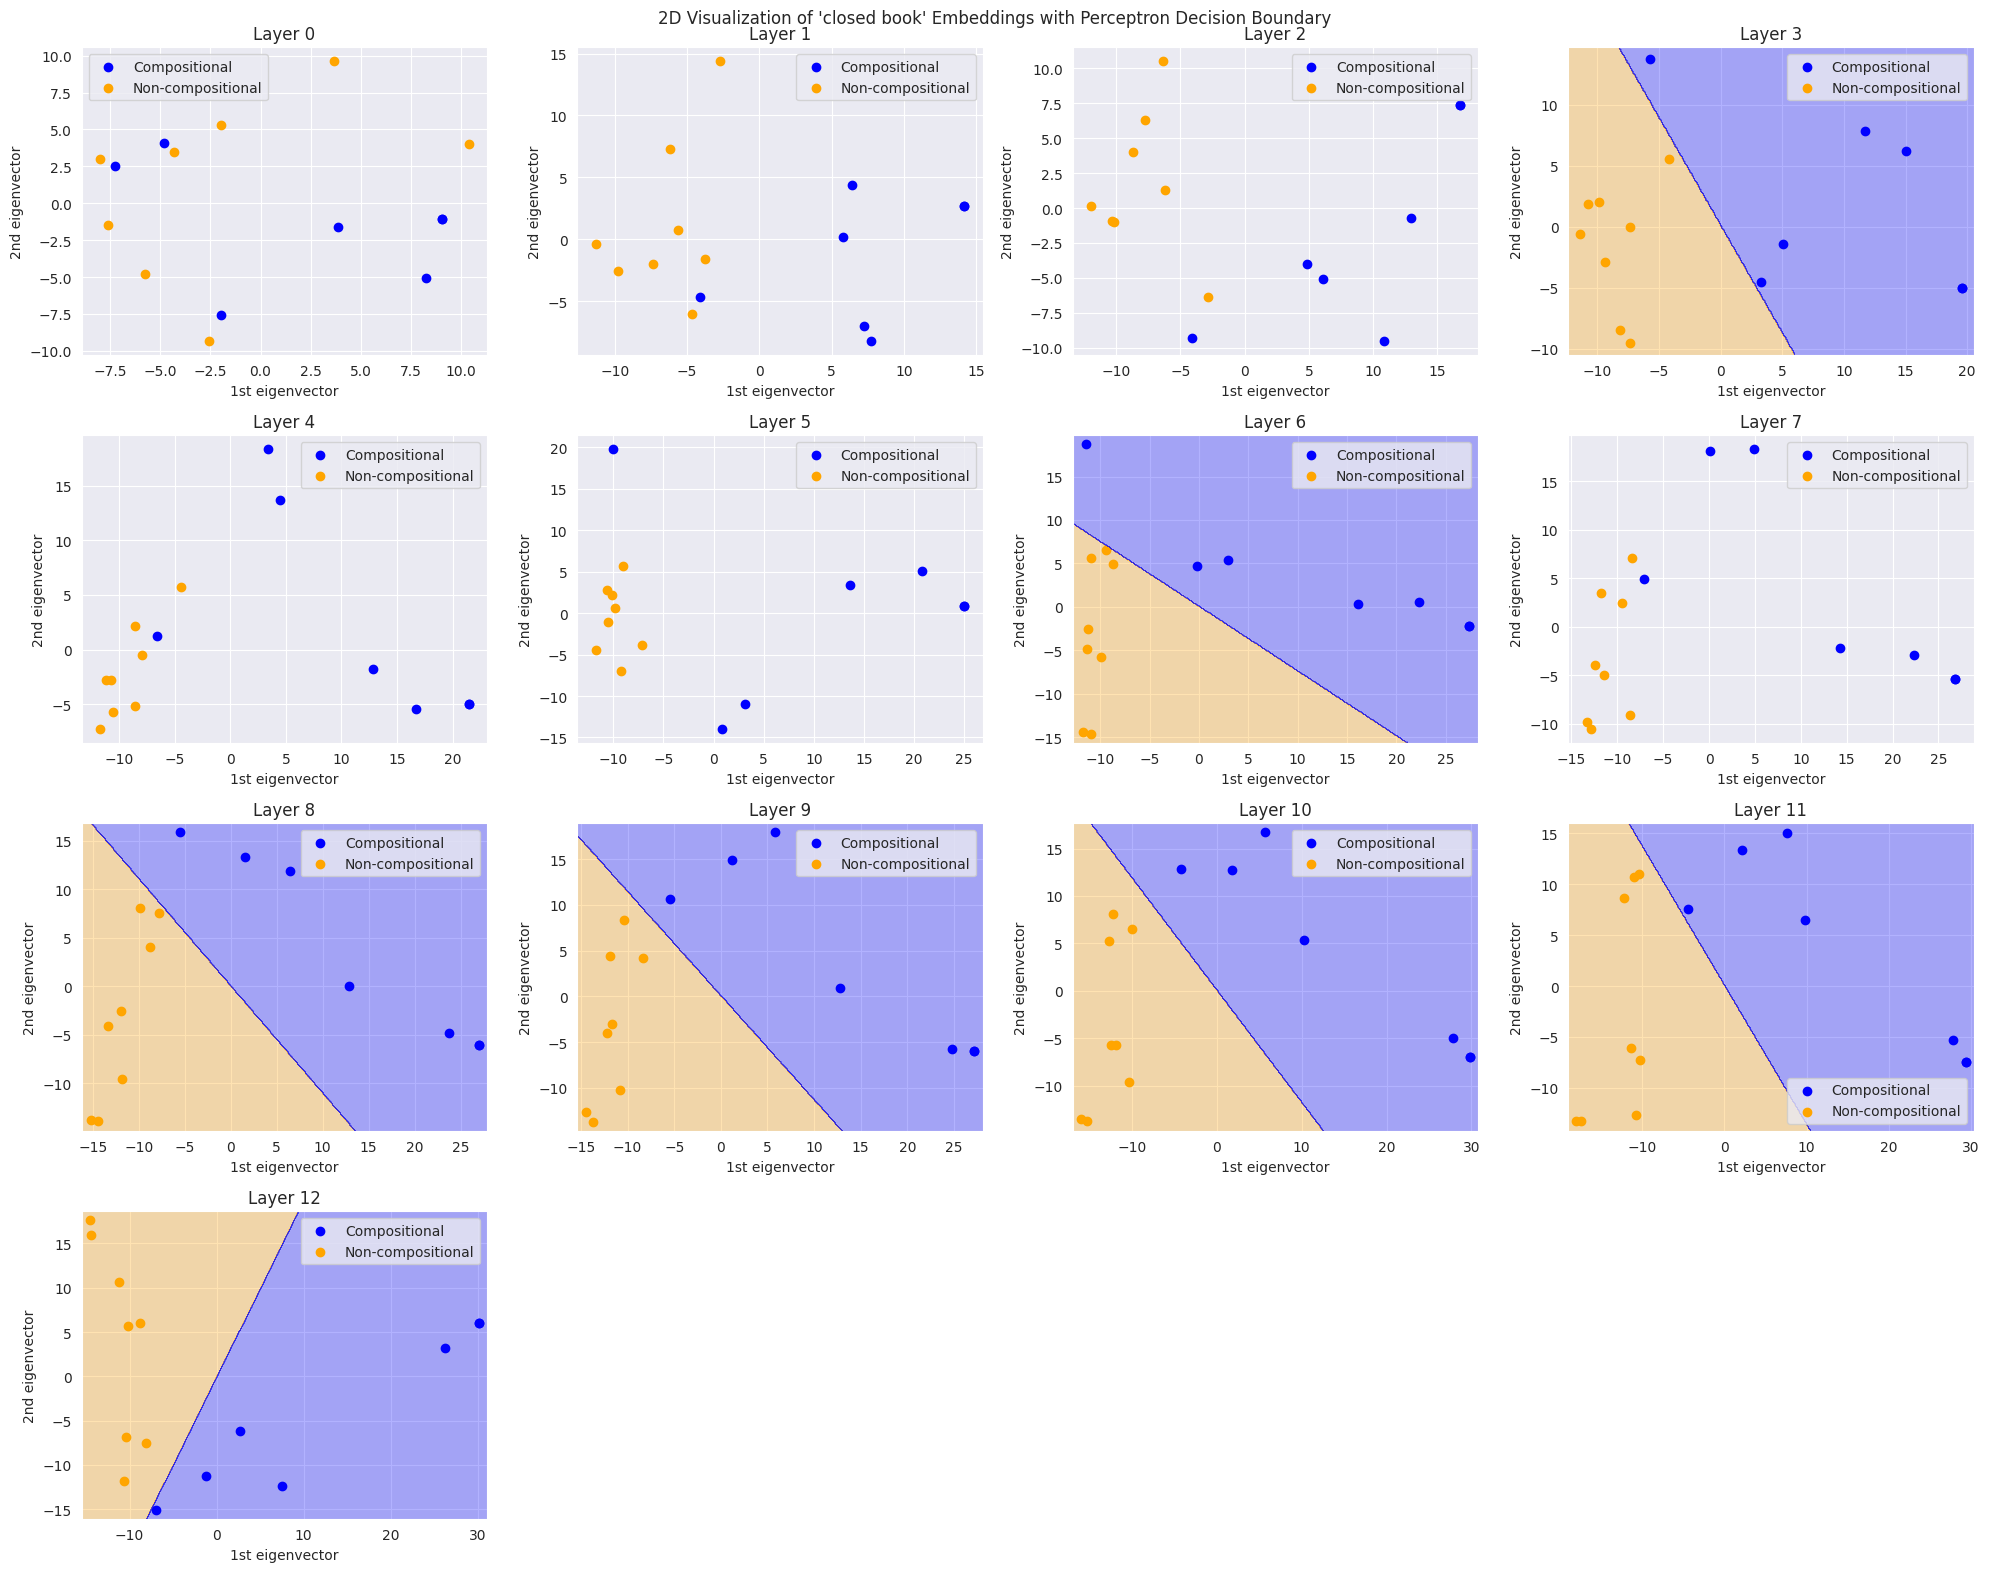

In [5]:
for mwe in pair_df.index.tolist():
    plot_pca_all_layers(mwe, data_df)
    plot_decision_boundary_all_layers(mwe, data_df)

### Clustering analysis

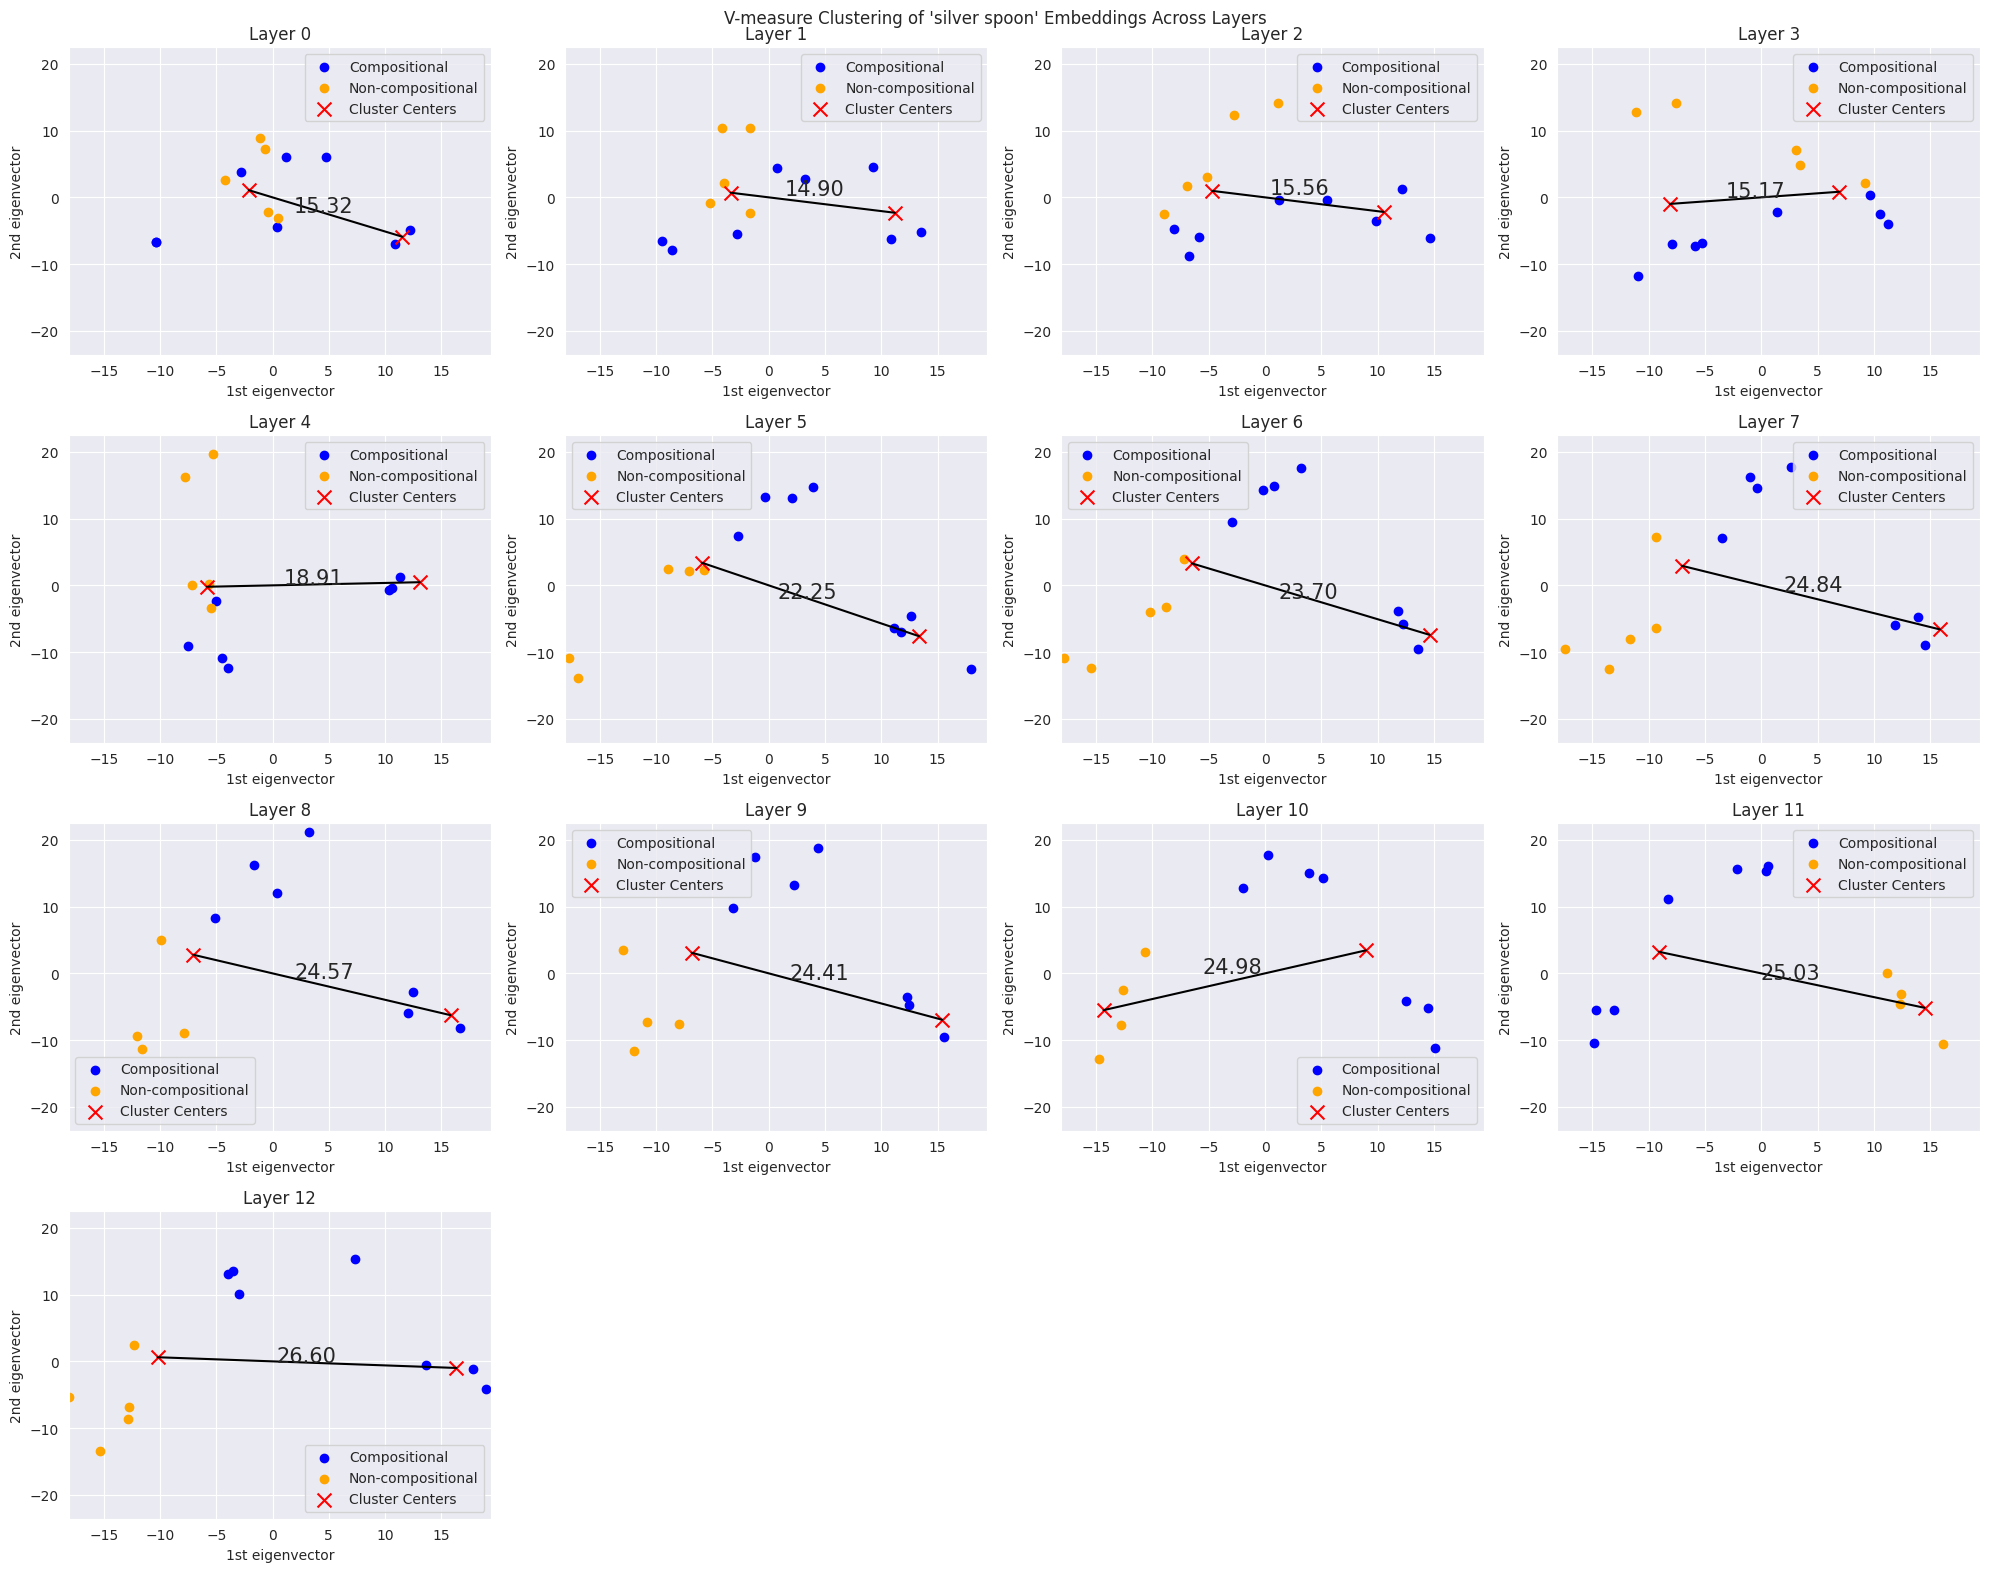

[0.15200897032732547,
 0.22062200515572722,
 0.2971354199367825,
 0.007052046099249758,
 0.2971354199367825,
 0.2971354199367825,
 0.2971354199367825,
 0.2971354199367825,
 0.2971354199367825,
 0.2971354199367825,
 1.0,
 1.0,
 0.3889704169460864]

In [26]:
v_measure_scores, distances= v_measure_cluster_analysis("silver spoon", data_df)

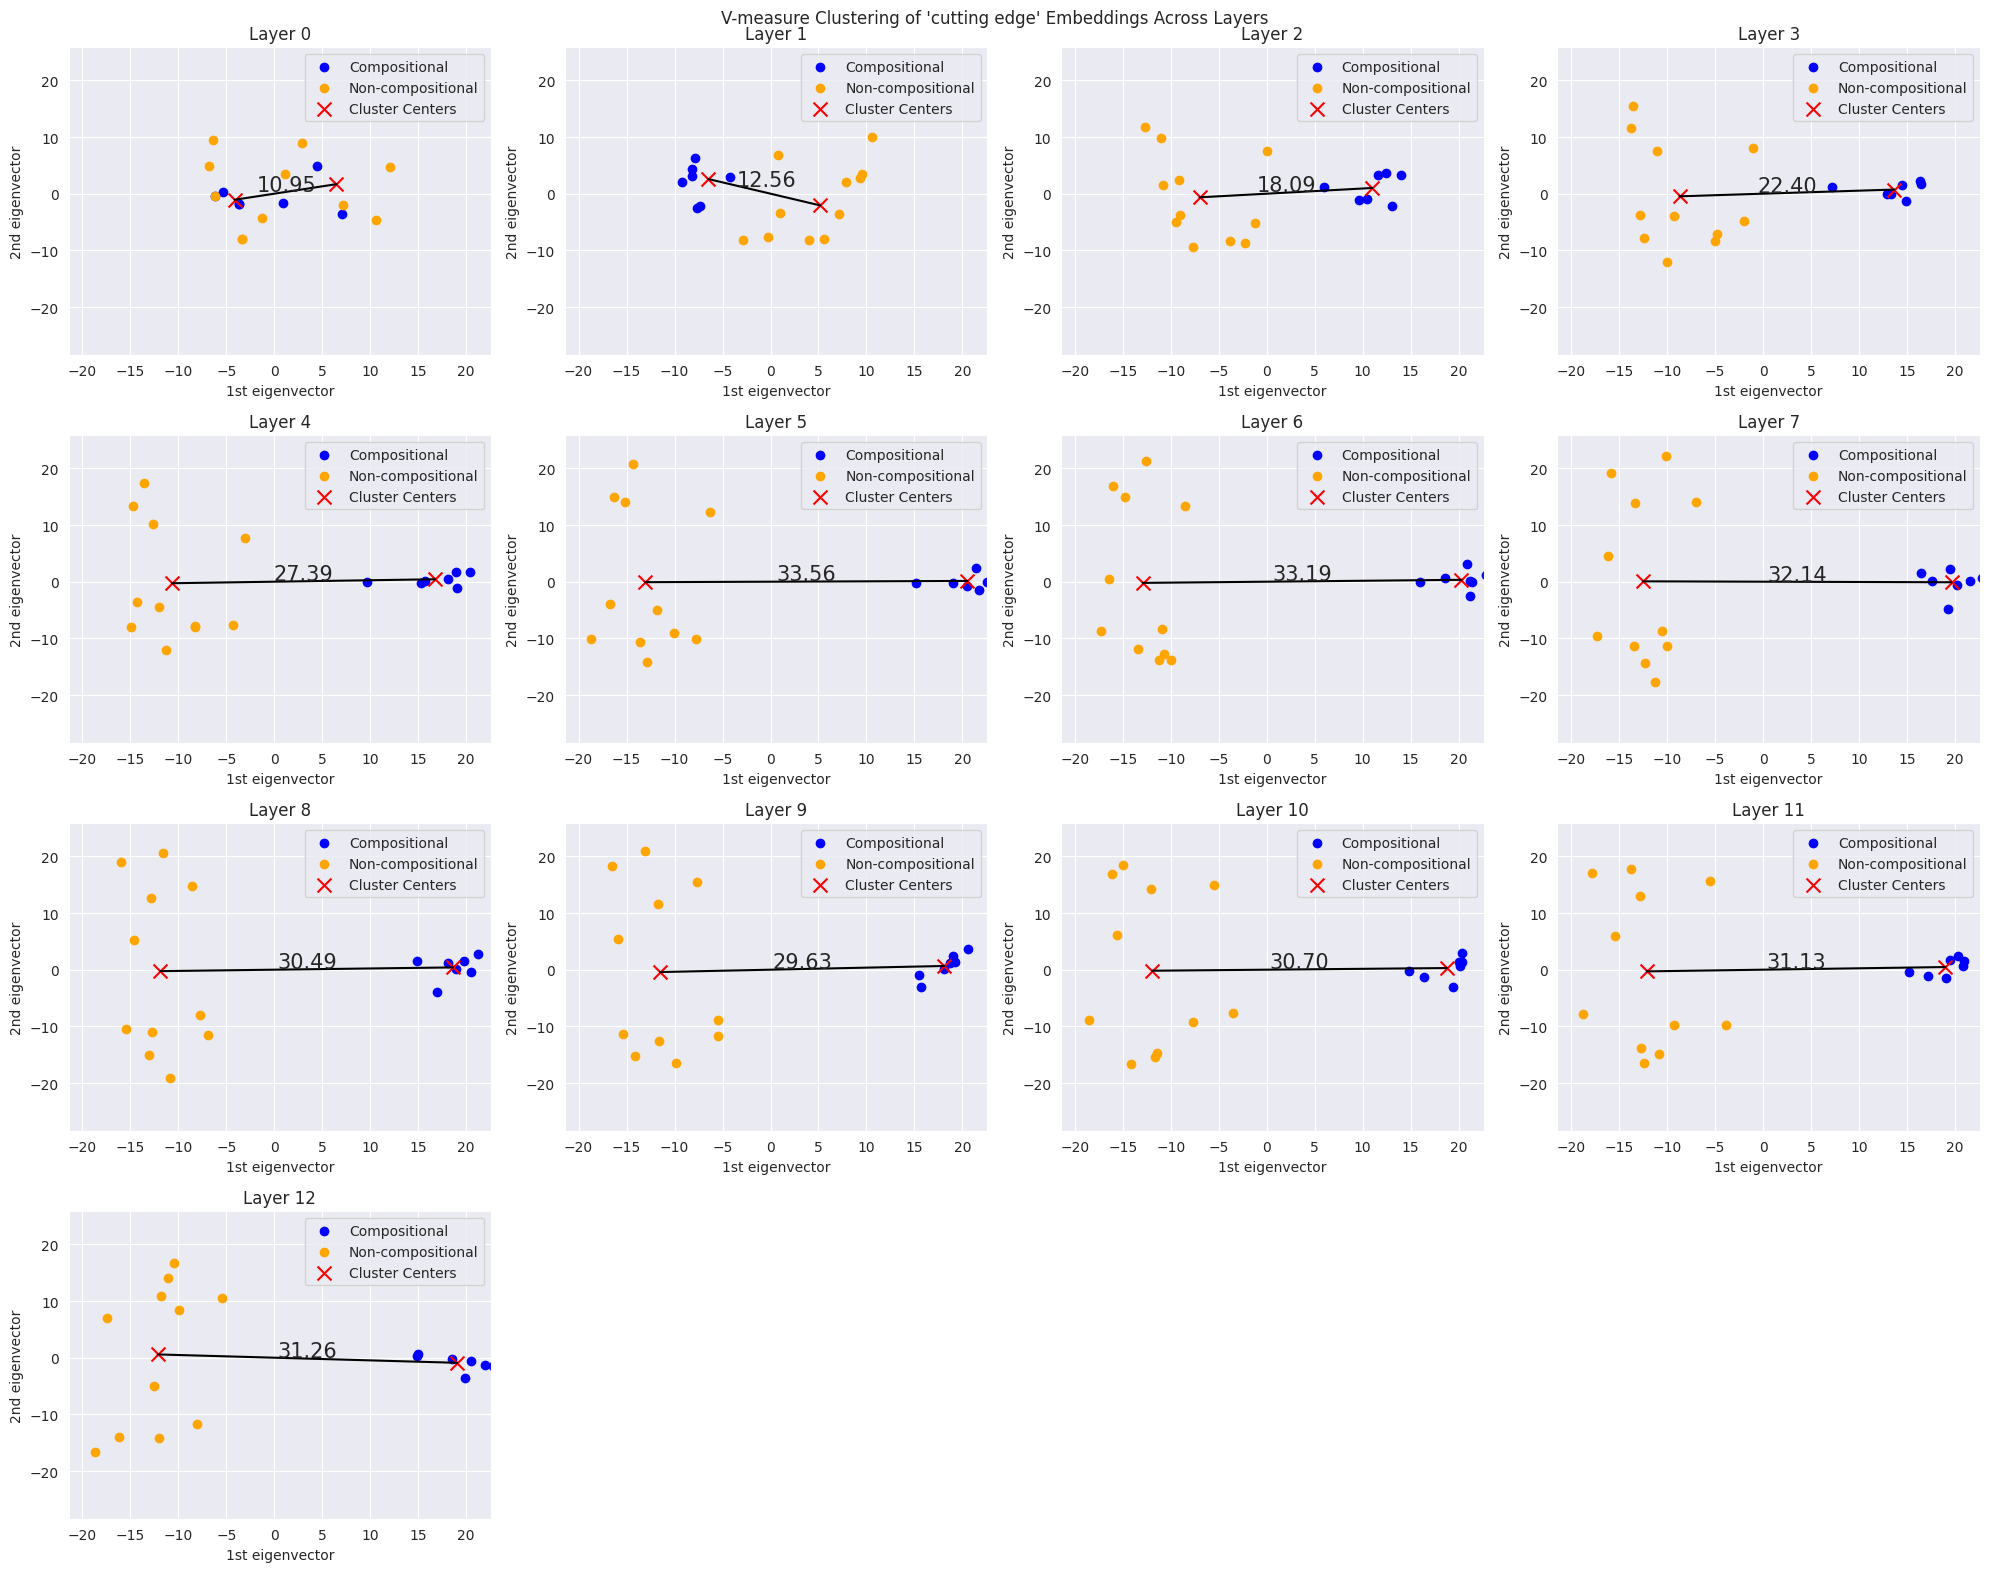

In [28]:
v_measure_scores, distances = v_measure_cluster_analysis("cutting edge", data_df)

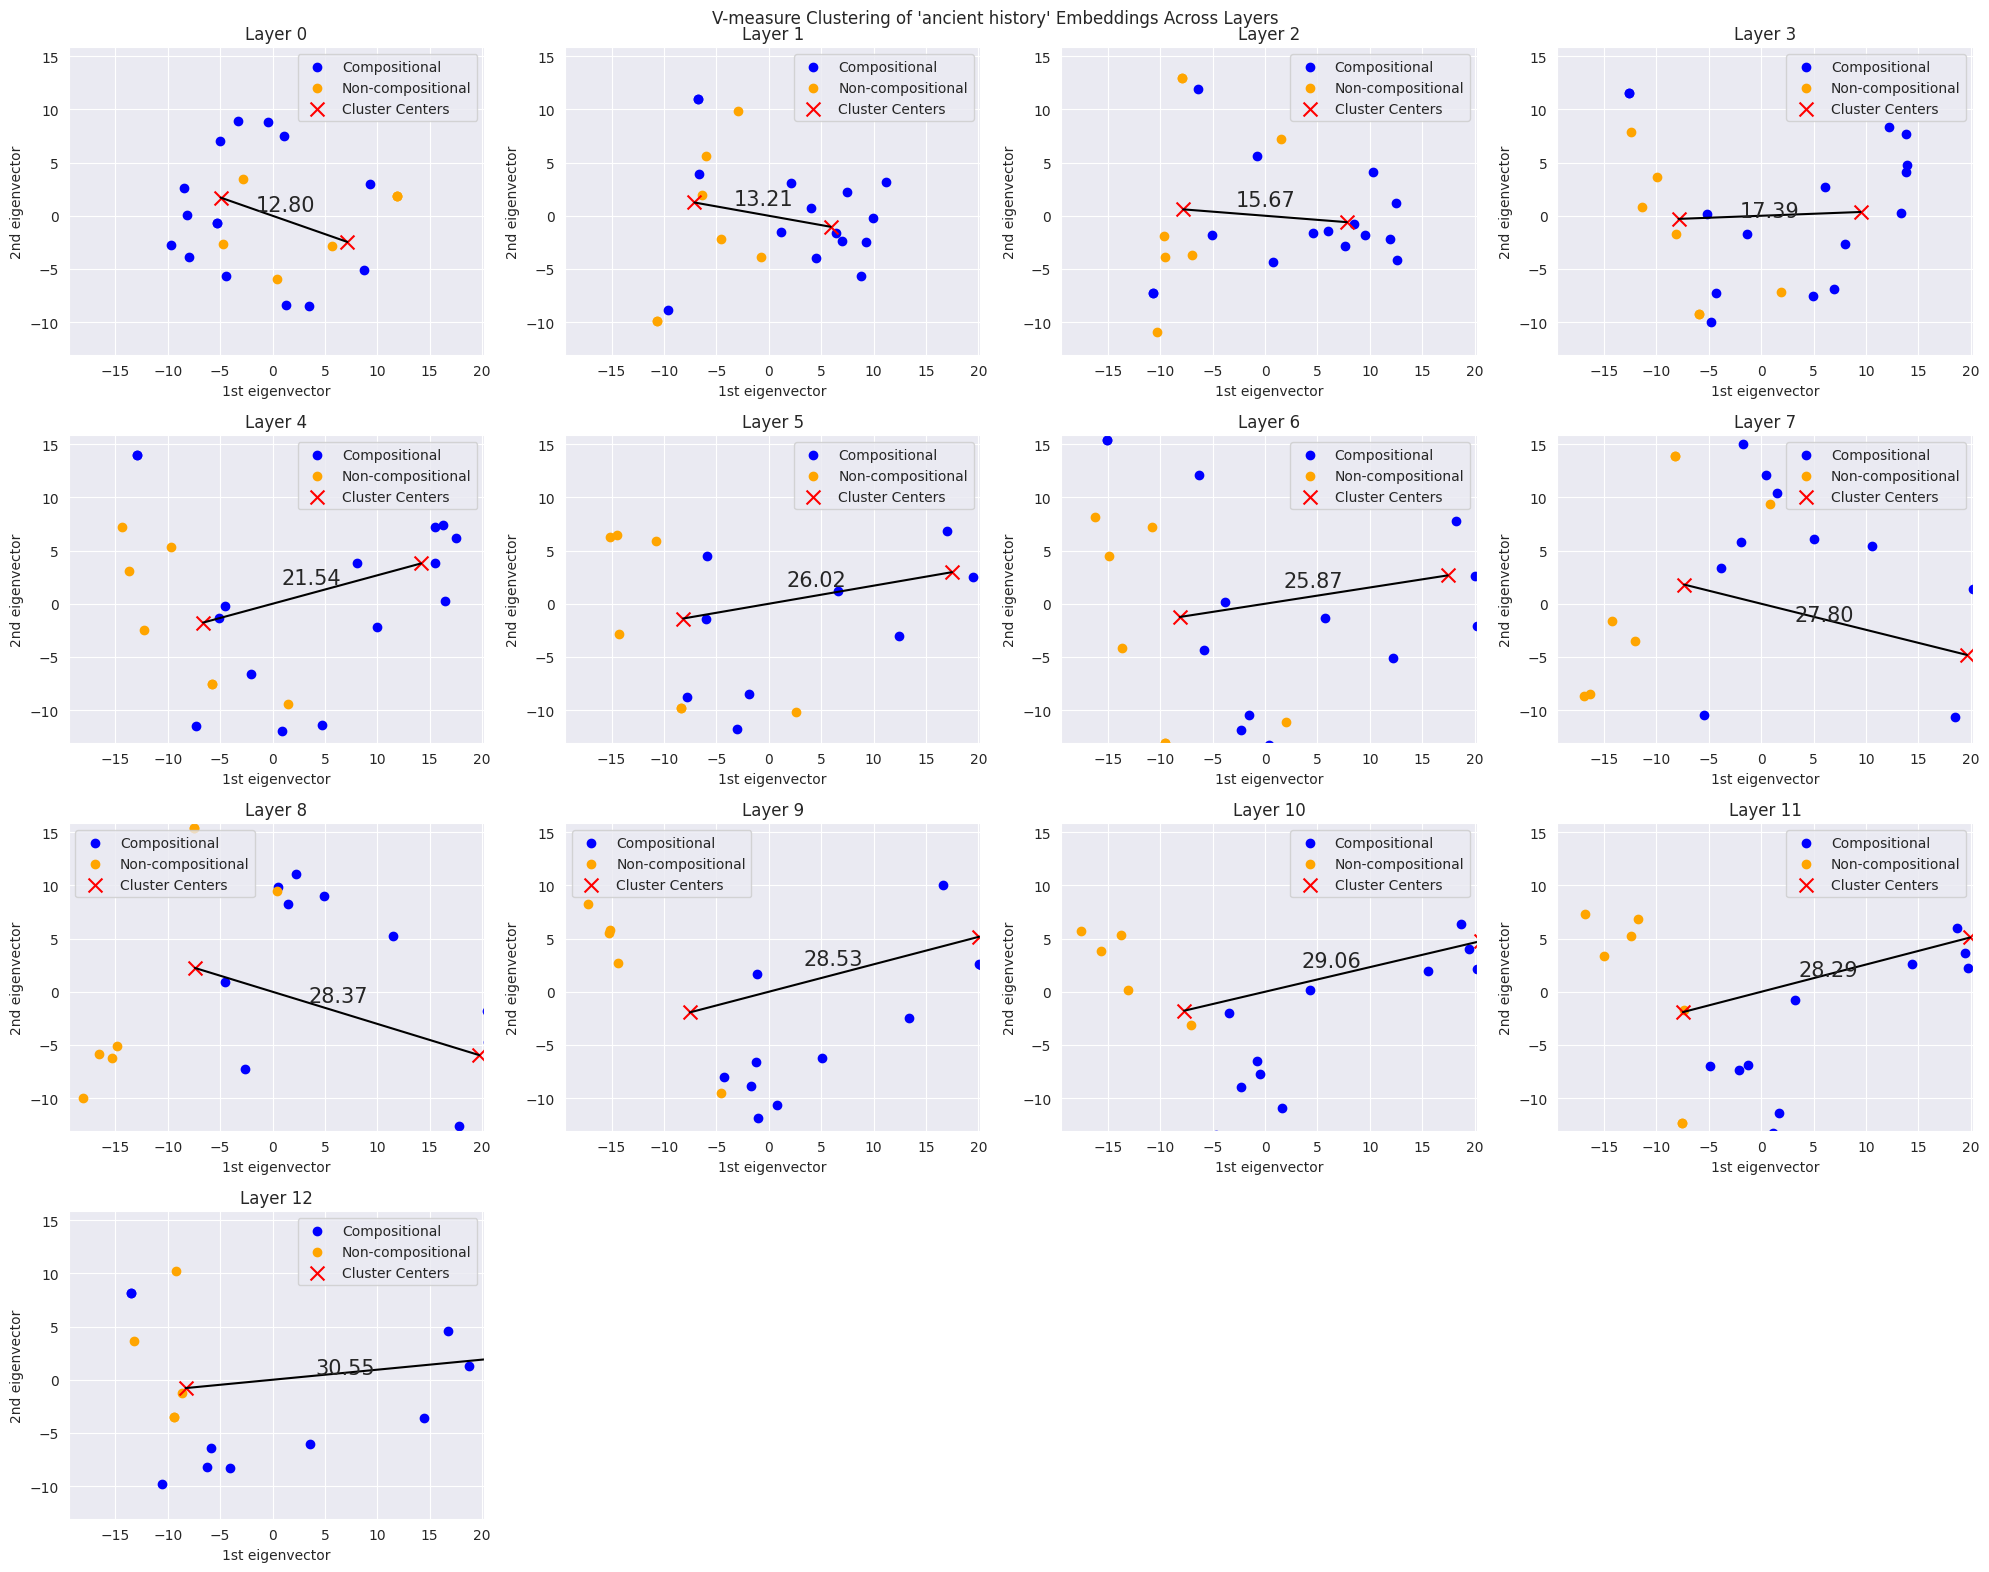

23.468562272878792

In [34]:
v_measure_scores, distances = v_measure_cluster_analysis("ancient history", data_df)
statistics.mean(distances)

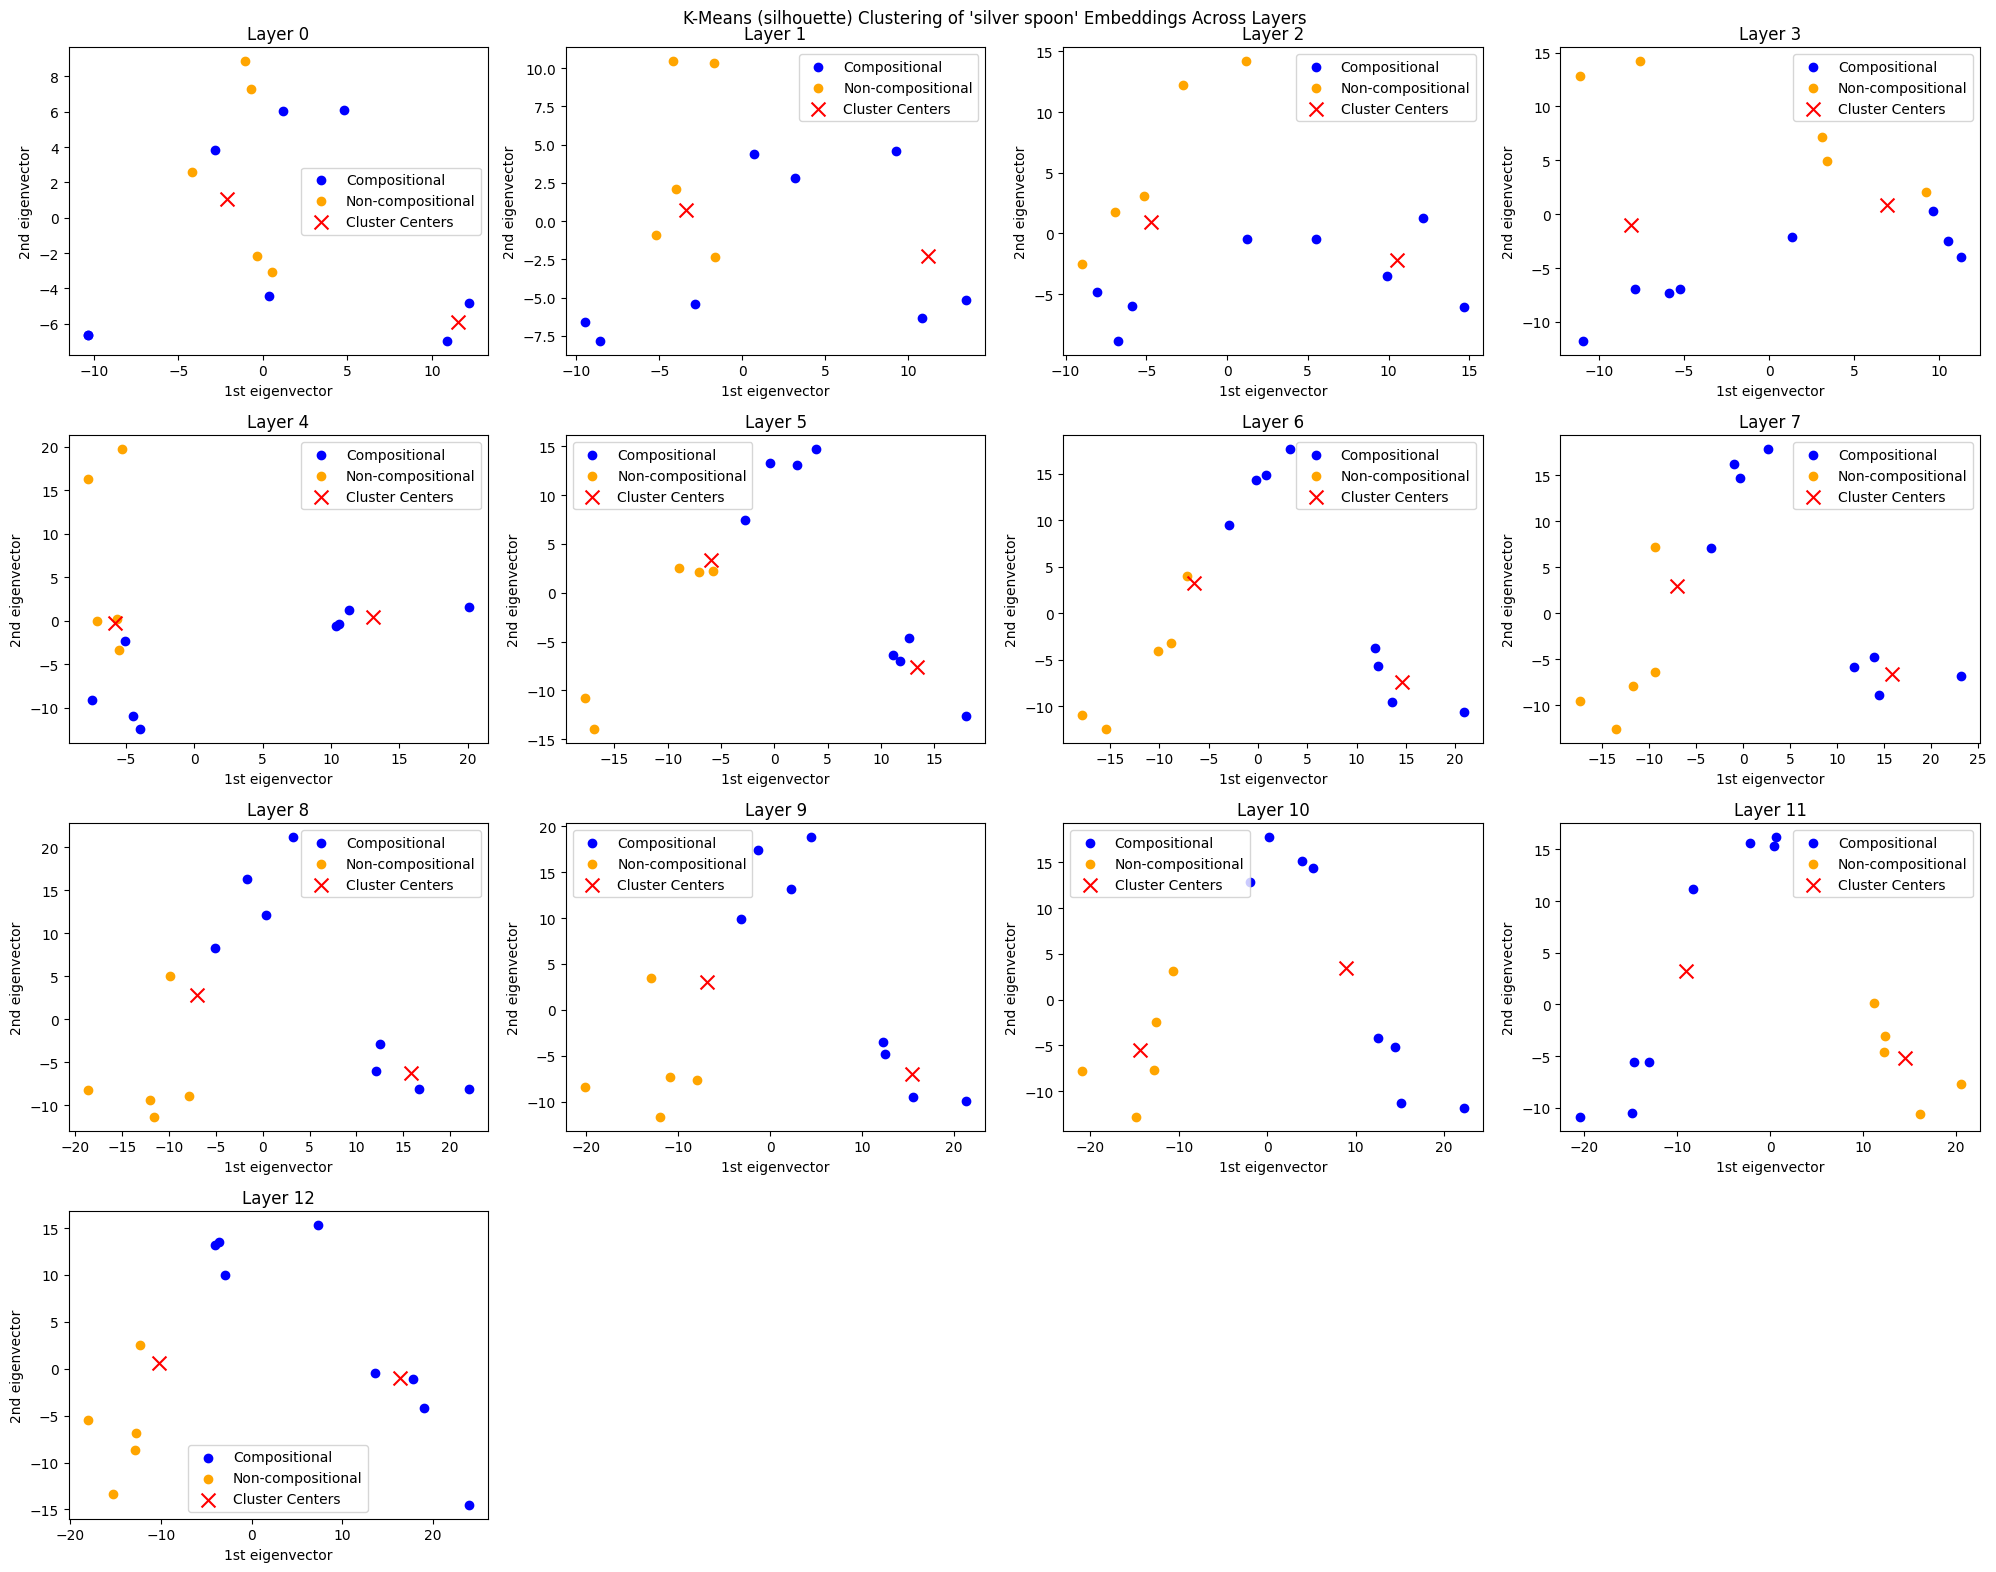

[0.48601145,
 0.4278517,
 0.43244696,
 0.44115728,
 0.5139422,
 0.5232864,
 0.503073,
 0.5093725,
 0.48703268,
 0.47394902,
 0.47398436,
 0.5199374,
 0.48709506]

In [16]:
silhouette_score_cluster_analysis("silver spoon", data_df)